# **<center>Exploratory Data Analysis (EDA)**

## 🌍 **Context**
Air pollution is a serious problem that affects the climate and human health. To monitor it, measuring stations are used to record polluting gases such as SO₂, NO₂, O₃, CO, PM10, and PM2.5. However:

* The data may contain errors due to instrument failures.

* Predicting air quality is key to environmental decision-making.

In [1]:
# Libraries
## Data Analisis
import pandas as pd
import numpy as np
import pickle

## Visualization
pd.options.display.max_colwidth = None # columns visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats

!pip install folium
import folium

# Versions
print('Numpy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))
print('Seaborn version: {}'.format(sns.__version__))

Numpy version: 2.0.2
Pandas version: 2.2.2
Seaborn version: 0.13.2


In [2]:
# Paths
pollutant_data_path= "/content/drive/MyDrive/Colab Notebooks/hackathon-schneider-pollution/data/raw/pollutant_data.csv"
instrument_data_path = "/content/drive/MyDrive/Colab Notebooks/hackathon-schneider-pollution/data/raw/instrument_data.csv"
measurement_data_path = "/content/drive/MyDrive/Colab Notebooks/hackathon-schneider-pollution/data/raw/measurement_data.csv"

## **1. Data Upload**

In [3]:
# We load the 3 datasets
measurement_data = pd.read_csv(measurement_data_path)
instrument_data = pd.read_csv(instrument_data_path)
pollutant_data = pd.read_csv(pollutant_data_path)

In [ ]:
pollutant_data.head(10)

Item code Item name Unit of measurement   Good  Normal     Bad  Very bad
0          0       SO2                 ppm   0.02    0.05    0.15       1.0
1          2       NO2                 ppm   0.03    0.06    0.20       2.0
2          4        CO                 ppm   2.00    9.00   15.00      50.0
3          5        O3                 ppm   0.03    0.09    0.15       0.5
4          7      PM10       Mircrogram/m3  30.00   80.00  150.00     600.0
5          8     PM2.5       Mircrogram/m3  15.00   35.00   75.00     500.0

In [ ]:
measurement_data.head()

Measurement date  Station code   Latitude   Longitude    SO2    NO2  \
0  2021-01-01 00:00:00           204  37.572016  127.005008  0.004  0.059   
1  2021-01-01 01:00:00           204  37.572016  127.005008  0.004  0.058   
2  2021-01-01 02:00:00           204  37.572016  127.005008  0.004  0.056   
3  2021-01-01 03:00:00           204  37.572016  127.005008  0.004  0.056   
4  2021-01-01 04:00:00           204  37.572016  127.005008  0.003  0.051   

      O3   CO  PM10  PM2.5  
0  0.002  1.2  73.0   57.0  
1  0.002  1.2  71.0   59.0  
2  0.002  1.2  70.0   59.0  
3  0.002  1.2  70.0   58.0  
4  0.002  1.2  69.0   61.0

In [ ]:
instrument_data.head()

Measurement date  Station code  Item code  Average value  \
0  2021-01-01 00:00:00           204          0          0.004   
1  2021-01-01 00:00:00           204          2          0.059   
2  2021-01-01 00:00:00           204          4          1.200   
3  2021-01-01 00:00:00           204          5          0.002   
4  2021-01-01 00:00:00           204          7         73.000   

   Instrument status  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

## **2. Data Exploration**

* Nules/NaN Values
* Duplicated Values

### Pollutant Data

In [ ]:
pollutant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item code            6 non-null      int64  
 1   Item name            6 non-null      object 
 2   Unit of measurement  6 non-null      object 
 3   Good                 6 non-null      float64
 4   Normal               6 non-null      float64
 5   Bad                  6 non-null      float64
 6   Very bad             6 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 468.0+ bytes


In [ ]:
pollutant_data.shape

(6, 7)

In [ ]:
pollutant_data.describe(include='all')

Item code Item name Unit of measurement       Good     Normal  \
count    6.000000         6                   6   6.000000   6.000000   
unique        NaN         6                   2        NaN        NaN   
top           NaN       SO2                 ppm        NaN        NaN   
freq          NaN         1                   4        NaN        NaN   
mean     4.333333       NaN                 NaN   7.846667  20.700000   
std      3.011091       NaN                 NaN  12.325430  32.047072   
min      0.000000       NaN                 NaN   0.020000   0.050000   
25%      2.500000       NaN                 NaN   0.030000   0.067500   
50%      4.500000       NaN                 NaN   1.015000   4.545000   
75%      6.500000       NaN                 NaN  11.750000  28.500000   
max      8.000000       NaN                 NaN  30.000000  80.000000   

               Bad    Very bad  
count     6.000000    6.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean     40.083333  192.250000  
std      61.171960  279.551382  
min       0.150000    0.500000  
25%       0.162500    1.250000  
50%       7.600000   26.000000  
75%      60.000000  387.500000  
max     150.000000  600.000000

In [ ]:
pollutant_data.isnull().sum()

Item code              0
Item name              0
Unit of measurement    0
Good                   0
Normal                 0
Bad                    0
Very bad               0
dtype: int64

In [ ]:
pollutant_data.isna().sum()

Item code              0
Item name              0
Unit of measurement    0
Good                   0
Normal                 0
Bad                    0
Very bad               0
dtype: int64

In [ ]:
pollutant_data[pollutant_data.duplicated()]

Empty DataFrame
Columns: [Item code, Item name, Unit of measurement, Good, Normal, Bad, Very bad]
Index: []

### Measurement Data

In [ ]:
measurement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621588 entries, 0 to 621587
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  621588 non-null  object 
 1   Station code      621588 non-null  int64  
 2   Latitude          621588 non-null  float64
 3   Longitude         621588 non-null  float64
 4   SO2               621588 non-null  float64
 5   NO2               621588 non-null  float64
 6   O3                621588 non-null  float64
 7   CO                621588 non-null  float64
 8   PM10              621588 non-null  float64
 9   PM2.5             621588 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 47.4+ MB


In [ ]:
measurement_data.shape

(621588, 10)

In [ ]:
measurement_data.describe(include='all')

Measurement date   Station code       Latitude      Longitude  \
count                621588  621588.000000  621588.000000  621588.000000   
unique                25906            NaN            NaN            NaN   
top     2023-06-30 23:00:00            NaN            NaN            NaN   
freq                     25            NaN            NaN            NaN   
mean                    NaN     215.980915      37.554003     126.988930   
std                     NaN       7.192600       0.053397       0.078829   
min                     NaN     204.000000      37.452357     126.835151   
25%                     NaN     210.000000      37.517528     126.927102   
50%                     NaN     216.000000      37.544962     127.004850   
75%                     NaN     222.000000      37.584848     127.047470   
max                     NaN     228.000000      37.658774     127.136792   

                 SO2            NO2             O3             CO  \
count   621588.00000  621588.000000  621588.000000  621588.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean        -0.00135       0.022904       0.018718       0.508598   
std          0.07622       0.114483       0.097799       0.399569   
min         -1.00000      -1.000000      -1.000000      -1.000000   
25%          0.00300       0.016000       0.009000       0.300000   
50%          0.00400       0.025000       0.021000       0.500000   
75%          0.00500       0.038000       0.035000       0.600000   
max          3.73600      38.445000      33.600000      71.700000   

                 PM10          PM2.5  
count   621588.000000  621588.000000  
unique            NaN            NaN  
top               NaN            NaN  
freq              NaN            NaN  
mean        43.978420      25.504612  
std         71.664738      43.760796  
min         -1.000000      -1.000000  
25%         22.000000      11.000000  
50%         35.000000      19.000000  
75%         53.000000      31.000000  
max       3586.000000    6256.000000

In [ ]:
measurement_data.isnull().sum()

Measurement date    0
Station code        0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64

In [ ]:
measurement_data.isna().sum()

Measurement date    0
Station code        0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64

In [ ]:
measurement_data[measurement_data.duplicated()]

Empty DataFrame
Columns: [Measurement date, Station code, Latitude, Longitude, SO2, NO2, O3, CO, PM10, PM2.5]
Index: []

### Instrument Data

In [ ]:
instrument_data.shape

(3703662, 5)

In [ ]:
instrument_data.describe(include='all')

Measurement date  Station code     Item code  Average value  \
count               3703662  3.703662e+06  3.703662e+06   3.703662e+06   
unique                25906           NaN           NaN            NaN   
top     2023-06-30 23:00:00           NaN           NaN            NaN   
freq                    150           NaN           NaN            NaN   
mean                    NaN  2.159581e+02  4.333333e+00   1.170491e+01   
std                     NaN  7.176528e+00  2.748737e+00   3.842504e+01   
min                     NaN  2.040000e+02  0.000000e+00  -1.000000e+00   
25%                     NaN  2.100000e+02  2.000000e+00   1.200000e-02   
50%                     NaN  2.160000e+02  4.500000e+00   7.200000e-02   
75%                     NaN  2.220000e+02  7.000000e+00   1.500000e+01   
max                     NaN  2.280000e+02  8.000000e+00   6.256000e+03   

        Instrument status  
count        3.703662e+06  
unique                NaN  
top                   NaN  
freq                  NaN  
mean         1.377877e-01  
std          9.948272e-01  
min          0.000000e+00  
25%          0.000000e+00  
50%          0.000000e+00  
75%          0.000000e+00  
max          9.000000e+00

In [ ]:
instrument_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 141.3+ MB


In [ ]:
instrument_data.isnull().sum()

Measurement date     0
Station code         0
Item code            0
Average value        0
Instrument status    0
dtype: int64

In [ ]:
instrument_data.isna().sum()

Measurement date     0
Station code         0
Item code            0
Average value        0
Instrument status    0
dtype: int64

In [ ]:
instrument_data[instrument_data.duplicated()]

Empty DataFrame
Columns: [Measurement date, Station code, Item code, Average value, Instrument status]
Index: []

* No Null/NaN values ​​were recorded in any df
* No Duplicated Values were recorded in any df

## **3. Univariate Analysis**


### **Description and Transformation of Variables**


#### pollutant_data

In [ ]:
pollutant_data.head()

Item code Item name Unit of measurement   Good  Normal     Bad  Very bad
0          0       SO2                 ppm   0.02    0.05    0.15       1.0
1          2       NO2                 ppm   0.03    0.06    0.20       2.0
2          4        CO                 ppm   2.00    9.00   15.00      50.0
3          5        O3                 ppm   0.03    0.09    0.15       0.5
4          7      PM10       Mircrogram/m3  30.00   80.00  150.00     600.0

In [ ]:
pollutant_data.columns

Index(['Item code', 'Item name', 'Unit of measurement', 'Good', 'Normal',
       'Bad', 'Very bad'],
      dtype='object')

`Item code`

In [ ]:
print("Values: {}".format(pollutant_data['Item code'].unique()))
print("Number of unique values: {}".format(pollutant_data['Item code'].nunique()))

Values: [0 2 4 5 7 8]
Number of unique values: 6


In [ ]:
pollutant_data['Item code'].dtype

dtype('int64')

`Item name`

In [ ]:
print("Values:{}".format(pollutant_data['Item name'].unique()))
print("Number of unique values: {}".format(pollutant_data['Item name'].nunique()))

Values:['SO2' 'NO2' 'CO' 'O3' 'PM10' 'PM2.5']
Number of unique values: 6


In [ ]:
pollutant_data['Item name'].dtype

dtype('O')

`'Unit of measurement'`

In [ ]:
pollutant_data['Unit of measurement'].unique()

array(['ppm', 'Mircrogram/m3'], dtype=object)

In [ ]:
pollutant_data['Unit of measurement'].dtype

dtype('O')

`Good`

In [ ]:
print("Values:{}".format(pollutant_data['Good'].unique()))
print("Number of unique values: {}".format(pollutant_data['Good'].nunique()))

Values:[2.0e-02 3.0e-02 2.0e+00 3.0e+01 1.5e+01]
Number of unique values: 5


In [ ]:
pollutant_data['Good'].dtype

dtype('float64')

In [ ]:
print("Max: {}".format(max(pollutant_data['Good'])))
print("Min: {}".format(min(pollutant_data['Good'])))

Max: 30.0
Min: 0.02


`Normal`

In [ ]:
print("Values:{}".format(pollutant_data['Normal'].unique()))
print("Number of unique values: {}".format(pollutant_data['Normal'].nunique()))

Values:[5.0e-02 6.0e-02 9.0e+00 9.0e-02 8.0e+01 3.5e+01]
Number of unique values: 6


In [ ]:
pollutant_data['Normal'].dtype

dtype('float64')

In [ ]:
print("Max: {}".format(max(pollutant_data['Normal'])))
print("Min: {}".format(min(pollutant_data['Normal'])))

Max: 80.0
Min: 0.05


`Bad`

In [ ]:
print("Values:{}".format(pollutant_data['Bad'].unique()))
print("Number of unique values: {}".format(pollutant_data['Bad'].nunique()))

Values:[  0.15   0.2   15.   150.    75.  ]
Number of unique values: 5


In [ ]:
print("Max: {}".format(max(pollutant_data['Bad'])))
print("Min: {}".format(min(pollutant_data['Bad'])))

Max: 150.0
Min: 0.15


`Very bad`

In [ ]:
print("Values:{}".format(pollutant_data['Very bad'].unique()))
print("Number of unique values: {}".format(pollutant_data['Very bad'].nunique()))

Values:[1.e+00 2.e+00 5.e+01 5.e-01 6.e+02 5.e+02]
Number of unique values: 6


In [ ]:
print("Max: {}".format(max(pollutant_data['Very bad'])))
print("Min: {}".format(min(pollutant_data['Very bad'])))

Max: 600.0
Min: 0.5


What are the quality values ​​of each pollutant?

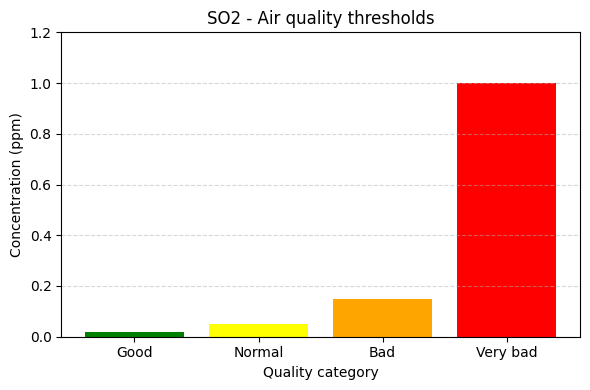

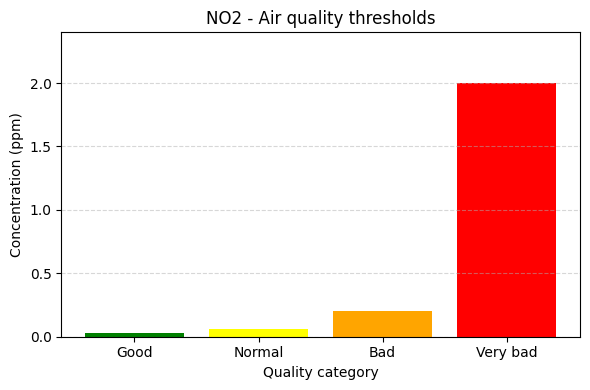

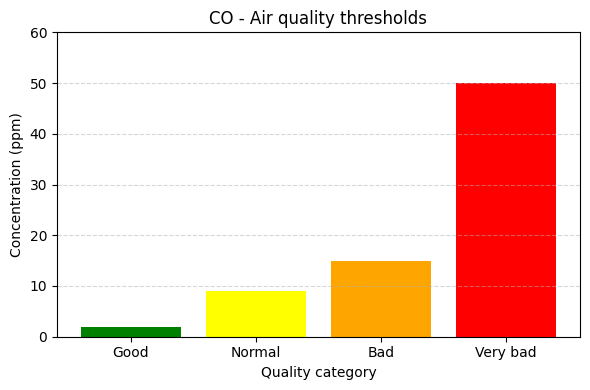

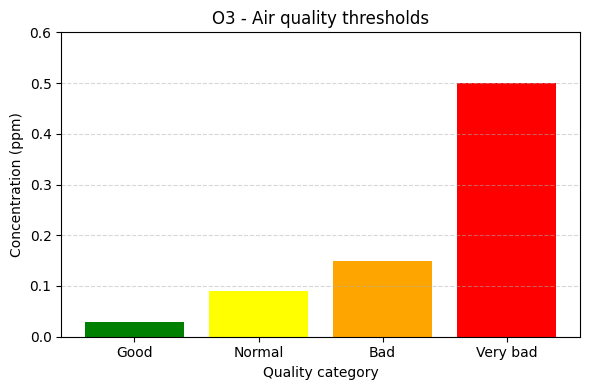

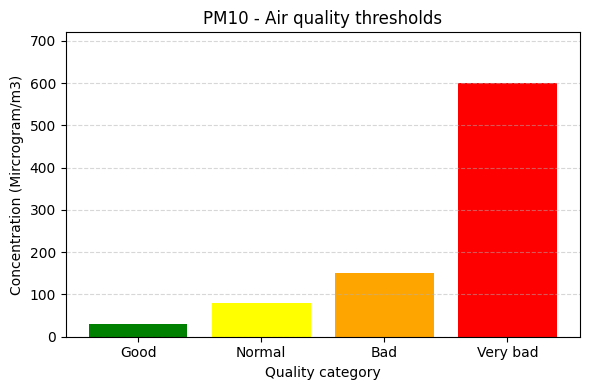

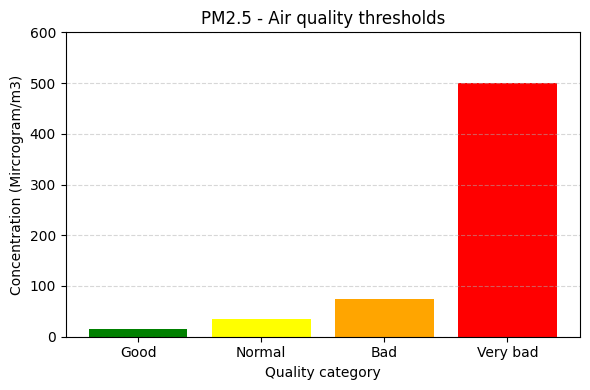

In [ ]:
# Stacked Bar Chart by Pollutant
# We go through each pollutant and make an individual graph
for idx, row in pollutant_data.iterrows():
    contaminante = row['Item name']
    unidad = row['Unit of measurement']
    valores = [row['Good'], row['Normal'], row['Bad'], row['Very bad']]
    categorias = ['Good', 'Normal', 'Bad', 'Very bad']
    colores = ['green', 'yellow', 'orange', 'red']

    plt.figure(figsize=(6, 4))
    plt.bar(categorias, valores, color=colores)
    plt.title(f'{contaminante} - Air quality thresholds')
    plt.xlabel('Quality category')
    plt.ylabel(f'Concentration ({unidad})')
    plt.ylim(0, max(valores) * 1.2)  # Adjustment for visibility
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
pollutant_data

Item code Item name Unit of measurement   Good  Normal     Bad  Very bad
0          0       SO2                 ppm   0.02    0.05    0.15       1.0
1          2       NO2                 ppm   0.03    0.06    0.20       2.0
2          4        CO                 ppm   2.00    9.00   15.00      50.0
3          5        O3                 ppm   0.03    0.09    0.15       0.5
4          7      PM10       Mircrogram/m3  30.00   80.00  150.00     600.0
5          8     PM2.5       Mircrogram/m3  15.00   35.00   75.00     500.0

In [ ]:
# We create a function that has the `value` and the `name_pollutant` as parameters
# and that returns the status/quality of the value:

def classify_air_quality(value, contaminant, df=pollutant_data):
    """
    Classifies air quality based on concentration and pollutant.

    Parameters:
    - value: float, measured concentration
    - pollutant: str, pollutant name (e.g., 'SO2')
    - df: DataFrame containing quality thresholds (default: pollutant_data)

    Returns:
    - str: quality category ('Good', 'Normal', 'Bad', 'Very bad')
    """
    fila = df[df['Item name'] == contaminant]

    if fila.empty:
        return "Unrecognized contaminant"

    good = fila['Good'].values[0]
    normal = fila['Normal'].values[0]
    bad = fila['Bad'].values[0]
    very_bad = fila['Very bad'].values[0]

    if value <= good:
        return "Good"
    elif value <= normal:
        return "Normal"
    elif value <= bad:
        return "Bad"
    elif value <= very_bad or value>very_bad:
        return "Very bad"


In [ ]:
# Examples
print(classify_air_quality(0, 'SO2'))   # Good
print(classify_air_quality(10, 'CO'))      # Bad
print(classify_air_quality(0.7, 'O3'))     # Very bad
print(classify_air_quality(700, 'PM10'))   # Very bad

Good
Bad
Very bad
Very bad


***
#### measurement_data

In [ ]:
measurement_data.head(16)

Measurement date  Station code   Latitude   Longitude    SO2    NO2  \
0   2021-01-01 00:00:00           204  37.572016  127.005008  0.004  0.059   
1   2021-01-01 01:00:00           204  37.572016  127.005008  0.004  0.058   
2   2021-01-01 02:00:00           204  37.572016  127.005008  0.004  0.056   
3   2021-01-01 03:00:00           204  37.572016  127.005008  0.004  0.056   
4   2021-01-01 04:00:00           204  37.572016  127.005008  0.003  0.051   
5   2021-01-01 05:00:00           204  37.572016  127.005008  0.003  0.046   
6   2021-01-01 06:00:00           204  37.572016  127.005008  0.003  0.049   
7   2021-01-01 07:00:00           204  37.572016  127.005008  0.003  0.045   
8   2021-01-01 08:00:00           204  37.572016  127.005008  0.004  0.047   
9   2021-01-01 09:00:00           204  37.572016  127.005008  0.003  0.047   
10  2021-01-01 10:00:00           204  37.572016  127.005008  0.004  0.045   
11  2021-01-01 11:00:00           204  37.572016  127.005008  0.004  0.048   
12  2021-01-01 12:00:00           204  37.572016  127.005008  0.004  0.054   
13  2021-01-01 13:00:00           204  37.572016  127.005008  0.005  0.050   
14  2021-01-01 14:00:00           204  37.572016  127.005008  0.006  0.055   
15  2021-01-01 15:00:00           204  37.572016  127.005008  0.006  0.056   

       O3   CO  PM10  PM2.5  
0   0.002  1.2  73.0   57.0  
1   0.002  1.2  71.0   59.0  
2   0.002  1.2  70.0   59.0  
3   0.002  1.2  70.0   58.0  
4   0.002  1.2  69.0   61.0  
5   0.002  1.1  70.0   61.0  
6   0.002  1.1  66.0   57.0  
7   0.002  1.0  71.0   60.0  
8   0.002  1.1  72.0   60.0  
9   0.002  1.1  74.0   63.0  
10  0.004  1.0  76.0   68.0  
11  0.005  1.0  83.0   74.0  
12  0.005  1.0  93.0   79.0  
13  0.007  1.0  94.0   79.0  
14  0.008  0.9  93.0   78.0  
15  0.008  0.8  87.0   69.0

In [ ]:
measurement_data.columns

Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')

`Measurement date`

In [ ]:
measurement_data['Measurement date'].unique()

array(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
       '2021-01-01 02:00:00', ..., '2023-12-31 22:00:00',
       '2023-12-31 23:00:00', '2023-03-11 09:00:00'], dtype=object)

In [4]:
# We convert the date columns to datetime format
measurement_data["Measurement date"] = pd.to_datetime(measurement_data["Measurement date"])
measurement_data["Measurement date"].nunique()

25906

In [ ]:
print("Fecha min: {}".format(measurement_data['Measurement date'].min()))
print("Fecha max: {}".format(measurement_data['Measurement date'].max()))
print(measurement_data.shape)

Fecha min: 2021-01-01 00:00:00
Fecha max: 2023-12-31 23:00:00
(621588, 10)


`Station code`

In [ ]:
print("Values: {}".format(measurement_data['Station code'].unique()))
print("Unique values: {}".format(measurement_data['Station code'].nunique()))

Values: [204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228]
Unique values: 25


In [ ]:
# Count of values in each Station:
measurement_data['Station code'].value_counts()

Station code
213    25906
214    25905
227    25905
204    25905
212    25904
218    25904
221    25904
207    25896
222    25894
220    25892
215    25892
216    25892
210    25891
208    25890
205    25173
228    25172
225    24453
224    24453
219    23710
209    23709
217    23057
226    23056
211    22316
223    22316
206    21593
Name: count, dtype: int64

How many records are per Station Code?

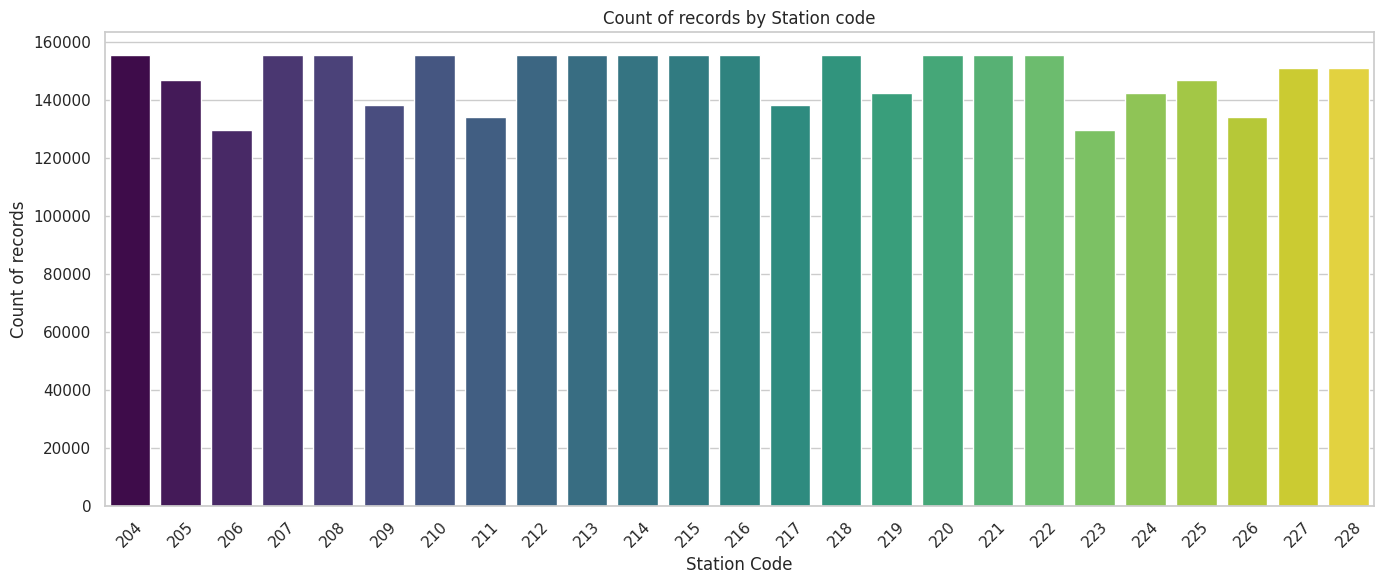

In [ ]:
# Barplot of records by Station Code
# We count hoy many records are by each Station code
station_counts = instrument_data['Station code'].value_counts().sort_index()

# We convert a DataFrame to use with seaborn
station_df = station_counts.reset_index()
station_df.columns = ['Station code', 'count']

# Graphic
plt.figure(figsize=(14, 6))
sns.barplot(data=station_df, x='Station code', y='count', hue='Station code', palette='viridis', legend=False)

plt.title('Count of records by Station code')
plt.xlabel('Station Code')
plt.ylabel('Count of records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


`Latitude`

In [ ]:
measurement_data['Latitude'].unique()

array([37.5720164, 37.5642629, 37.5400327, 37.6098232, 37.5937421,
       37.5555803, 37.5418642, 37.5471803, 37.5757428, 37.5848485,
       37.6067189, 37.6479299, 37.6541919, 37.6587743, 37.5259388,
       37.54464  , 37.4984981, 37.4523569, 37.5250065, 37.4809167,
       37.4873546, 37.5045471, 37.5175282, 37.5026857, 37.5449625])

In [ ]:
print("Fecha min: {}".format(measurement_data['Latitude'].min()))
print("Fecha max: {}".format(measurement_data['Latitude'].max()))

Fecha min: 37.4523569
Fecha max: 37.6587743


In [ ]:
# Let's check if there is only one Latitude for each Station
stations_codes = measurement_data['Station code'].unique()

for c in stations_codes:
  print("Station {} -> Latitude: {}".format(c, measurement_data['Latitude'][measurement_data['Station code']==c].nunique()))

Station 204 -> Latitude: 1
Station 205 -> Latitude: 1
Station 206 -> Latitude: 1
Station 207 -> Latitude: 1
Station 208 -> Latitude: 1
Station 209 -> Latitude: 1
Station 210 -> Latitude: 1
Station 211 -> Latitude: 1
Station 212 -> Latitude: 1
Station 213 -> Latitude: 1
Station 214 -> Latitude: 1
Station 215 -> Latitude: 1
Station 216 -> Latitude: 1
Station 217 -> Latitude: 1
Station 218 -> Latitude: 1
Station 219 -> Latitude: 1
Station 220 -> Latitude: 1
Station 221 -> Latitude: 1
Station 222 -> Latitude: 1
Station 223 -> Latitude: 1
Station 224 -> Latitude: 1
Station 225 -> Latitude: 1
Station 226 -> Latitude: 1
Station 227 -> Latitude: 1
Station 228 -> Latitude: 1


`Longitude`

In [ ]:
measurement_data['Longitude'].unique()

array([127.0050075, 126.9746757, 127.00485  , 126.9348476, 126.9496787,
       126.9055975, 127.0496589, 127.0924929, 127.0288848, 127.0940229,
       127.0272794, 127.0119518, 127.0290879, 127.0685054, 126.8566029,
       126.8351506, 126.8896924, 126.9082956, 126.8973705, 126.9714807,
       126.927102 , 126.9944578, 127.0474699, 127.0925092, 127.1367917])

In [ ]:
print("Fecha min: {}".format(measurement_data['Longitude'].min()))
print("Fecha max: {}".format(measurement_data['Longitude'].max()))

Fecha min: 126.8351506
Fecha max: 127.13679170000002


In [ ]:
# Let's check if there is only one Longitude for each Station
stations_codes = measurement_data['Station code'].unique()

for c in stations_codes:
  print("Station {} -> Longitude: {}".format(c, measurement_data['Longitude'][measurement_data['Station code']==c].nunique()))

Station 204 -> Longitude: 1
Station 205 -> Longitude: 1
Station 206 -> Longitude: 1
Station 207 -> Longitude: 1
Station 208 -> Longitude: 1
Station 209 -> Longitude: 1
Station 210 -> Longitude: 1
Station 211 -> Longitude: 1
Station 212 -> Longitude: 1
Station 213 -> Longitude: 1
Station 214 -> Longitude: 1
Station 215 -> Longitude: 1
Station 216 -> Longitude: 1
Station 217 -> Longitude: 1
Station 218 -> Longitude: 1
Station 219 -> Longitude: 1
Station 220 -> Longitude: 1
Station 221 -> Longitude: 1
Station 222 -> Longitude: 1
Station 223 -> Longitude: 1
Station 224 -> Longitude: 1
Station 225 -> Longitude: 1
Station 226 -> Longitude: 1
Station 227 -> Longitude: 1
Station 228 -> Longitude: 1


Where are the Stations located?

In [ ]:
# Map of each Station
# Filter unique stations by 'station code'
unique_stations = measurement_data.drop_duplicates(subset=['Station code'])

# We create the map centered on an average point of all the stations
latitude_mean = unique_stations['Latitude'].mean()
longitude_mean = unique_stations['Longitude'].mean()

# Creation of the map
map = folium.Map(location=[latitude_mean, longitude_mean], zoom_start=6)

# We added the station points to the map (only one per station)
for idx, row in unique_stations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Station Code: {row['Station code']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map)

# We show the map
map

Quiero para cada contaminante:

* Cuantos valores tiene cada Categoria (Good, Normal, Bad, Very bad)

* Hacer un grafico que muestre la cant x categoria

`SO2`

In [ ]:
measurement_data['SO2'].nunique()

181

In [ ]:
print("Max: {}".format(max(measurement_data['SO2'])))
print("Min: {}".format(min(measurement_data['SO2'])))

Max: 3.736
Min: -1.0


`NO2`

In [ ]:
measurement_data['NO2'].nunique()

131

In [ ]:
print("Max: {}".format(max(measurement_data['NO2'])))
print("Min: {}".format(min(measurement_data['NO2'])))

Max: 38.445
Min: -1.0


`O3`

In [ ]:
measurement_data['O3'].nunique()

250

In [ ]:
print("Max: {}".format(max(measurement_data['O3'])))
print("Min: {}".format(min(measurement_data['O3'])))

Max: 33.6
Min: -1.0


`CO`

In [ ]:
measurement_data['CO'].nunique()

162

In [ ]:
print("Max: {}".format(max(measurement_data['CO'])))
print("Min: {}".format(min(measurement_data['CO'])))

Max: 71.7
Min: -1.0


`PM10`

In [ ]:
measurement_data['PM10'].nunique()

550

In [ ]:
print("Max: {}".format(max(measurement_data['PM10'])))
print("Min: {}".format(min(measurement_data['PM10'])))

Max: 3586.0
Min: -1.0


`PM2.5`

In [ ]:
measurement_data['PM2.5'].nunique()

321

In [ ]:
print("Max: {}".format(max(measurement_data['PM2.5'])))
print("Min: {}".format(min(measurement_data['PM2.5'])))

Max: 6256.0
Min: -1.0


Daily average chart of all pollutants

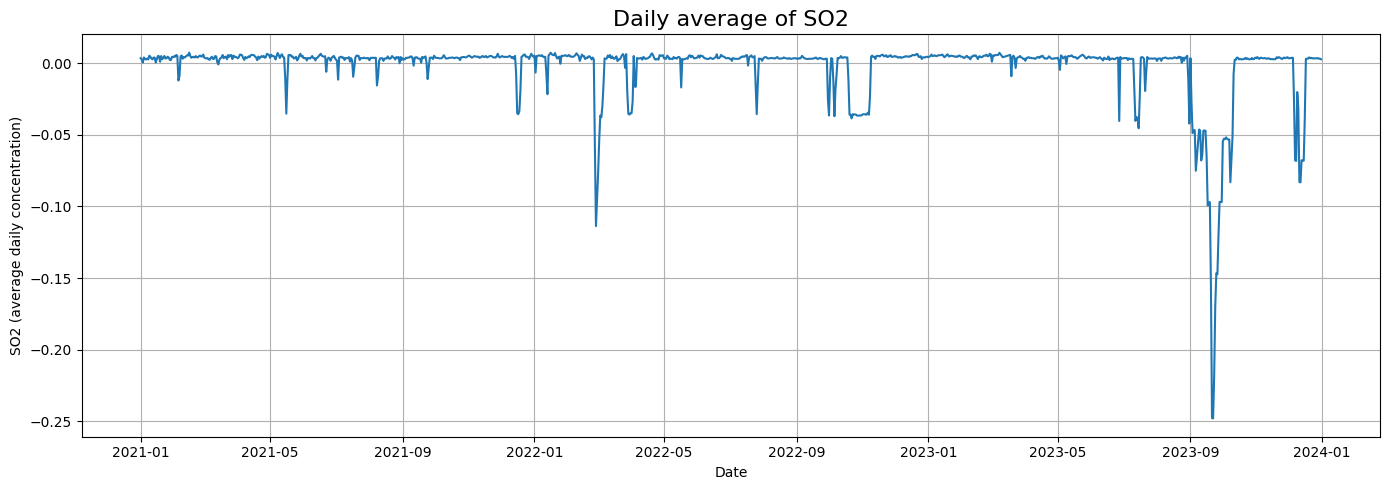

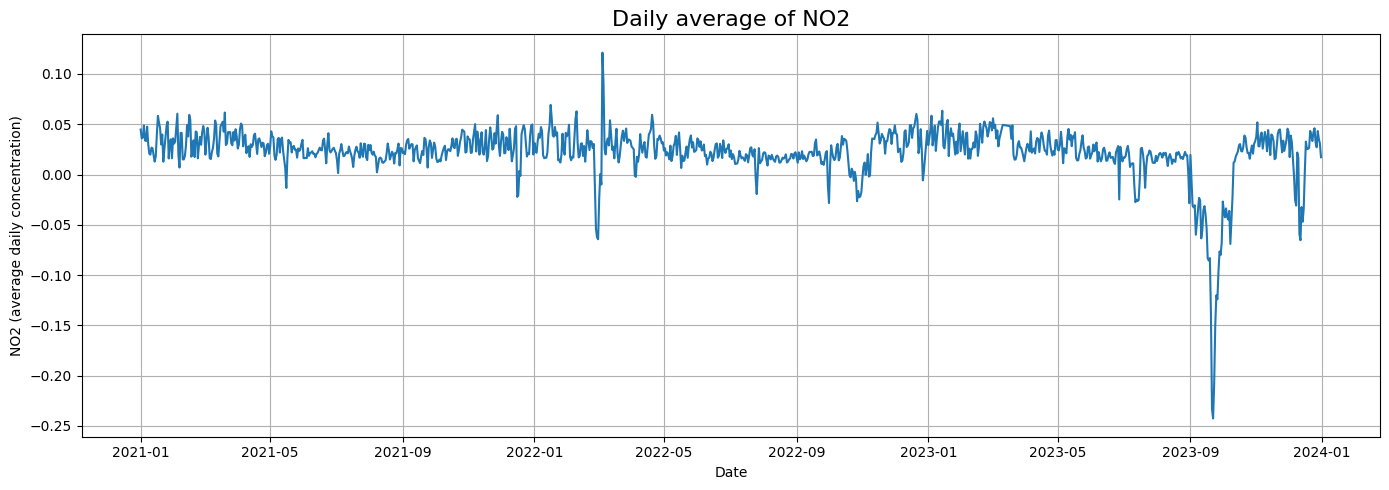

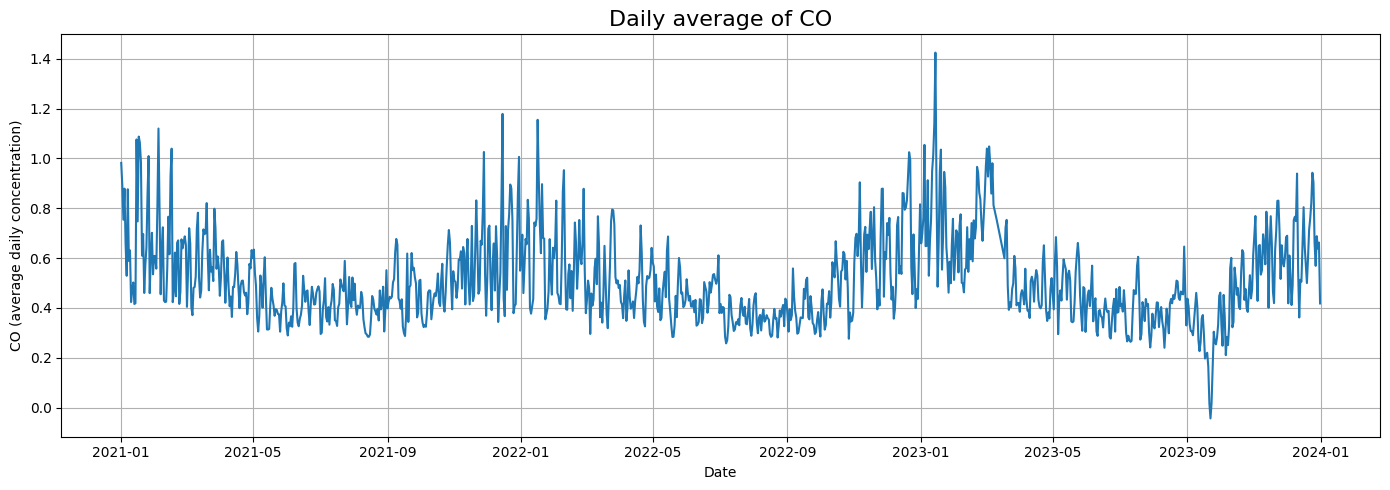

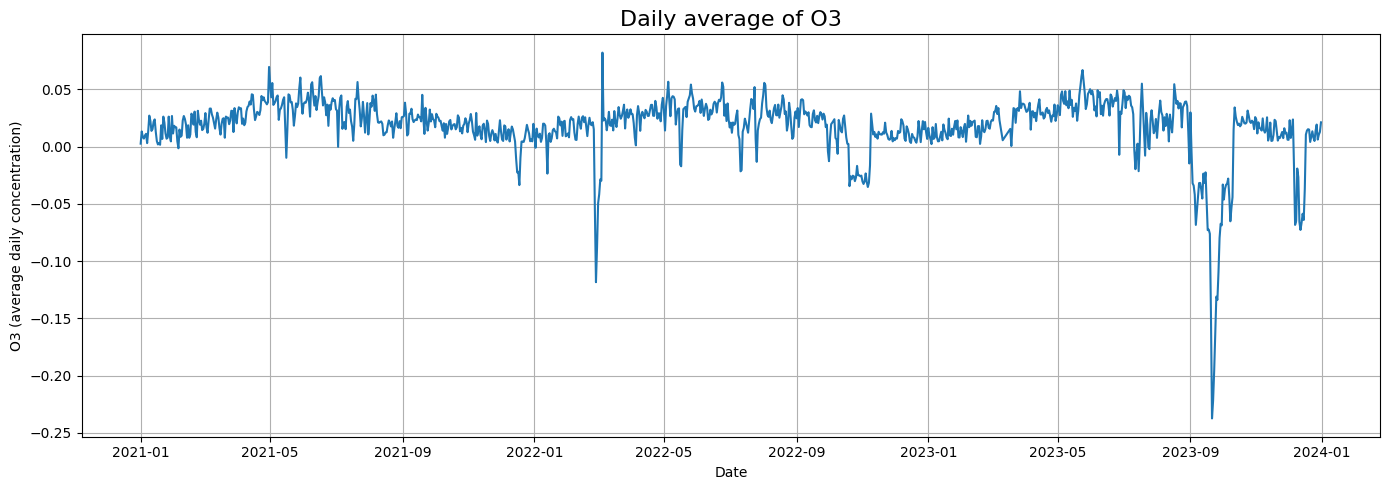

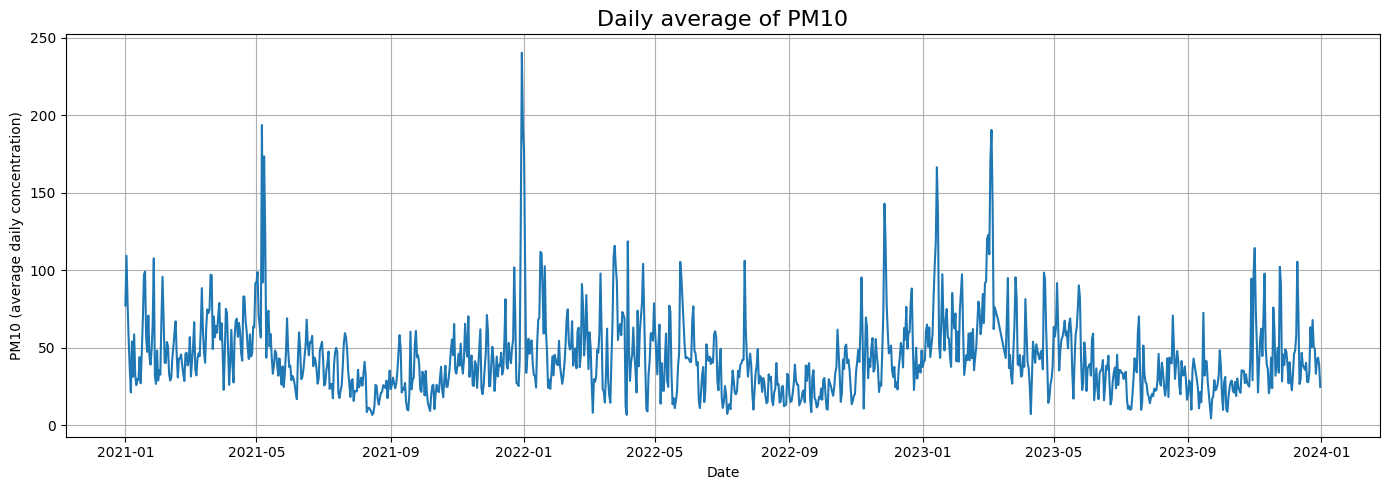

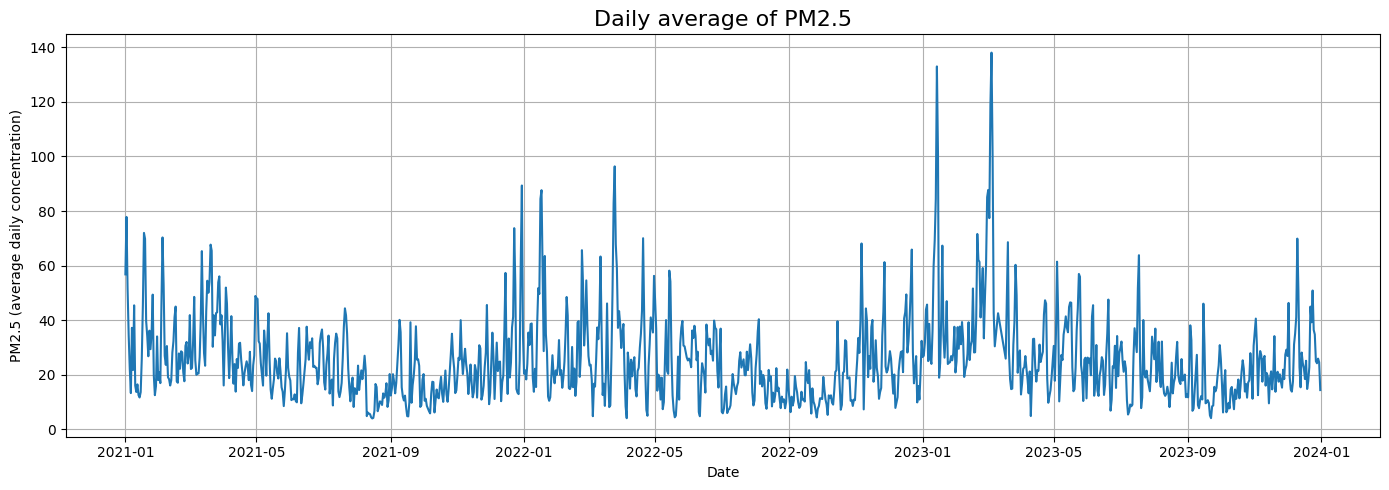

In [ ]:
# We create a copy from the original dataset
measurement_data_copy = measurement_data.copy()

# We make sure that the date column is in datetime format
measurement_data_copy['Measurement date'] = pd.to_datetime(measurement_data_copy['Measurement date'])

# We group by date (without time) and calculate the daily average
measurement_data_copy['Date'] = measurement_data_copy['Measurement date'].dt.date
daily_avg = measurement_data_copy.groupby('Date')[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].mean().reset_index()

# We convert back to datetime (without time) for graphing
daily_avg['Date'] = pd.to_datetime(daily_avg['Date'])

# Graphic
pollutants = pollutant_data['Item name'].unique()

for pol in pollutants:
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=daily_avg, x='Date', y=pol)
    plt.title(f'Daily average of {pol}', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel(f'{pol} (average daily concentration)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Hourly Pattern Plots for All Pollutants

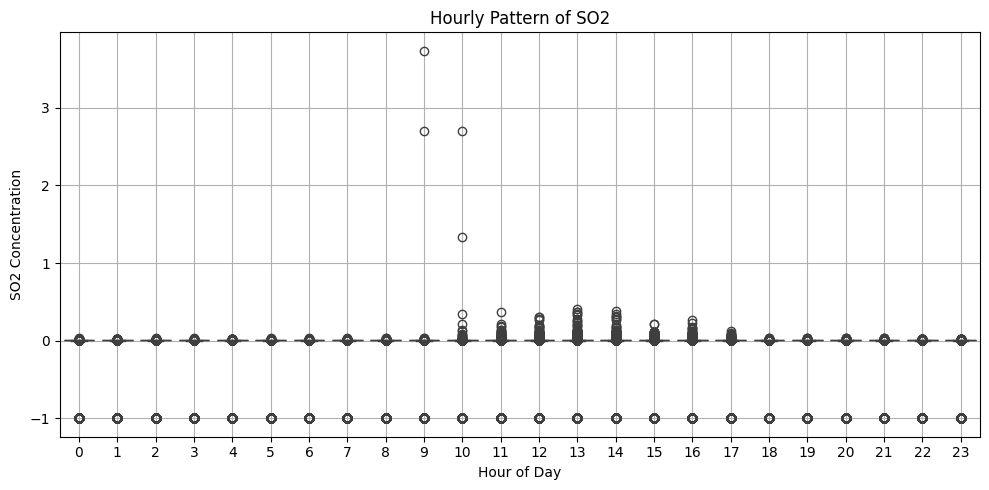

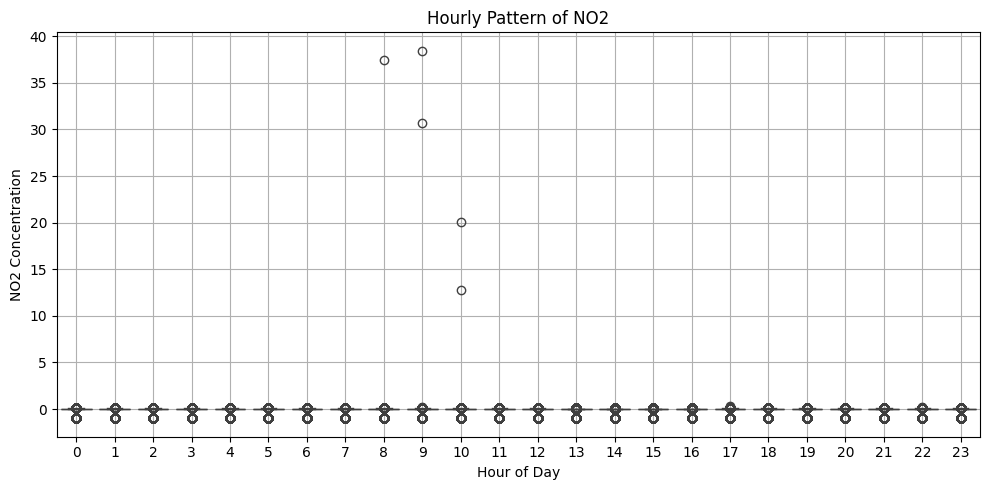

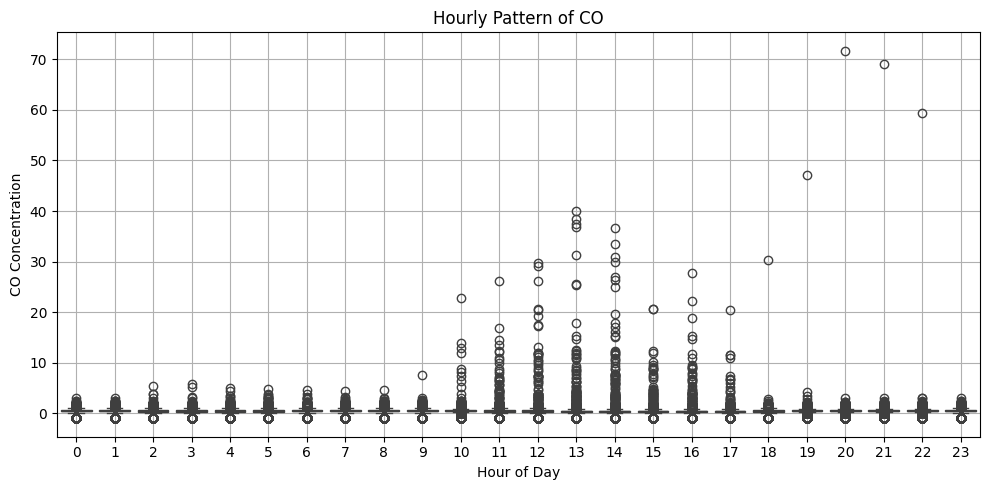

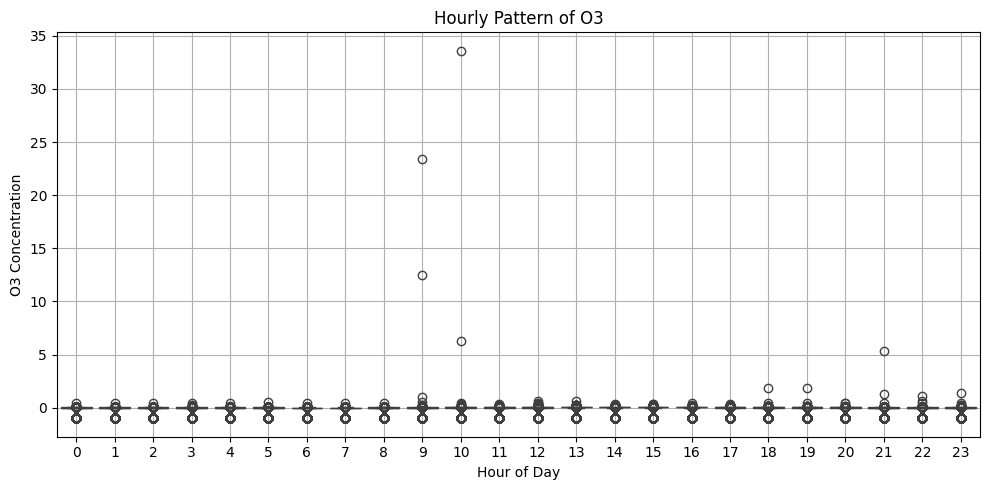

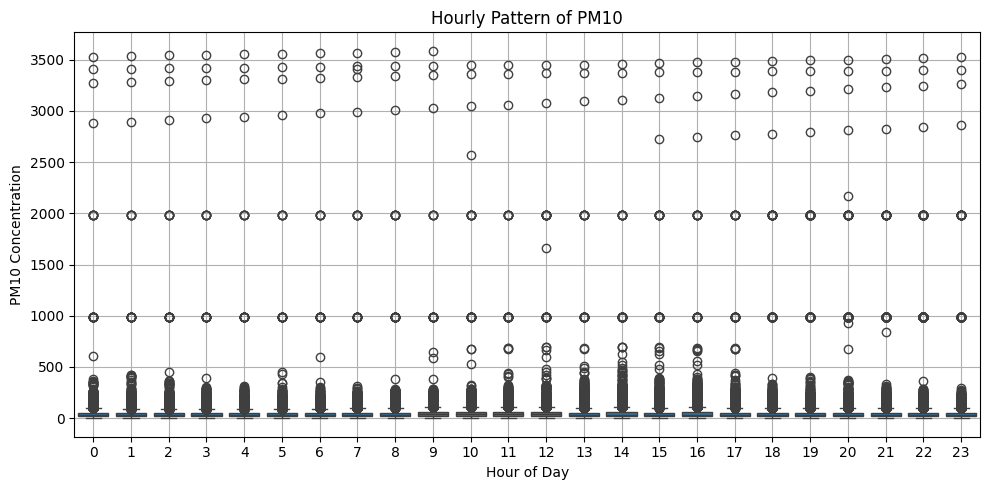

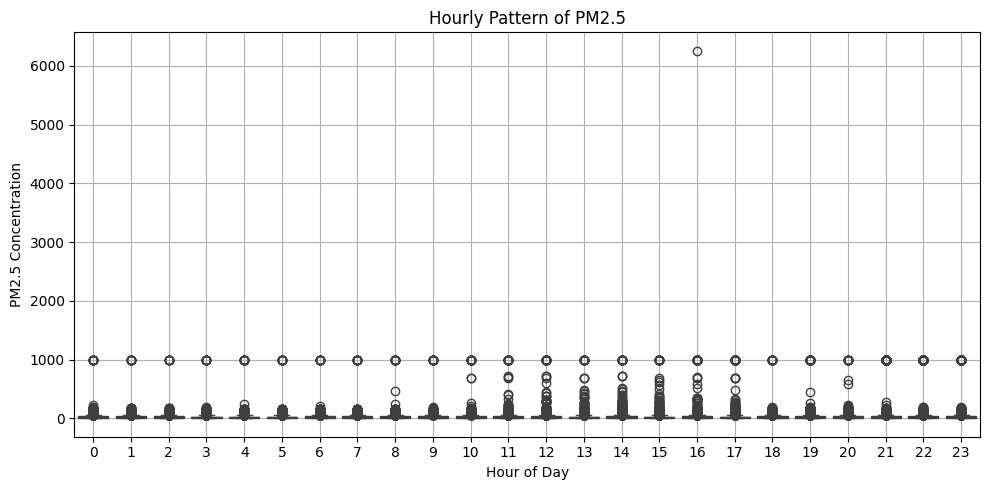

In [ ]:
# We create a copy from the original dataset
measurement_data_copy = measurement_data.copy()

# Convert the datetime column to pandas datetime if not already
measurement_data_copy['Measurement date'] = pd.to_datetime(measurement_data_copy['Measurement date'])

# Extract hour from datetime
measurement_data_copy['hour'] = measurement_data_copy['Measurement date'].dt.hour

# List of pollutant columns
pollutants = pollutant_data['Item name'].unique()

# Loop through each pollutant and plot its hourly distribution
for pol in pollutants:
    plt.figure(figsize=(10, 5))

    # Create a boxplot of the pollutant values by hour of the day
    sns.boxplot(data=measurement_data_copy, x='hour', y=pol)

    plt.title(f'Hourly Pattern of {pol}')
    plt.xlabel('Hour of Day')
    plt.ylabel(f'{pol} Concentration')
    plt.grid(True)
    plt.tight_layout()


Heatmap of correlations between pollutants

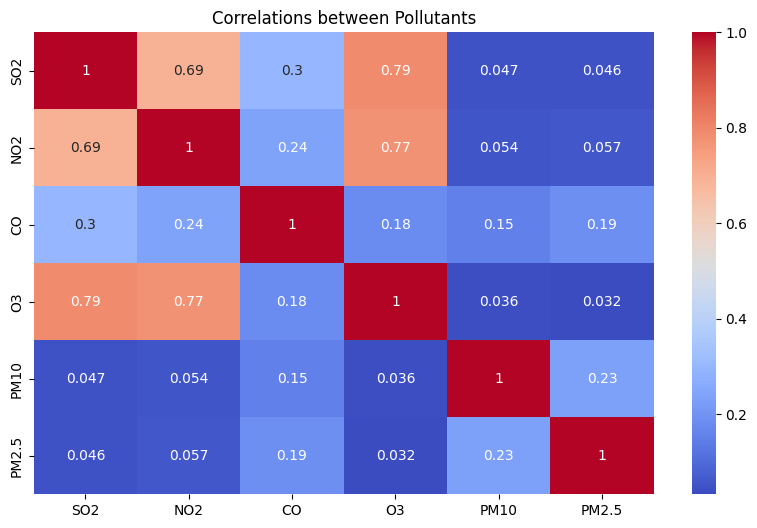

In [ ]:
# Graphic
plt.figure(figsize=(10, 6))
corr = measurement_data[pollutants].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlations between Pollutants")
plt.show()


Histograms/Distributions of each Air Pollutant

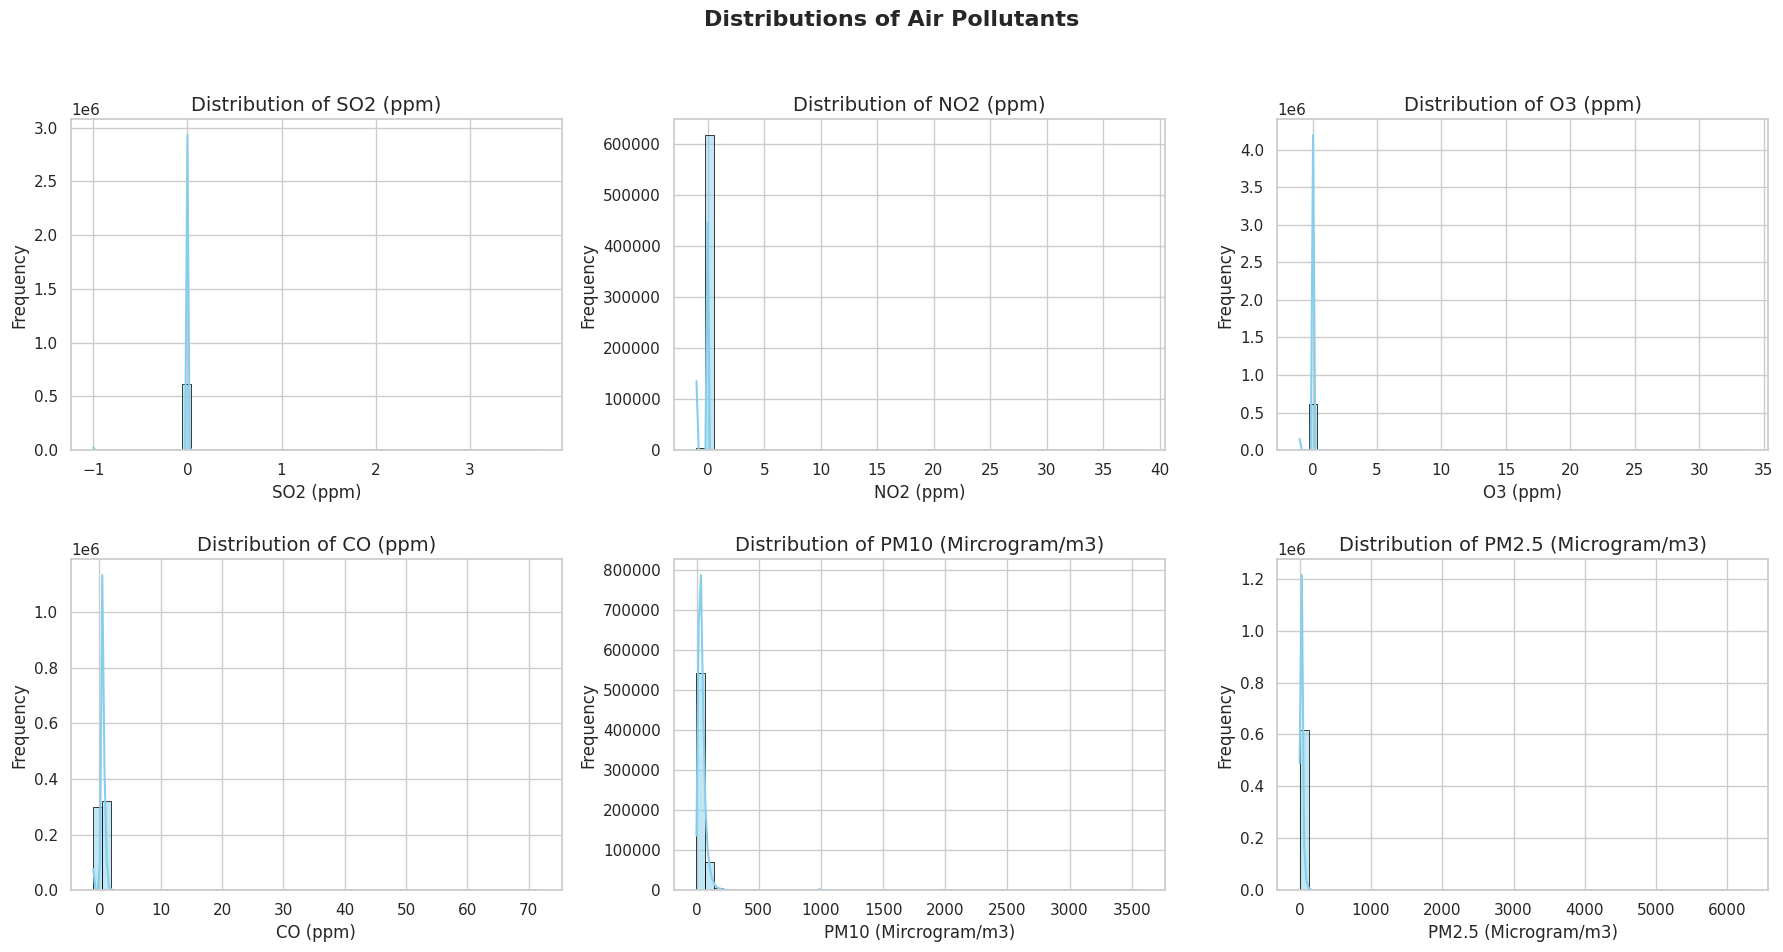

In [ ]:
# Estilo general profesional
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# Lista de contaminantes a graficar
pollutants = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

# Cargar unidades desde pollutant_data
unit_map = pollutant_data.set_index('Item name')['Unit of measurement'].to_dict()

# Corrección para asegurar compatibilidad de nombres
unit_map['PM2.5'] = 'Microgram/m3'  # Lo añadimos si no está
if 'PM2.5' not in unit_map:
    unit_map['PM2.5'] = 'Microgram/m3'

# Figura general
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Graficamos cada contaminante
for i, pol in enumerate(pollutants):
    ax = axes[i]
    data = measurement_data[pol].dropna()
    unidad = unit_map.get(pol, '')  # Buscar la unidad correspondiente

    sns.histplot(data, kde=True, bins=50, ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(f'Distribution of {pol} ({unidad})')
    ax.set_xlabel(f'{pol} ({unidad})')
    ax.set_ylabel('Frequency')

# Ajustes finales
plt.suptitle("Distributions of Air Pollutants", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Obervations by contaminent:**

The ***KDE (Kernel Density Estimate) curve***, which is a smoothed version of the histogram. It helps visualize the shape of the distribution (like a “bell”).


***SO₂ (ppm)***
* Distribution symmetrical highly skewed to the right (positive).
* Almost all values ​​are concentrated near 0 ppm.<br>
Conclusion: Most SO₂ measurements remain at low levels. There may be outliers (extreme values) in the higher range.

***NO₂ (ppm)***
* Pattern similar to SO₂: very high concentration of low values.
* Some high values ​​appear to be far from the center of the distribution.<br>
Conclusion: Low values ​​predominate, but there are potential outliers that should be analyzed.

***O₃ (ppm)***
* The distribution shows a high frequency of low values, although it appears slightly more widespread than NO₂ and SO₂.
* There are values ​​that could be well above the typical level (outliers).<br>
Conclusion: This may indicate moderate ozone pollution, with exceptional cases.

***CO (ppm)***
* Most of the values ​​are below 10 ppm (the acceptable level), but there is a long tail to the right.
* Many outliers are identified, some very distant (up to 70 ppm).<br>
Conclusion: This is the variable most prone to extreme outliers. It requires specific treatment.

***PM10 (µg/m³)***
* Distribution fairly concentrated at low values ​​(less than 200 µg/m³), but with considerable dispersion to the right.
* Possible outliers above 500 µg/m³.<br>
Conclusion: Although the concentration is at acceptable levels, there are many records that could indicate high pollution events.

***PM2.5 (µg/m³)***
* Similar to PM10, but with an even longer tail.
* Some values ​​far exceed 1000 µg/m³, which is very unusual.<br>
Conclusion: Potential measurement errors or severe pollution episodes. These values ​​need to be reviewed.



Are there abnormal values??

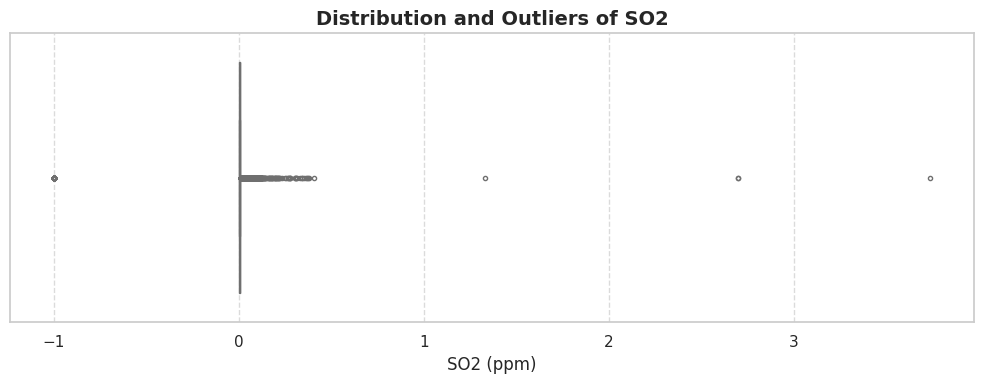

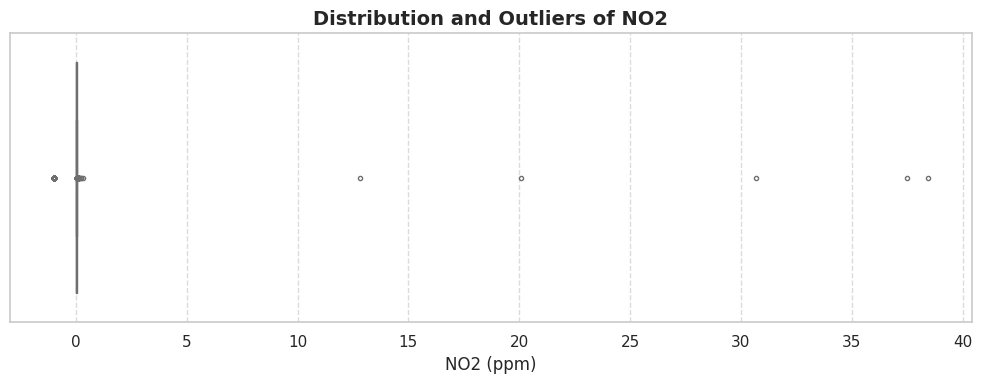

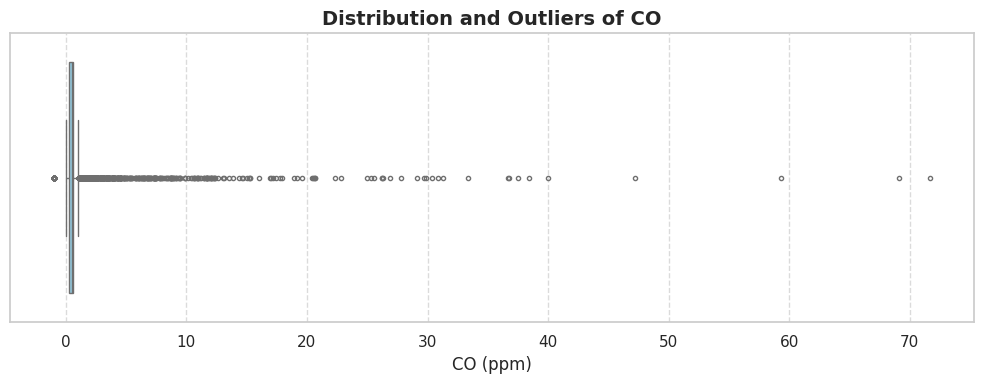

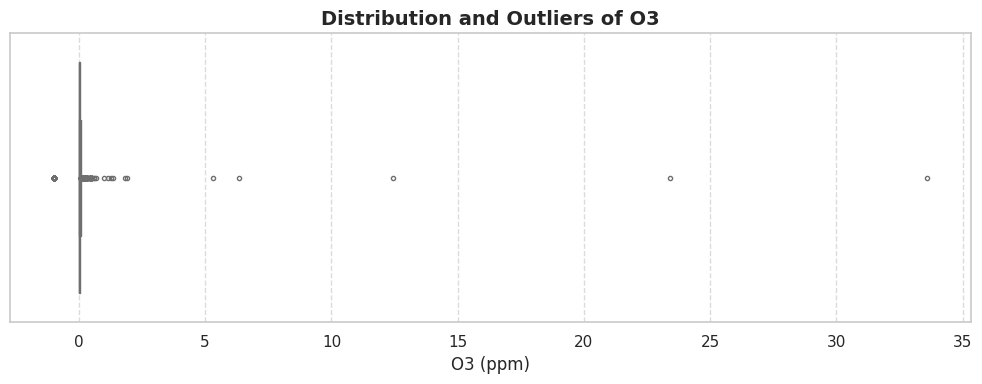

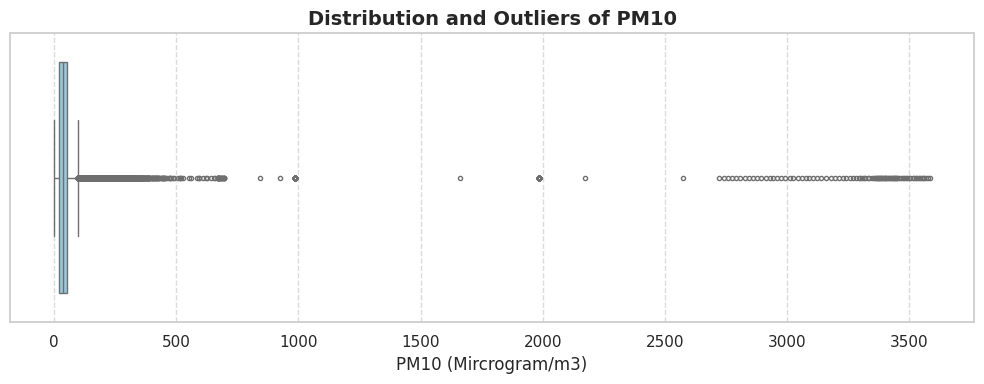

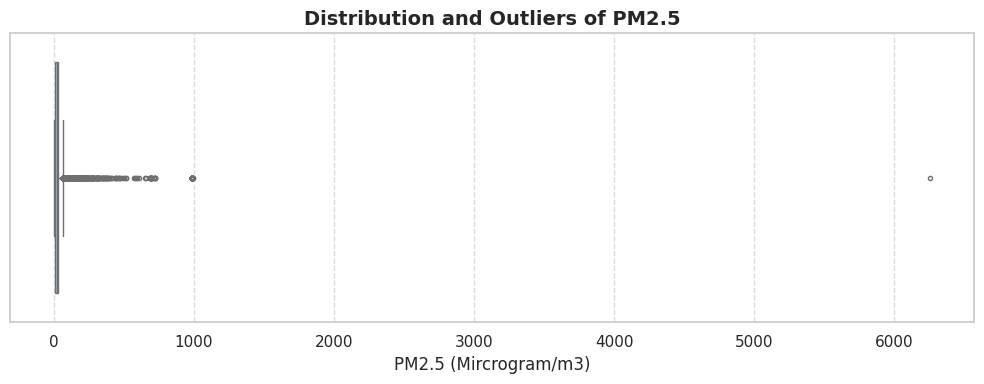

In [ ]:
# Boxplots of each Air Contaminant
# List of contaminants
pollutants = pollutant_data['Item name'].unique()

# We create diccionary with units by contaminant from pollutant_data
units_dict = pollutant_data.set_index('Item name')['Unit of measurement'].to_dict()

# Graphic
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 5)})

# Boxplots
for pol in pollutants:
    if pol in measurement_data.columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=measurement_data[pol], color='skyblue', fliersize=3, linewidth=1)
        unit = units_dict.get(pol, '')
        plt.title(f'Distribution and Outliers of {pol}', fontsize=14, fontweight='bold')
        plt.xlabel(f'{pol} ({unit})')
        plt.grid(True, axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


***
#### instrument_data

In [ ]:
instrument_data

Measurement date  Station code  Item code  Average value  \
0        2021-01-01 00:00:00           204          0          0.004   
1        2021-01-01 00:00:00           204          2          0.059   
2        2021-01-01 00:00:00           204          4          1.200   
3        2021-01-01 00:00:00           204          5          0.002   
4        2021-01-01 00:00:00           204          7         73.000   
...                      ...           ...        ...            ...   
3703657  2023-11-30 23:00:00           228          7         41.000   
3703658  2023-11-30 23:00:00           228          5          0.008   
3703659  2023-11-30 23:00:00           228          4          0.600   
3703660  2023-11-30 23:00:00           228          2          0.045   
3703661  2023-11-30 23:00:00           228          0          0.004   

         Instrument status  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
3703657                  0  
3703658                  0  
3703659                  0  
3703660                  0  
3703661                  0  

[3703662 rows x 5 columns]

In [ ]:
instrument_data.columns

Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status'],
      dtype='object')

`Measurement date`

In [ ]:
instrument_data['Measurement date'].unique()

array(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
       '2021-01-01 02:00:00', ..., '2023-12-31 22:00:00',
       '2023-12-31 23:00:00', '2023-03-11 09:00:00'], dtype=object)

In [ ]:
print("Fecha min: {}".format(instrument_data['Measurement date'].min()))
print("Fecha max: {}".format(instrument_data['Measurement date'].max()))

Fecha min: 2021-01-01 00:00:00
Fecha max: 2023-12-31 23:00:00


let's check how many duplicated dates values do we have

In [ ]:
instrument_data["Measurement date"].nunique()

25906

In [ ]:
instrument_data["Measurement date"].duplicated().value_counts()

Measurement date
True     3677756
False      25906
Name: count, dtype: int64

In [5]:
#  We convert the date columns to datetime format
instrument_data["Measurement date"] = pd.to_datetime(instrument_data["Measurement date"])

In [ ]:
instrument_data['Station code'][instrument_data['Measurement date'] == '2021-01-01 00:00:00'].value_counts()

Station code
204    6
205    6
206    6
207    6
208    6
209    6
210    6
211    6
212    6
213    6
214    6
215    6
216    6
217    6
218    6
219    6
220    6
221    6
222    6
223    6
224    6
225    6
226    6
227    6
228    6
Name: count, dtype: int64

In [ ]:
# Verificar el número de combinaciones únicas de 'Station code' y 'Measurement date'
instrument_data_count = instrument_data.groupby(['Station code', 'Measurement date']).size().reset_index(name='count')
instrument_data_count

Station code    Measurement date  count
0                204 2021-01-01 00:00:00      6
1                204 2021-01-01 01:00:00      6
2                204 2021-01-01 02:00:00      6
3                204 2021-01-01 03:00:00      6
4                204 2021-01-01 04:00:00      6
...              ...                 ...    ...
617272           228 2023-11-30 19:00:00      6
617273           228 2023-11-30 20:00:00      6
617274           228 2023-11-30 21:00:00      6
617275           228 2023-11-30 22:00:00      6
617276           228 2023-11-30 23:00:00      6

[617277 rows x 3 columns]

`Station code`

In [ ]:
print("Values: {}".format(instrument_data['Station code'].unique()))
print("Unique values: {}".format(instrument_data['Station code'].nunique()))

Values: [204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228]
Unique values: 25


In [ ]:
instrument_data['Station code'].value_counts()

Station code
213    155436
214    155430
204    155430
212    155424
218    155424
221    155424
207    155376
222    155364
220    155352
216    155352
215    155352
210    155346
208    155340
227    151038
228    151032
225    146718
205    146718
219    142260
224    142254
209    138342
217    138342
226    133896
211    133896
206    129558
223    129558
Name: count, dtype: int64

In [ ]:
stations = instrument_data['Station code'].unique()

for s in stations:
  print("Station code {}: shape {}".format(s, instrument_data[instrument_data['Station code']==s].shape))

Station code 204: shape (155430, 5)
Station code 205: shape (146718, 5)
Station code 206: shape (129558, 5)
Station code 207: shape (155376, 5)
Station code 208: shape (155340, 5)
Station code 209: shape (138342, 5)
Station code 210: shape (155346, 5)
Station code 211: shape (133896, 5)
Station code 212: shape (155424, 5)
Station code 213: shape (155436, 5)
Station code 214: shape (155430, 5)
Station code 215: shape (155352, 5)
Station code 216: shape (155352, 5)
Station code 217: shape (138342, 5)
Station code 218: shape (155424, 5)
Station code 219: shape (142260, 5)
Station code 220: shape (155352, 5)
Station code 221: shape (155424, 5)
Station code 222: shape (155364, 5)
Station code 223: shape (129558, 5)
Station code 224: shape (142254, 5)
Station code 225: shape (146718, 5)
Station code 226: shape (133896, 5)
Station code 227: shape (151038, 5)
Station code 228: shape (151032, 5)


`Item code`

In [ ]:
print("Values: {}".format(instrument_data['Item code'].unique()))
print("Unique values: {}".format(instrument_data['Item code'].nunique()))

Values: [0 2 4 5 7 8]
Unique values: 6


In [ ]:
instrument_data['Item code'].value_counts()

Item code
0    617277
2    617277
4    617277
5    617277
7    617277
8    617277
Name: count, dtype: int64

In [ ]:
items = instrument_data['Item code'].unique()

for i in items:
  print("Item code {}: shape {}".format(i, instrument_data[instrument_data['Item code']==i].shape))

Item code 0: shape (617277, 5)
Item code 2: shape (617277, 5)
Item code 4: shape (617277, 5)
Item code 5: shape (617277, 5)
Item code 7: shape (617277, 5)
Item code 8: shape (617277, 5)


`Average value`

In [ ]:
print("Values: {}".format(instrument_data['Average value'].unique()))
print("Unique values: {}".format(instrument_data['Average value'].nunique()))

Values: [4.00e-03 5.90e-02 1.20e+00 ... 2.27e-01 1.74e+01 3.56e+02]
Unique values: 1010


In [ ]:
print("Max: {}".format(max(instrument_data['Average value'])))
print("Min: {}".format(min(instrument_data['Average value'])))

Max: 6256.0
Min: -1.0


`Instrument status`

In [ ]:
print("Values: {}".format(instrument_data['Instrument status'].unique()))
print("Unique values: {}".format(instrument_data['Instrument status'].nunique()))

Values: [0 9 1 4 8 2]
Unique values: 6


In [ ]:
instrument_data['Instrument status'].value_counts()

Instrument status
0    3606696
8      28323
1      27147
9      19668
4      17960
2       3868
Name: count, dtype: int64

> Pie Chart with Porcentaje of each Instrument Status

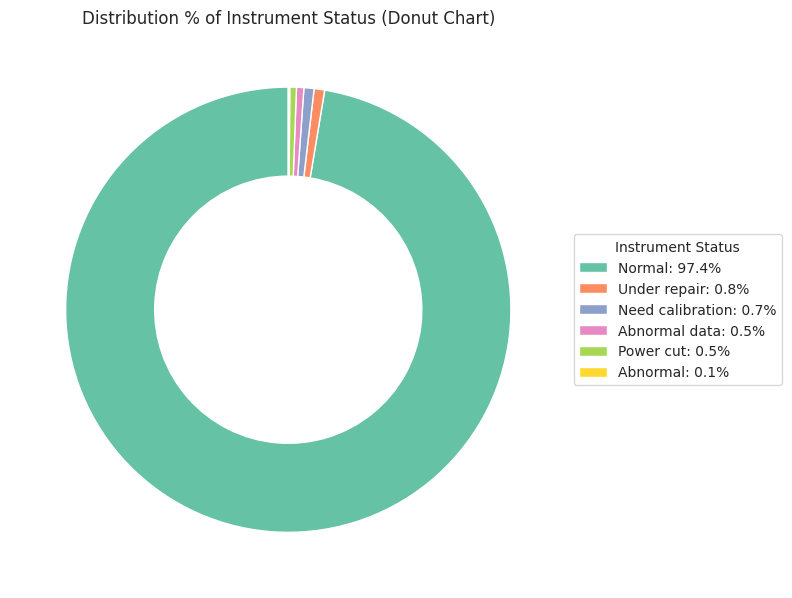

In [ ]:
import matplotlib.pyplot as plt

# We create a copy from the original dataset
instrument_data_copy = instrument_data.copy()

# Mapeo de los códigos a nombres legibles
estado_map = {
    0: "Normal",
    1: "Need calibration",
    2: "Abnormal",
    4: "Power cut",
    8: "Under repair",
    9: "Abnormal data"
}

# Aplicamos el mapeo
instrument_data_copy['Instrument status'] = instrument_data_copy['Instrument status'].map(estado_map)

colors = plt.cm.Set2.colors  # Paleta de colores


status_counts = instrument_data_copy['Instrument status'].value_counts()
status_percent = status_counts / status_counts.sum() * 100
# Crear gráfico tipo donut
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts = ax.pie(
    status_percent,
    labels=None,  # sin etiquetas directas
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'}  # Esto crea el hueco central
)

# Leyenda con nombre + %
ax.legend(
    wedges,
    [f"{label}: {perc:.1f}%" for label, perc in zip(status_percent.index, status_percent)],
    title="Instrument Status",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Título y formato
ax.set_title('Distribution % of Instrument Status (Donut Chart)')
plt.tight_layout()
plt.show()


> How many records are for each Instrument Status?

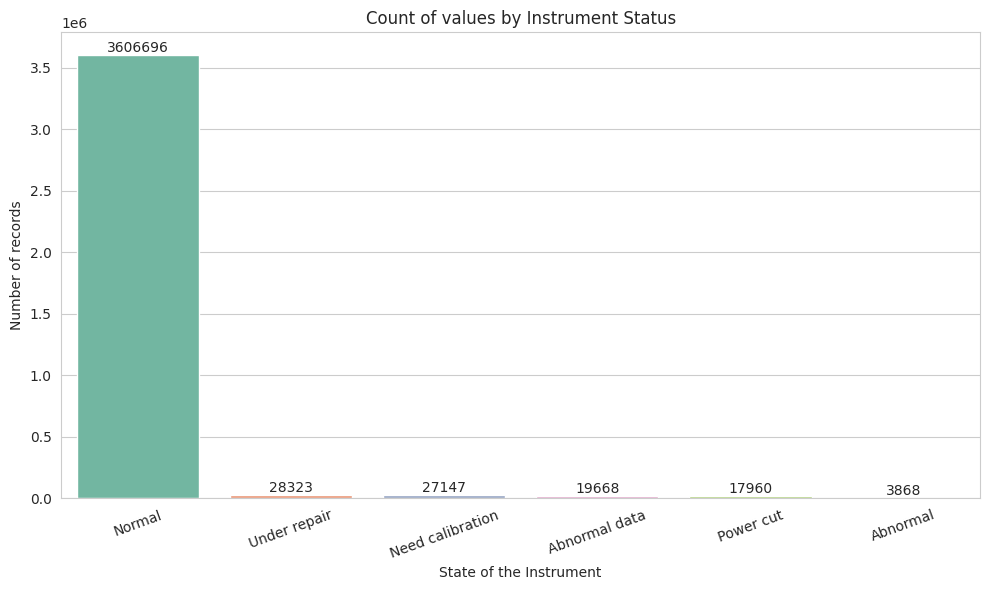

In [ ]:
# Bar Chart with Number of Records by Instrument Status:
# Crear un DataFrame a partir de los conteos
status_df = status_counts.reset_index()
status_df.columns = ['status_name', 'count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=status_df, x='status_name', y='count', hue='status_name', palette='Set2', legend=False)

# Agregar los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Count of values by Instrument Status')
plt.xlabel('State of the Instrument')
plt.ylabel('Number of records')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


## **4. Merged of Datatsets**


       
       




We want to obtain a unique df for each pollutant.

Each df will have the following columns:<br>

*     ` 'Measurement date' [year-month-day hour],  
       'Station code' [int],
       'Item code' [int],
       'Average value' [float],
       'Instrument status' [int],
       'Latitude' [float],
       'Longitude' [float],
       'name_contaminant' [float],  
       'air_quality' [str] `

In [6]:
measurement_data

Measurement date  Station code   Latitude   Longitude    SO2    NO2  \
0      2021-01-01 00:00:00           204  37.572016  127.005008  0.004  0.059   
1      2021-01-01 01:00:00           204  37.572016  127.005008  0.004  0.058   
2      2021-01-01 02:00:00           204  37.572016  127.005008  0.004  0.056   
3      2021-01-01 03:00:00           204  37.572016  127.005008  0.004  0.056   
4      2021-01-01 04:00:00           204  37.572016  127.005008  0.003  0.051   
...                    ...           ...        ...         ...    ...    ...   
621583 2023-11-30 19:00:00           228  37.544962  127.136792  0.005  0.061   
621584 2023-11-30 20:00:00           228  37.544962  127.136792  0.005  0.060   
621585 2023-11-30 21:00:00           228  37.544962  127.136792  0.005  0.061   
621586 2023-11-30 22:00:00           228  37.544962  127.136792  0.004  0.053   
621587 2023-11-30 23:00:00           228  37.544962  127.136792  0.004  0.045   

           O3   CO  PM10  PM2.5  
0       0.002  1.2  73.0   57.0  
1       0.002  1.2  71.0   59.0  
2       0.002  1.2  70.0   59.0  
3       0.002  1.2  70.0   58.0  
4       0.002  1.2  69.0   61.0  
...       ...  ...   ...    ...  
621583  0.002  0.7  72.0   18.0  
621584  0.003  0.7  64.0   18.0  
621585  0.003  0.7  55.0   18.0  
621586  0.005  0.6  50.0   18.0  
621587  0.008  0.6  41.0   18.0  

[621588 rows x 10 columns]

In [7]:
instrument_data

Measurement date  Station code  Item code  Average value  \
0       2021-01-01 00:00:00           204          0          0.004   
1       2021-01-01 00:00:00           204          2          0.059   
2       2021-01-01 00:00:00           204          4          1.200   
3       2021-01-01 00:00:00           204          5          0.002   
4       2021-01-01 00:00:00           204          7         73.000   
...                     ...           ...        ...            ...   
3703657 2023-11-30 23:00:00           228          7         41.000   
3703658 2023-11-30 23:00:00           228          5          0.008   
3703659 2023-11-30 23:00:00           228          4          0.600   
3703660 2023-11-30 23:00:00           228          2          0.045   
3703661 2023-11-30 23:00:00           228          0          0.004   

         Instrument status  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
3703657                  0  
3703658                  0  
3703659                  0  
3703660                  0  
3703661                  0  

[3703662 rows x 5 columns]

In [8]:
pollutant_data

Item code Item name Unit of measurement   Good  Normal     Bad  Very bad
0          0       SO2                 ppm   0.02    0.05    0.15       1.0
1          2       NO2                 ppm   0.03    0.06    0.20       2.0
2          4        CO                 ppm   2.00    9.00   15.00      50.0
3          5        O3                 ppm   0.03    0.09    0.15       0.5
4          7      PM10       Mircrogram/m3  30.00   80.00  150.00     600.0
5          8     PM2.5       Mircrogram/m3  15.00   35.00   75.00     500.0

Function to join the 3 DataFrames and obtain a df for each pollutant:

In [9]:
# We create a function to merged `instrument_data`,`measurement_data` and `pollutant_data`:

def merged_instrument_and_measurement(instrument_data, measurement_data, contaminant):
  '''
  Parameters:
  - instrument_data: dataset
  - measurement_data: dataset
  - contaminant: str with the name od the pollutant/contaminant
  '''
  # 1°) We create diccionary with code by contaminant from pollutant_data
  dict_name_code = pollutant_data.set_index('Item name')['Item code'].to_dict()

  # 2°) We filter by 'Item code' in both datasets:
  df_instrument = instrument_data[instrument_data['Item code']==dict_name_code[contaminant]]
  df_measurement = measurement_data[['Measurement date','Station code','Latitude','Longitude',contaminant]]

  # 3°) We merged both datasets by 'Measurement date' and 'Station code':
  merged_df = pd.merge(df_instrument, df_measurement, on=['Measurement date', 'Station code'],
                                                    how='inner')

  # 4°) We add a column with the quality of the value:
  # We convert pollutant_data into a DataFrame that has the code index:
  pollutant_thresholds = pollutant_data.set_index('Item code')[['Good', 'Normal', 'Bad', 'Very bad']]

  # Merge for add columns of Good, Normal, Bad and Very bad in `merged_df`:
  df = merged_df.merge(pollutant_thresholds,
                     how='left', # Ensures that all rows in merged_df will be retained, even if there is no match in thresholds.
                     left_on='Item code', # in merged_df you must use the 'Item code' column to join.
                     right_index=True)  # says that in pollutant_thresholds the index (which is already 'Item code') should be used.

  # List of boolean conditions
  conditions = [
    df[contaminant] <= df['Good'], # Good
    df[contaminant] <= df['Normal'], # Normal
    df[contaminant] <= df['Bad'], # Bad
    df[contaminant] > df['Very bad'] # Very bad
      ]
  # List of pollutant quality categorie
  choices = pollutant_thresholds.columns # ['Good', 'Normal', 'Bad', 'Very bad']

  # We use np.select:
  '''
  # It is a NumPy function that allows you to assign values ​​based on multiple conditions
  # in a vectorized way (more efficient than using apply() or loops)

  # It always takes the first True condition it finds for each row
  # and assigns the corresponding choices value.
  '''

  df['air_quality'] = np.select(conditions, # a list of boolean conditions.
                              choices, # a list with the values ​​we want to assign when the corresponding condition is met.
                              default='Unknown') # what is assigned if no condition is met.

  # Finally we remove the unnecessary columns ['Good', 'Normal', 'Bad', 'Very bad']:
  df = df.drop(columns=['Good', 'Normal', 'Bad', 'Very bad'])

  # We replace spaces
  df.columns = df.columns.str.replace(' ', '_')

  return df

Creation of DataFrames for each contaminant

In [10]:
# A list with each contaminant name:
contaminants = pollutant_data['Item name'].unique() # ['SO2', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']

# We create a df for each contaminant:
df_SO2 = merged_instrument_and_measurement(instrument_data, measurement_data, contaminants[0])
df_NO2 = merged_instrument_and_measurement(instrument_data, measurement_data, contaminants[1])
df_CO = merged_instrument_and_measurement(instrument_data, measurement_data, contaminants[2])
df_O3 = merged_instrument_and_measurement(instrument_data, measurement_data, contaminants[3])
df_PM10 = merged_instrument_and_measurement(instrument_data, measurement_data, contaminants[4])
df_PM25 = merged_instrument_and_measurement(instrument_data, measurement_data, contaminants[5])

**SO2**

In [11]:
df_SO2.head()

Measurement_date  Station_code  Item_code  Average_value  \
0 2021-01-01 00:00:00           204          0          0.004   
1 2021-01-01 01:00:00           204          0          0.004   
2 2021-01-01 02:00:00           204          0          0.004   
3 2021-01-01 03:00:00           204          0          0.004   
4 2021-01-01 04:00:00           204          0          0.003   

   Instrument_status   Latitude   Longitude    SO2 air_quality  
0                  0  37.572016  127.005008  0.004        Good  
1                  0  37.572016  127.005008  0.004        Good  
2                  0  37.572016  127.005008  0.004        Good  
3                  0  37.572016  127.005008  0.004        Good  
4                  0  37.572016  127.005008  0.003        Good

In [12]:
df_SO2.shape

(617277, 9)

**NO2**

In [13]:
df_NO2.head()

Measurement_date  Station_code  Item_code  Average_value  \
0 2021-01-01 00:00:00           204          2          0.059   
1 2021-01-01 01:00:00           204          2          0.058   
2 2021-01-01 02:00:00           204          2          0.056   
3 2021-01-01 03:00:00           204          2          0.056   
4 2021-01-01 04:00:00           204          2          0.051   

   Instrument_status   Latitude   Longitude    NO2 air_quality  
0                  0  37.572016  127.005008  0.059      Normal  
1                  0  37.572016  127.005008  0.058      Normal  
2                  0  37.572016  127.005008  0.056      Normal  
3                  0  37.572016  127.005008  0.056      Normal  
4                  0  37.572016  127.005008  0.051      Normal

In [14]:
df_NO2.shape

(617277, 9)

**CO**

In [15]:
df_CO.head()

Measurement_date  Station_code  Item_code  Average_value  \
0 2021-01-01 00:00:00           204          4            1.2   
1 2021-01-01 01:00:00           204          4            1.2   
2 2021-01-01 02:00:00           204          4            1.2   
3 2021-01-01 03:00:00           204          4            1.2   
4 2021-01-01 04:00:00           204          4            1.2   

   Instrument_status   Latitude   Longitude   CO air_quality  
0                  0  37.572016  127.005008  1.2        Good  
1                  0  37.572016  127.005008  1.2        Good  
2                  0  37.572016  127.005008  1.2        Good  
3                  0  37.572016  127.005008  1.2        Good  
4                  0  37.572016  127.005008  1.2        Good

In [16]:
df_CO.shape

(617277, 9)

**O3**

In [17]:
df_O3.head()

Measurement_date  Station_code  Item_code  Average_value  \
0 2021-01-01 00:00:00           204          5          0.002   
1 2021-01-01 01:00:00           204          5          0.002   
2 2021-01-01 02:00:00           204          5          0.002   
3 2021-01-01 03:00:00           204          5          0.002   
4 2021-01-01 04:00:00           204          5          0.002   

   Instrument_status   Latitude   Longitude     O3 air_quality  
0                  0  37.572016  127.005008  0.002        Good  
1                  0  37.572016  127.005008  0.002        Good  
2                  0  37.572016  127.005008  0.002        Good  
3                  0  37.572016  127.005008  0.002        Good  
4                  0  37.572016  127.005008  0.002        Good

In [18]:
df_O3.shape

(617277, 9)

**PM10**

In [19]:
df_PM10.head()

Measurement_date  Station_code  Item_code  Average_value  \
0 2021-01-01 00:00:00           204          7           73.0   
1 2021-01-01 01:00:00           204          7           71.0   
2 2021-01-01 02:00:00           204          7           70.0   
3 2021-01-01 03:00:00           204          7           70.0   
4 2021-01-01 04:00:00           204          7           69.0   

   Instrument_status   Latitude   Longitude  PM10 air_quality  
0                  0  37.572016  127.005008  73.0      Normal  
1                  0  37.572016  127.005008  71.0      Normal  
2                  0  37.572016  127.005008  70.0      Normal  
3                  0  37.572016  127.005008  70.0      Normal  
4                  0  37.572016  127.005008  69.0      Normal

In [20]:
df_PM10.shape

(617277, 9)

**PM2.5**

In [21]:
df_PM25.head()

Measurement_date  Station_code  Item_code  Average_value  \
0 2021-01-01 00:00:00           204          8           57.0   
1 2021-01-01 01:00:00           204          8           59.0   
2 2021-01-01 02:00:00           204          8           59.0   
3 2021-01-01 03:00:00           204          8           58.0   
4 2021-01-01 04:00:00           204          8           61.0   

   Instrument_status   Latitude   Longitude  PM2.5 air_quality  
0                  0  37.572016  127.005008   57.0         Bad  
1                  0  37.572016  127.005008   59.0         Bad  
2                  0  37.572016  127.005008   59.0         Bad  
3                  0  37.572016  127.005008   58.0         Bad  
4                  0  37.572016  127.005008   61.0         Bad

In [22]:
df_PM25.shape

(617277, 9)

## **5. Multivariate Analysis & Business Questions**

The next step is to get a completely analysis/visualization of the data, post merged, by answering the following **Business Questions** in order to show, understand and then apply Data Engineering techniques.



> ##### Q1: Instrument Status by Station Code?

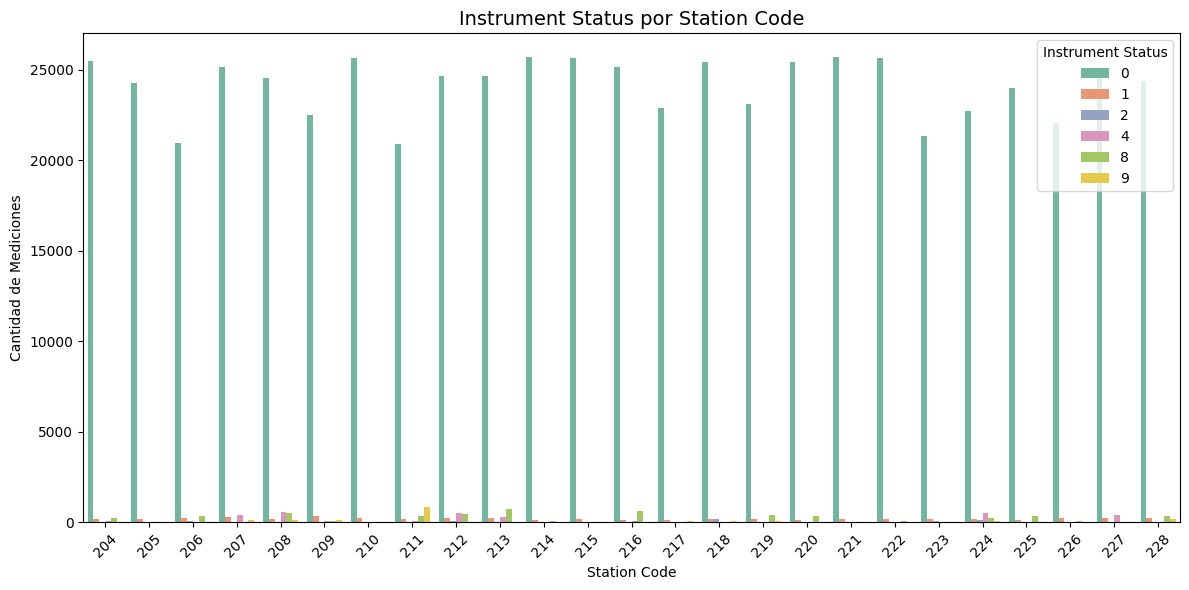

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_SO2,
    x='Station_code',
    hue='Instrument_status',
    palette='Set2'
)
plt.title('Instrument Status por Station Code', fontsize=14)
plt.xlabel('Station Code')
plt.ylabel('Cantidad de Mediciones')
plt.legend(title='Instrument Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> ##### Q2: Which station has the highest percentage of failures?

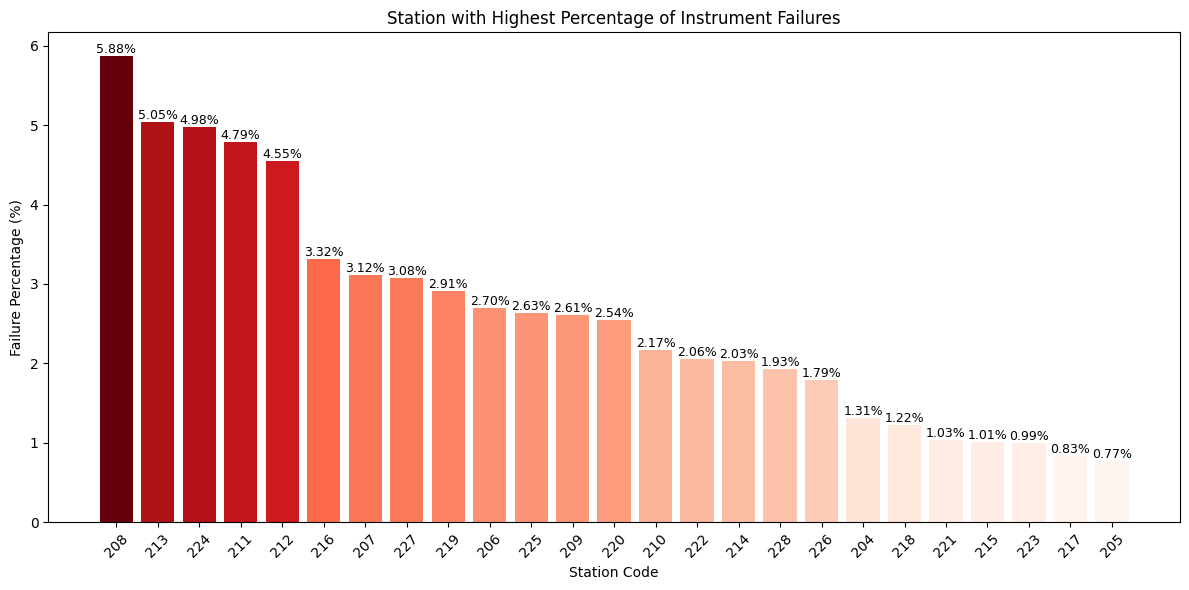

In [27]:
# Dictionary with the name of the contaminant as key and its DataFrame as value
dataframes_contaminants = {
    "SO2": df_SO2,
    "CO": df_CO,
    "O3": df_O3,
    "PM10": df_PM10,
    "PM2.5": df_PM25,
    "NO2": df_NO2
}

# Crear DataFrame con porcentaje de fallos
failure_df = pd.DataFrame([
    {
        "Station_code": station,
        "Failure_percentage": (data["failures"] / data["total"]) * 100
    }
    for station, data in station_status.items()
])

# Ordenar de mayor a menor
failure_df = failure_df.sort_values(by="Failure_percentage", ascending=False).reset_index(drop=True)

# Crear una paleta de colores proporcional al valor
norm = plt.Normalize(failure_df["Failure_percentage"].min(), failure_df["Failure_percentage"].max())
colors = plt.cm.Reds(norm(failure_df["Failure_percentage"]))

# Gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(
    failure_df["Station_code"].astype(str),
    failure_df["Failure_percentage"],
    color=colors
)

# Agregar valores arriba de cada barra
for bar, value in zip(bars, failure_df["Failure_percentage"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() ,
        f"{value:.2f}%",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Títulos y etiquetas
plt.title("Station with Highest Percentage of Instrument Failures")
plt.xlabel("Station Code")
plt.ylabel("Failure Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> ##### Q3: What are the % of Instrument_status per Station_code?

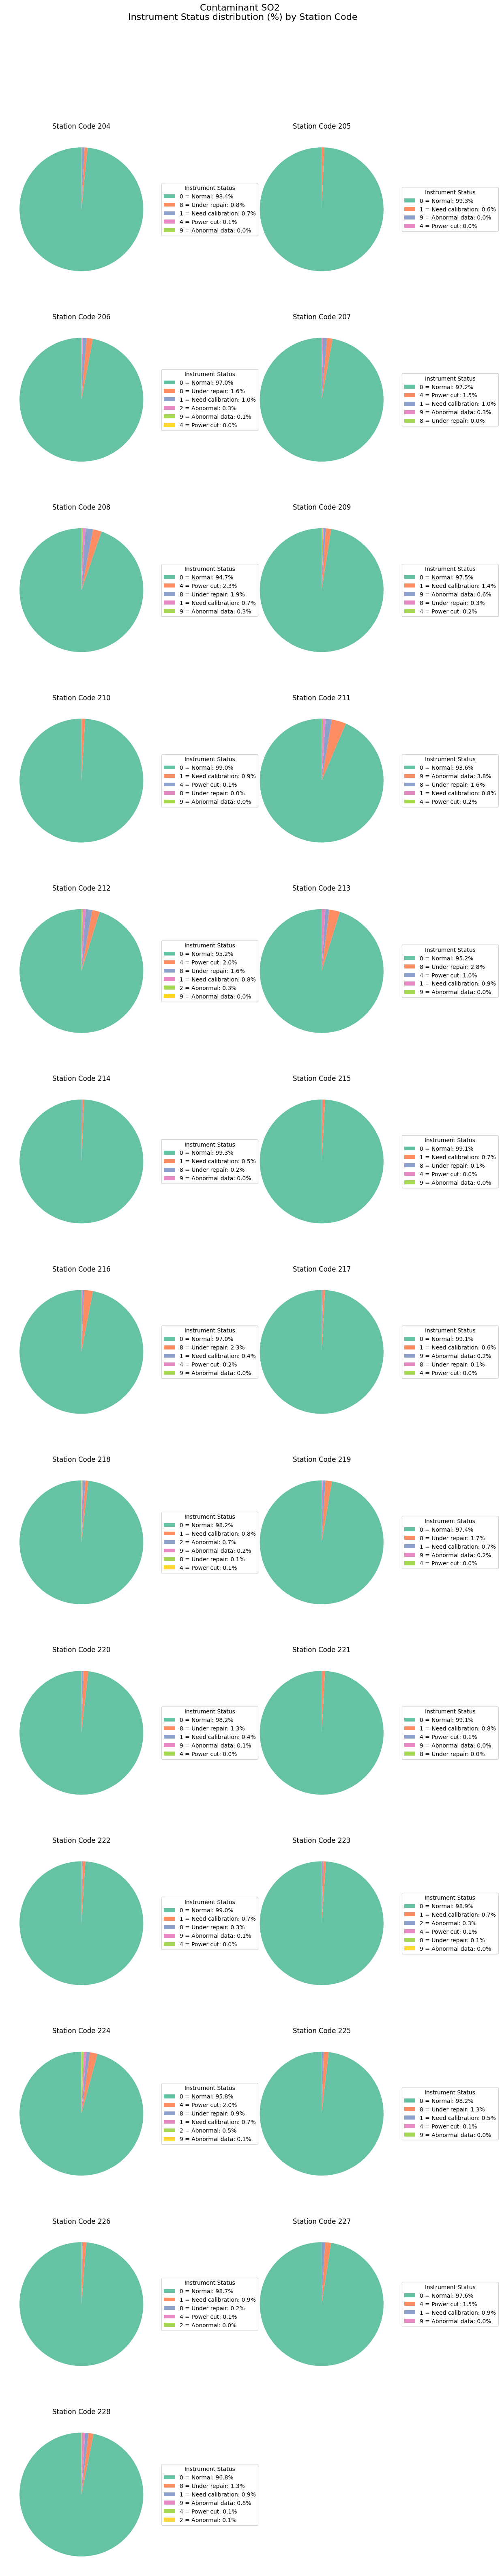

In [25]:
# Mapeo de estados
estado_map = {
    0: "Normal",
    1: "Need calibration",
    2: "Abnormal",
    4: "Power cut",
    8: "Under repair",
    9: "Abnormal data"
}

# Lista de Station_code únicos
station_codes = df_SO2['Station_code'].unique()

# Configurar layout de subplots
cols = 2
rows = (len(station_codes) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*5))
axes = axes.flatten()

colors = plt.cm.Set2.colors  # Paleta de colores

for i, station in enumerate(station_codes):
    ax = axes[i]

    # Filtrar datos por estación
    data_station = df_SO2[df_SO2['Station_code'] == station]

    # Contar y normalizar Instrument_status
    status_counts = data_station['Instrument_status'].value_counts(normalize=True) * 100

    # Preparar etiquetas con código, descripción y %
    labels = [
        f"{int(k)} = {estado_map.get(int(k), 'Unknown')}: {v:.1f}%"
        for k, v in status_counts.items()
    ]

    wedges, _ = ax.pie(status_counts, startangle=90, colors=colors)

    # Agregar leyenda al costado
    ax.legend(wedges, labels, title="Instrument Status", loc="center left", bbox_to_anchor=(1, 0.5))
    ax.set_title(f"Station Code {station}", fontsize=12)

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Contaminant SO2 \n Instrument Status distribution (%) by Station Code", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


> ##### Q4: Which pollutants have the most records of the worst air_quality?

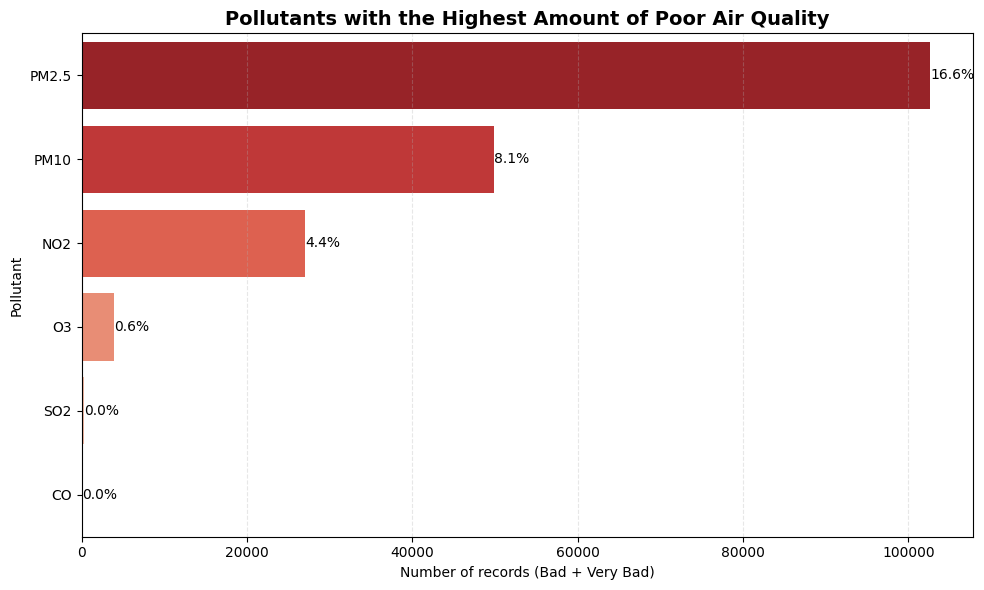

In [26]:
# Dictionary with the name of the contaminant as key and its DataFrame as value
dataframes_contaminants = {
    "SO2": df_SO2,
    "CO": df_CO,
    "O3": df_O3,
    "PM10": df_PM10,
    "PM2.5": df_PM25,
    "NO2": df_NO2
}

# Poor air quality classification
bad_quality = ["Bad", "Very bad"]

# Crear DataFrame resumen
results = []

for name, df in dataframes_contaminants.items():
    total = len(df)
    bad_amount = df[df["air_quality"].isin(bad_quality)].shape[0]
    percentage_bad = (bad_amount / total) * 100
    results.append({
        "Pollutant": name,
        "Quantity Poor Quality": bad_amount,
        "Poor Quality Percentage (%)": percentage_bad
    })

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Sort by descending quantity
df_results = df_results.sort_values(by="Quantity Poor Quality", ascending=False).reset_index(drop=True)

# We created a color palette (red for more pollution)
df_results["Pollutant"] = df_results["Pollutant"].astype(str)
colors = sns.color_palette("Reds_r", len(df_results))
palette_dict = dict(zip(df_results["Pollutant"], colors))

# Bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_results,
    x="Quantity Poor Quality",
    y="Pollutant",
    hue="Pollutant",
    palette=palette_dict,
    dodge=False,
    legend=False
)

# We add percentages next to the bars
for i, row in df_results.iterrows():
    ax.text(
        row["Quantity Poor Quality"] + 5,
        i,
        f"{row['Poor Quality Percentage (%)']:.1f}%",
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

# Title and tags
plt.title("Pollutants with the Highest Amount of Poor Air Quality", fontsize=14, weight='bold')
plt.xlabel("Number of records (Bad + Very Bad)")
plt.ylabel("Pollutant")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


> ##### Q5: Which month has the highest concentration for each pollutant?

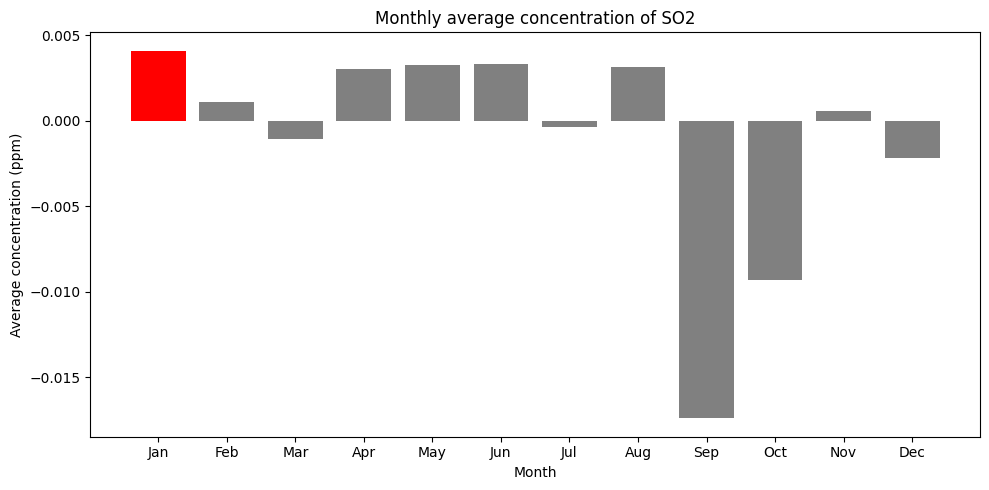

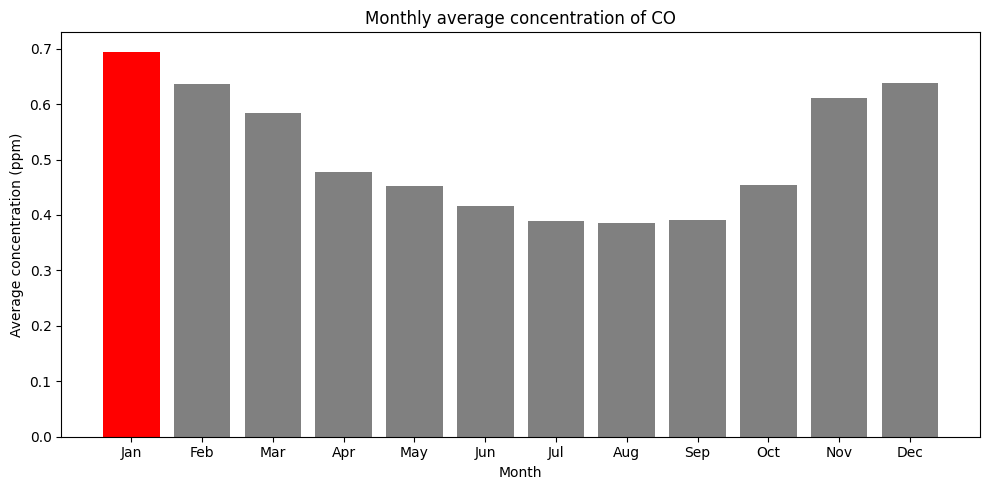

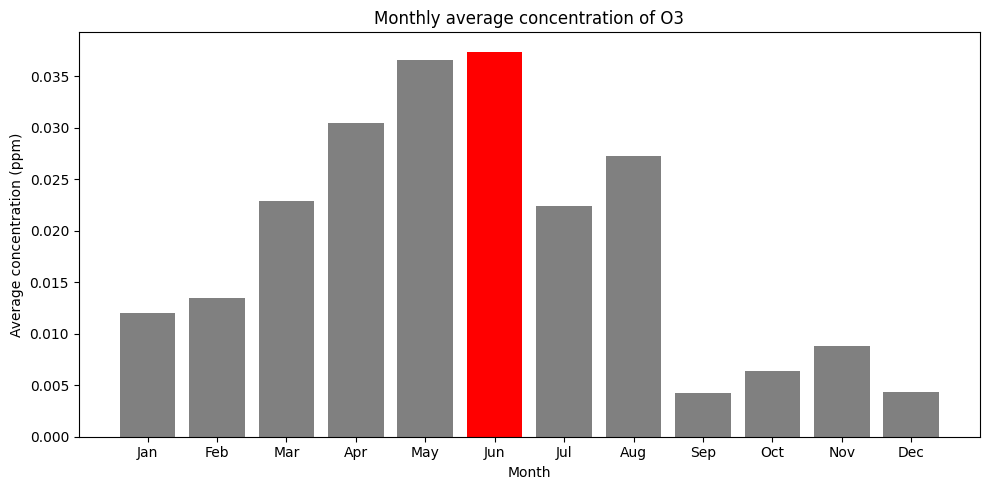

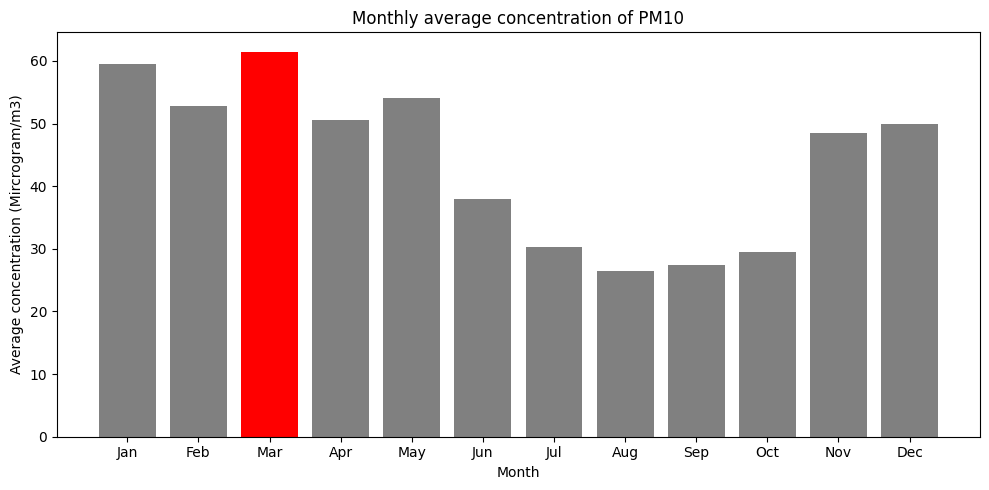

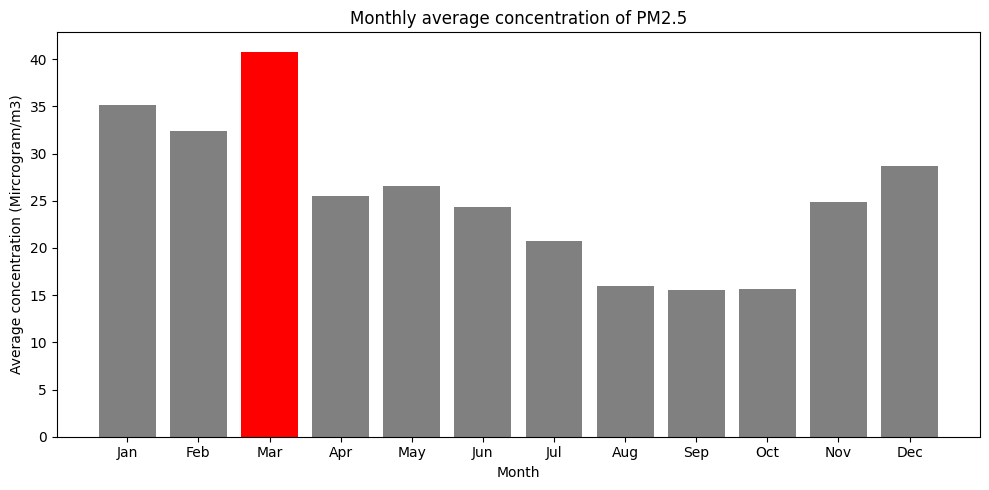

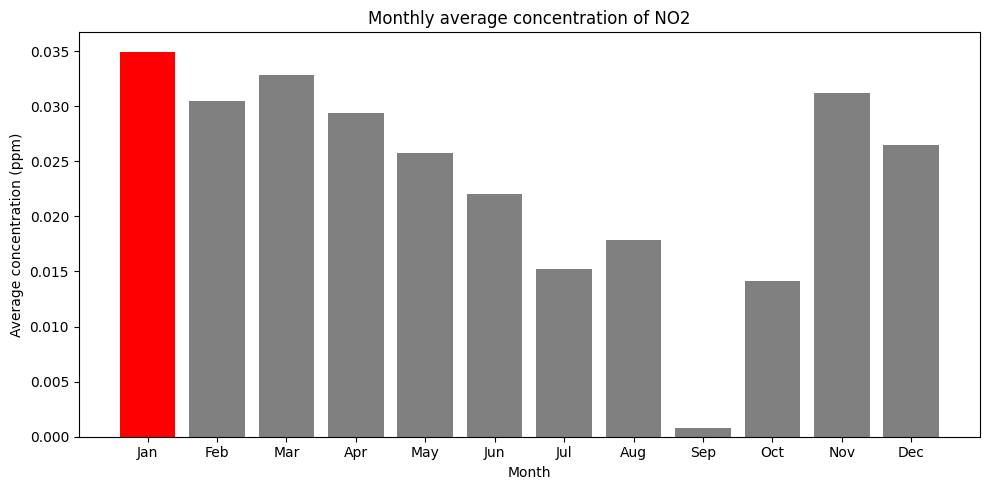

In [27]:
# Dictionary of contaminant DataFrames
dataframes_contaminants = {
    "SO2": df_SO2,
    "CO": df_CO,
    "O3": df_O3,
    "PM10": df_PM10,
    "PM2.5": df_PM25,
    "NO2": df_NO2
}

# Create a dictionary for units from pollutant_data
units_dict = pollutant_data.set_index("Item name")["Unit of measurement"].to_dict()

# Iterate over each contaminant and plot monthly average
for contaminant, df in dataframes_contaminants.items():
    # Ensure datetime format
    df["Measurement_date"] = pd.to_datetime(df["Measurement_date"])

    # Extract month
    df["Month"] = df["Measurement_date"].dt.month

    # Group by month and calculate average
    monthly_avg = df.groupby("Month")[contaminant].mean().reset_index()

    # Color the highest month in red
    colors = ["red" if val == monthly_avg[contaminant].max() else "gray"
              for val in monthly_avg[contaminant]]

    # Get the correct unit
    unit = units_dict.get(contaminant, "")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(monthly_avg["Month"], monthly_avg[contaminant], color=colors)
    plt.title(f"Monthly average concentration of {contaminant}")
    plt.xlabel("Month")
    plt.ylabel(f"Average concentration ({unit})")
    plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.tight_layout()
    plt.show()


> ##### Q6: What time (hour) of day has the highest concentration for each pollutant?

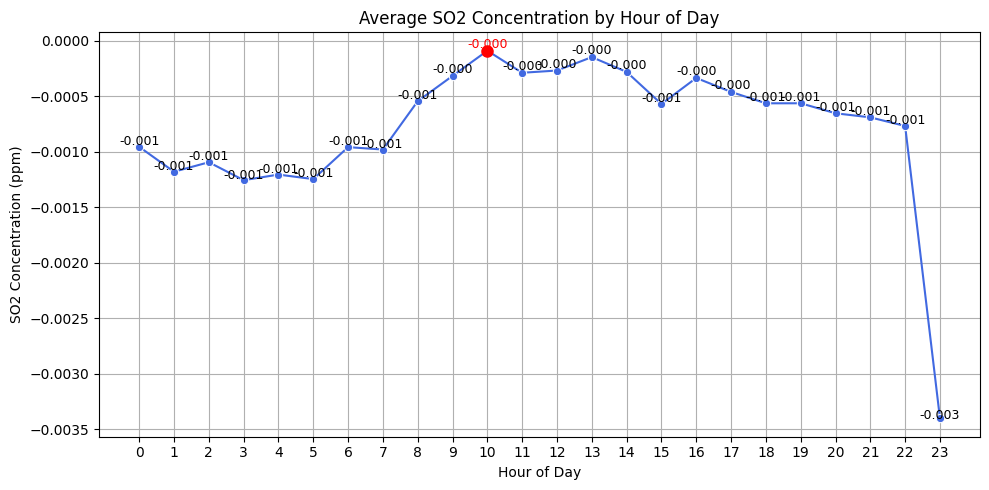

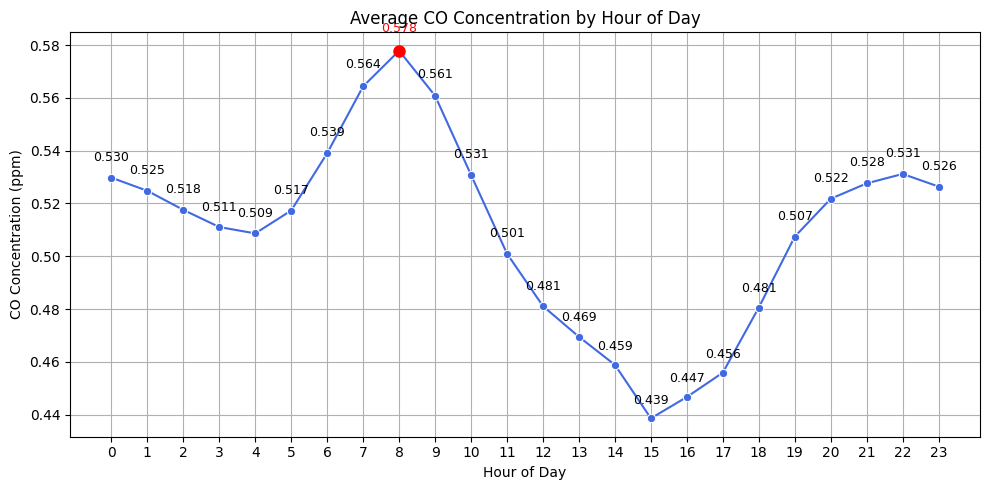

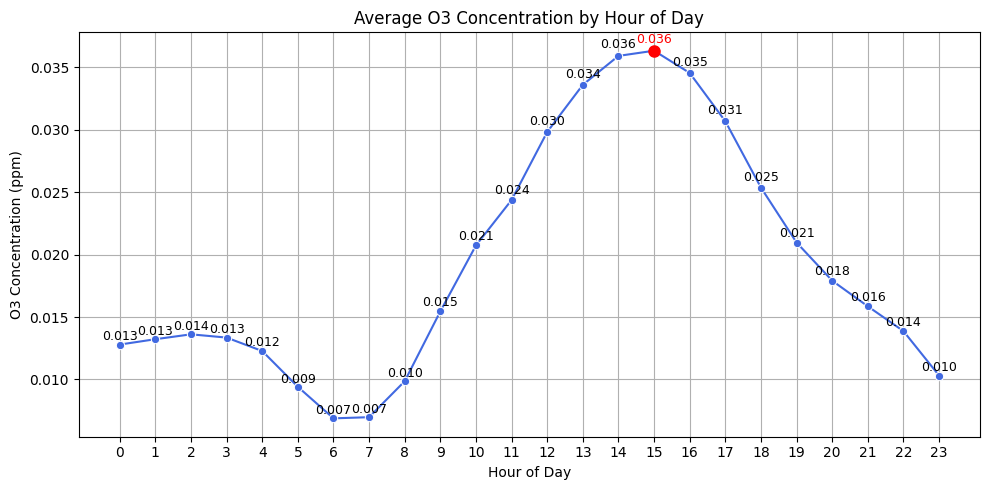

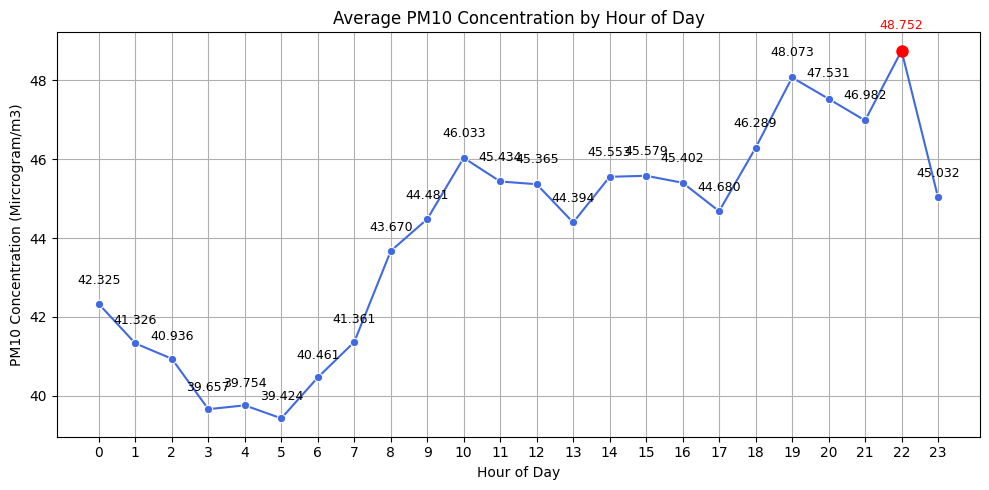

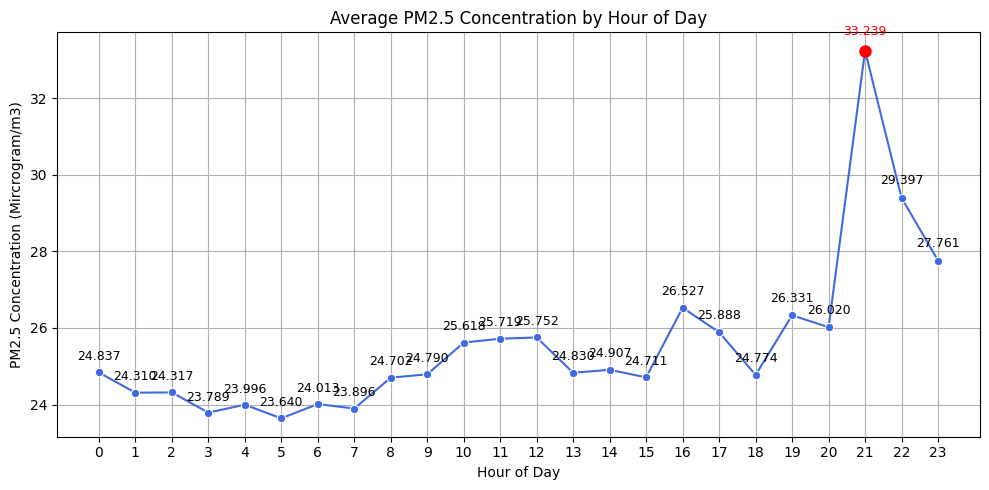

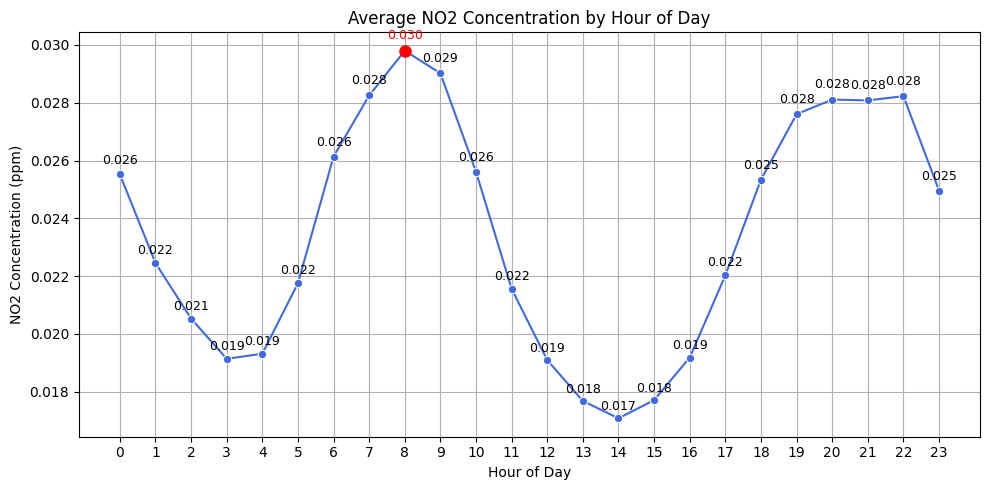

In [28]:
# Dictionary of pollutant DataFrames
dataframes_contaminantes = {
    "SO2": df_SO2,
    "CO": df_CO,
    "O3": df_O3,
    "PM10": df_PM10,
    "PM2.5": df_PM25,
    "NO2": df_NO2
}

# Extract units for each pollutant from pollutant_data
unit_mapping = pollutant_data.set_index("Item name")["Unit of measurement"].to_dict()

# Plotting: Hour vs Average concentration
for contaminant, df in dataframes_contaminantes.items():
    df["Measurement_date"] = pd.to_datetime(df["Measurement_date"])
    df["hour"] = df["Measurement_date"].dt.hour

    hourly_avg = df.groupby("hour")[contaminant].mean().reset_index()
    unit = unit_mapping.get(contaminant, "")

    # Find the row with the highest value
    max_idx = hourly_avg[contaminant].idxmax()
    max_hour = hourly_avg.loc[max_idx, "hour"]
    max_value = hourly_avg.loc[max_idx, contaminant]

    # Plot
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=hourly_avg, x="hour", y=contaminant, marker="o", color="royalblue")

    # Annotate all values
    for i, row in hourly_avg.iterrows():
        hour = row["hour"]
        value = row[contaminant]
        color = "red" if hour == max_hour else "black"
        plt.text(hour, value + (value * 0.01), f"{value:.3f}", ha="center", va="bottom", fontsize=9, color=color)

    # Highlight the max point with a red dot
    plt.plot(max_hour, max_value, 'ro', markersize=8)

    # Labels and style
    plt.title(f"Average {contaminant} Concentration by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel(f"{contaminant} Concentration ({unit})")
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


> ##### Q7: Which season of the year has the highest concentration of each pollutant?

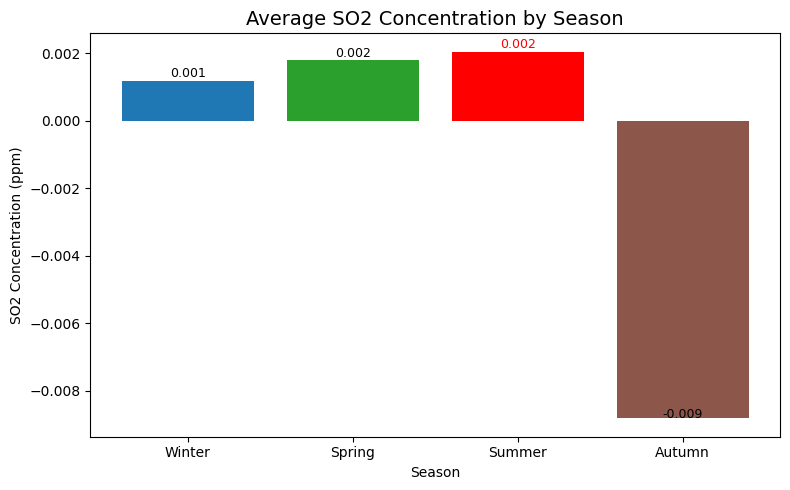

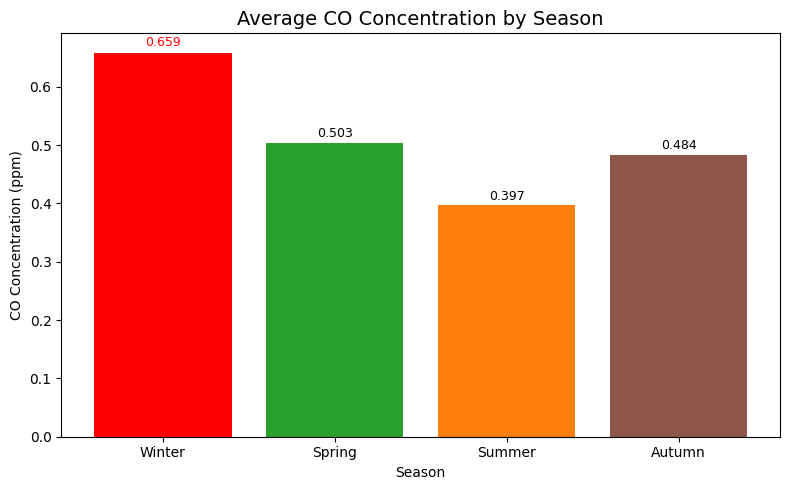

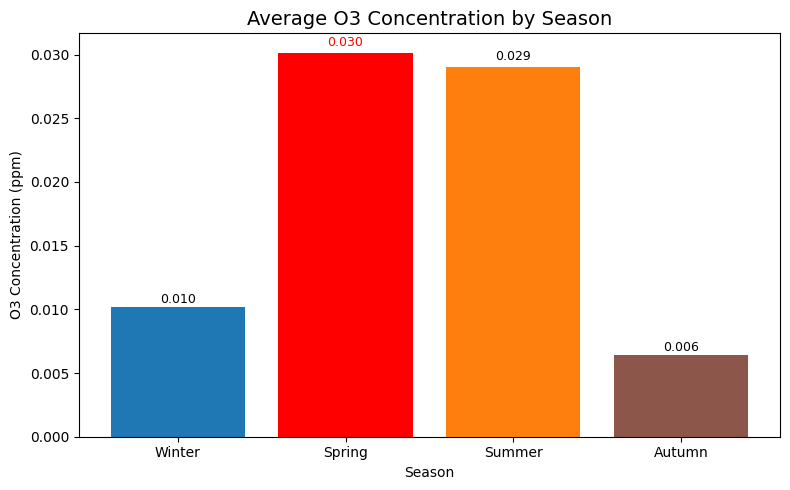

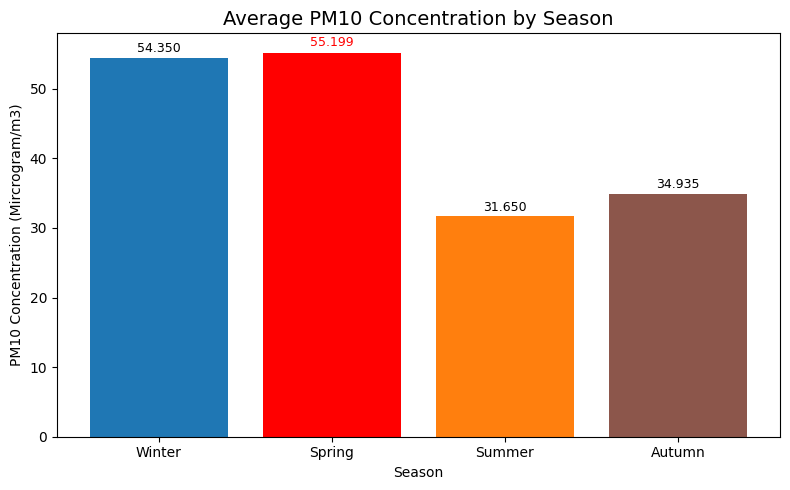

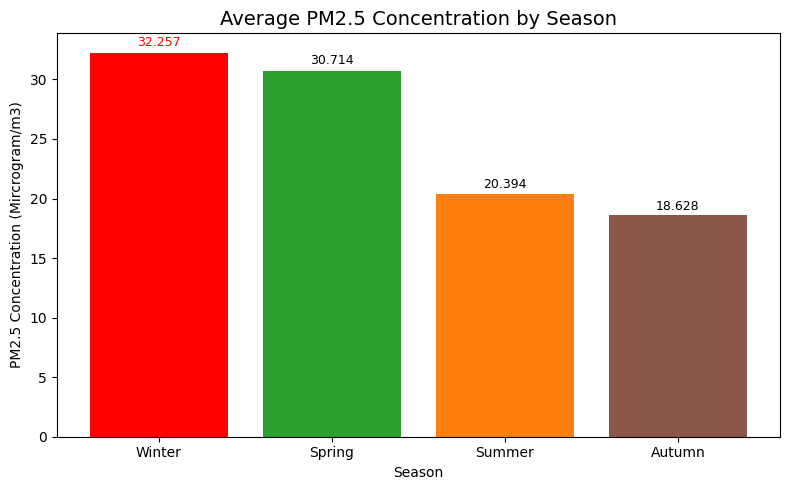

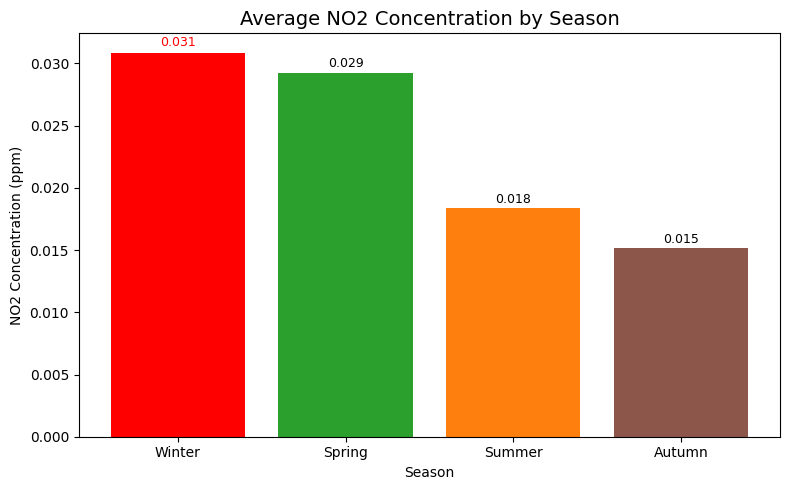

In [29]:
# Season mapping by month
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

# Dictionary of pollutant DataFrames
dataframes_contaminantes = {
    "SO2": df_SO2,
    "CO": df_CO,
    "O3": df_O3,
    "PM10": df_PM10,
    "PM2.5": df_PM25,
    "NO2": df_NO2
}

# Get unit mapping from pollutant_data
unit_mapping = pollutant_data.set_index("Item name")["Unit of measurement"].to_dict()

# Custom colors for seasons
season_colors = {
    "Winter": "#1f77b4",
    "Spring": "#2ca02c",
    "Summer": "#ff7f0e",
    "Autumn": "#8c564b"
}

# Plot average concentration by season
for contaminant, df in dataframes_contaminantes.items():
    df["Measurement_date"] = pd.to_datetime(df["Measurement_date"])
    df["month"] = df["Measurement_date"].dt.month
    df["season"] = df["month"].apply(assign_season)

    # Average by season
    seasonal_avg = df.groupby("season")[contaminant].mean().reindex(["Winter", "Spring", "Summer", "Autumn"]).reset_index()

    # Identify max
    max_value = seasonal_avg[contaminant].max()
    max_season = seasonal_avg.loc[seasonal_avg[contaminant].idxmax(), "season"]
    unit = unit_mapping.get(contaminant, "")

    # Plot with matplotlib to set custom bar colors
    plt.figure(figsize=(8, 5))
    ax = plt.gca()
    bar_colors = ["red" if season == max_season else season_colors[season] for season in seasonal_avg["season"]]
    bars = ax.bar(seasonal_avg["season"], seasonal_avg[contaminant], color=bar_colors)

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        color = "red" if height == max_value else "black"
        ax.text(bar.get_x() + bar.get_width() / 2, height + height*0.01,
                f"{height:.3f}", ha="center", va="bottom", fontsize=9, color=color)

    # Labels and title
    plt.title(f"Average {contaminant} Concentration by Season", fontsize=14)
    plt.ylabel(f"{contaminant} Concentration ({unit})")
    plt.xlabel("Season")
    plt.tight_layout()
    plt.show()


> ##### Q8: Which season of the year has the highest concentration of each pollutant by hour?

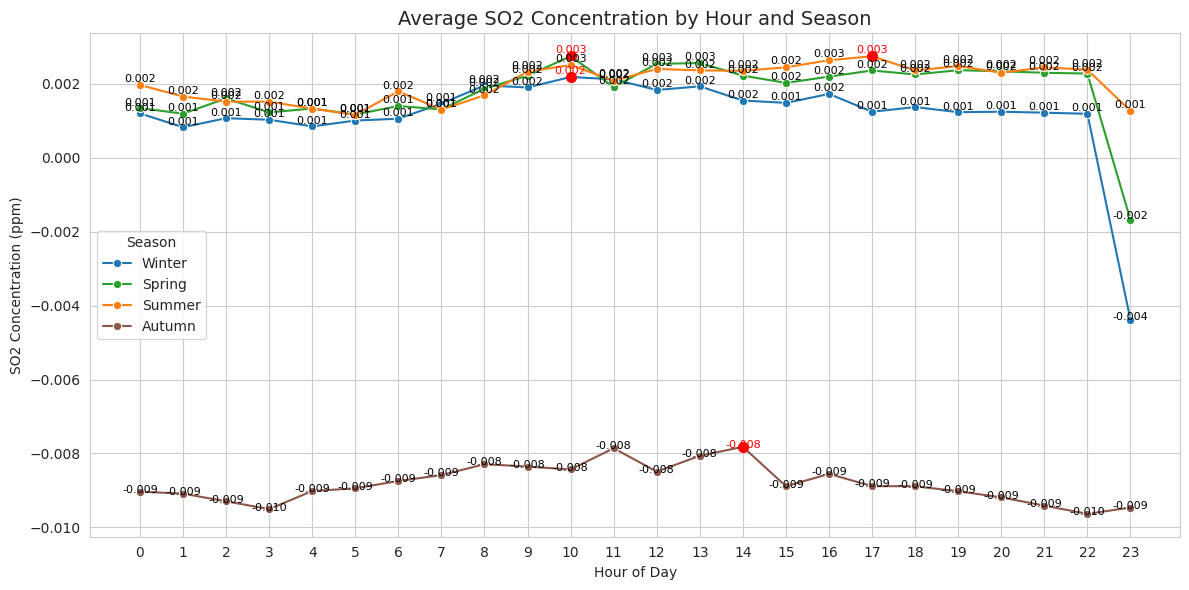

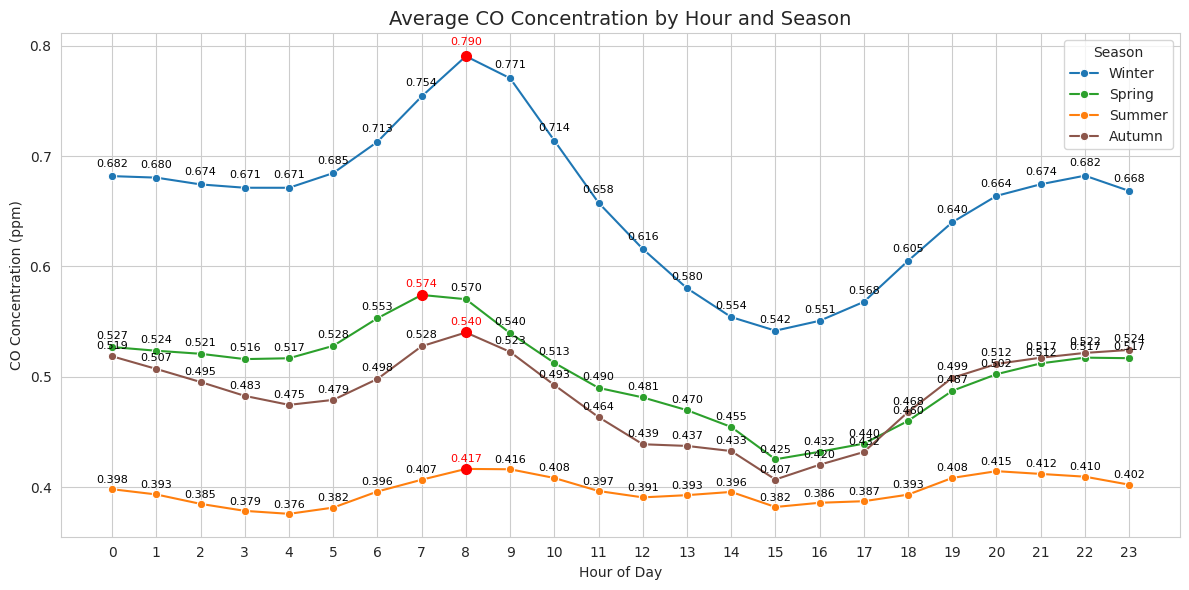

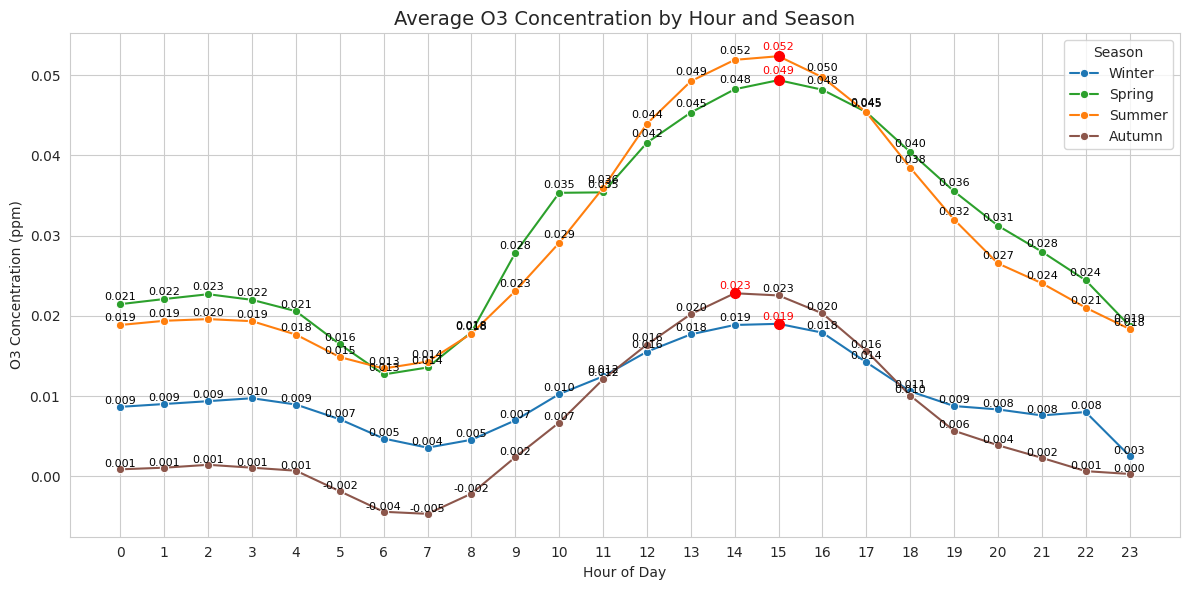

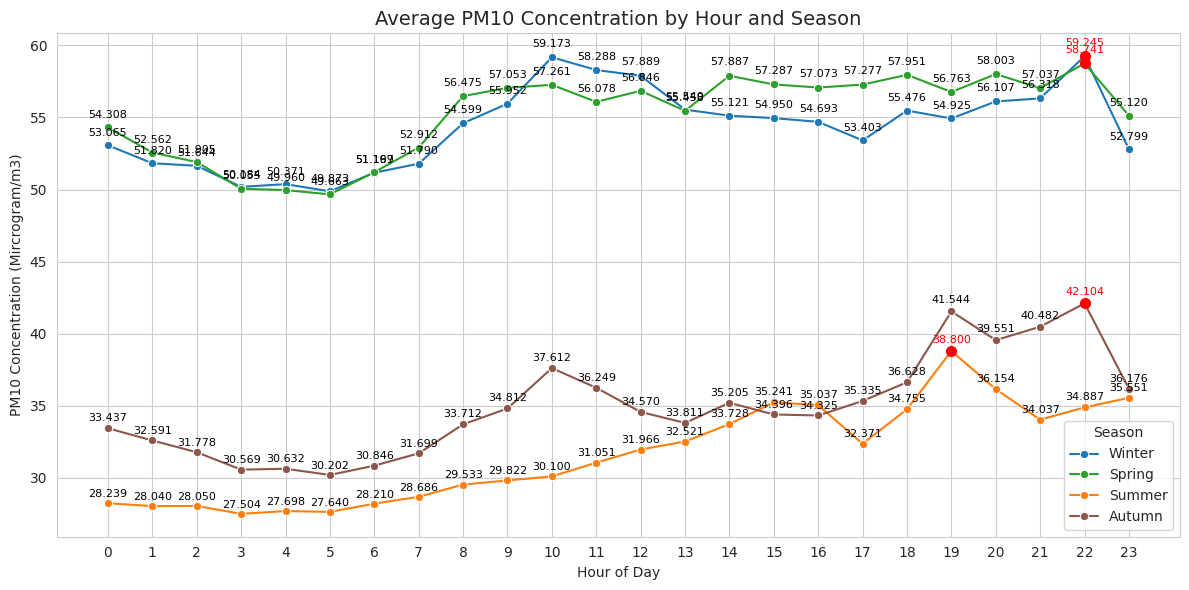

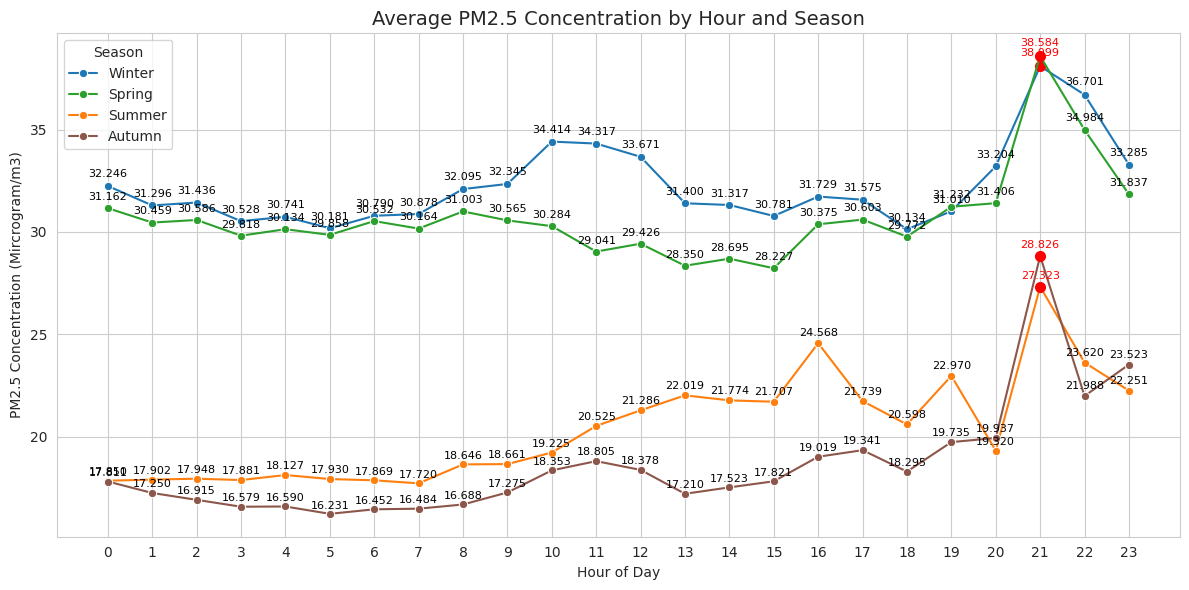

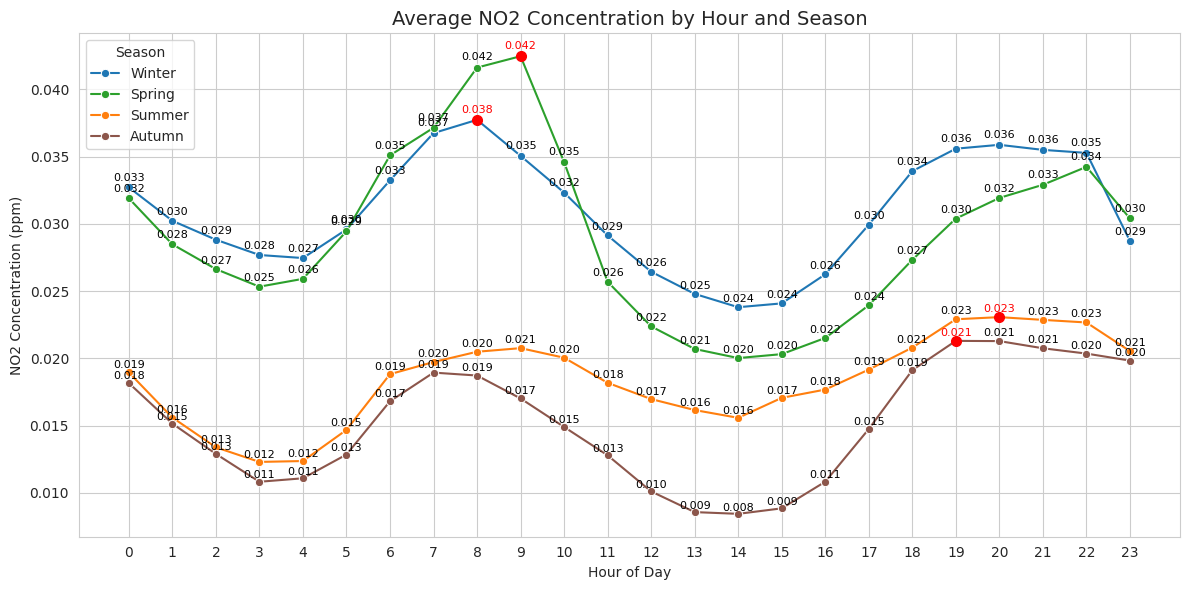

In [30]:
# Season mapping by month
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

# Dictionary of pollutant DataFrames
dataframes_contaminantes = {
    "SO2": df_SO2,
    "CO": df_CO,
    "O3": df_O3,
    "PM10": df_PM10,
    "PM2.5": df_PM25,
    "NO2": df_NO2
}

# Get unit mapping
unit_mapping = pollutant_data.set_index("Item name")["Unit of measurement"].to_dict()

# Custom color palette for seasons
season_colors = {
    "Winter": "#1f77b4",
    "Spring": "#2ca02c",
    "Summer": "#ff7f0e",
    "Autumn": "#8c564b"
}

# Plot hourly concentration by season
for contaminant, df in dataframes_contaminantes.items():
    df["Measurement_date"] = pd.to_datetime(df["Measurement_date"])
    df["month"] = df["Measurement_date"].dt.month
    df["hour"] = df["Measurement_date"].dt.hour
    df["season"] = df["month"].apply(assign_season)

    hourly_by_season = df.groupby(["season", "hour"])[contaminant].mean().reset_index()
    unit = unit_mapping.get(contaminant, "")

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # Plot one line per season
    for season in ["Winter", "Spring", "Summer", "Autumn"]:
        subset = hourly_by_season[hourly_by_season["season"] == season]

        # Find max value for season
        max_idx = subset[contaminant].idxmax()
        max_hour = subset.loc[max_idx, "hour"]
        max_value = subset.loc[max_idx, contaminant]

        # Plot line
        sns.lineplot(data=subset, x="hour", y=contaminant, marker="o",
                     label=season, color=season_colors[season])

        # Annotate values
        for _, row in subset.iterrows():
            hour = row["hour"]
            value = row[contaminant]
            color = "red" if hour == max_hour else "black"
            plt.text(hour, value + (value * 0.01), f"{value:.3f}",
                     ha="center", va="bottom", fontsize=8, color=color)

        # Highlight max point
        plt.plot(max_hour, max_value, 'ro', markersize=7)

    # Titles and labels
    plt.title(f"Average {contaminant} Concentration by Hour and Season", fontsize=14)
    plt.xlabel("Hour of Day")
    plt.ylabel(f"{contaminant} Concentration ({unit})")
    plt.xticks(range(0, 24))
    plt.legend(title="Season")
    plt.tight_layout()
    plt.show()


***



IMPORTANT: We are going to answer the following questions considering only measurements with the value tagged as "Normal" (code 0):

> ##### Q9: Average daily SO2 concentration across all districts over the entire period. Give the station average.

In [31]:
# We create a copy from the original dataset
df_SO2_copy = df_SO2.copy()

# We consider only measurements with `Instrument status` = 0:
df_SO2_copy = df_SO2_copy[df_SO2_copy['Instrument_status']==0]
df_SO2_copy

Measurement_date  Station_code  Item_code  Average_value  \
0      2021-01-01 00:00:00           204          0          0.004   
1      2021-01-01 01:00:00           204          0          0.004   
2      2021-01-01 02:00:00           204          0          0.004   
3      2021-01-01 03:00:00           204          0          0.004   
4      2021-01-01 04:00:00           204          0          0.003   
...                    ...           ...        ...            ...   
617272 2023-11-30 19:00:00           228          0          0.005   
617273 2023-11-30 20:00:00           228          0          0.005   
617274 2023-11-30 21:00:00           228          0          0.005   
617275 2023-11-30 22:00:00           228          0          0.004   
617276 2023-11-30 23:00:00           228          0          0.004   

        Instrument_status   Latitude   Longitude    SO2 air_quality  Month  \
0                       0  37.572016  127.005008  0.004        Good      1   
1                       0  37.572016  127.005008  0.004        Good      1   
2                       0  37.572016  127.005008  0.004        Good      1   
3                       0  37.572016  127.005008  0.004        Good      1   
4                       0  37.572016  127.005008  0.003        Good      1   
...                   ...        ...         ...    ...         ...    ...   
617272                  0  37.544962  127.136792  0.005        Good     11   
617273                  0  37.544962  127.136792  0.005        Good     11   
617274                  0  37.544962  127.136792  0.005        Good     11   
617275                  0  37.544962  127.136792  0.004        Good     11   
617276                  0  37.544962  127.136792  0.004        Good     11   

        hour  month  season  
0          0      1  Winter  
1          1      1  Winter  
2          2      1  Winter  
3          3      1  Winter  
4          4      1  Winter  
...      ...    ...     ...  
617272    19     11  Autumn  
617273    20     11  Autumn  
617274    21     11  Autumn  
617275    22     11  Autumn  
617276    23     11  Autumn  

[602422 rows x 13 columns]

In [32]:
# Ensure 'Measurement_date' is datetime
df_SO2_copy['Measurement_date'] = pd.to_datetime(df_SO2_copy['Measurement_date'])

# Extract only the date part (no time)
df_SO2_copy['date'] = df_SO2_copy['Measurement_date'].dt.date
df_SO2_copy

Measurement_date  Station_code  Item_code  Average_value  \
0      2021-01-01 00:00:00           204          0          0.004   
1      2021-01-01 01:00:00           204          0          0.004   
2      2021-01-01 02:00:00           204          0          0.004   
3      2021-01-01 03:00:00           204          0          0.004   
4      2021-01-01 04:00:00           204          0          0.003   
...                    ...           ...        ...            ...   
617272 2023-11-30 19:00:00           228          0          0.005   
617273 2023-11-30 20:00:00           228          0          0.005   
617274 2023-11-30 21:00:00           228          0          0.005   
617275 2023-11-30 22:00:00           228          0          0.004   
617276 2023-11-30 23:00:00           228          0          0.004   

        Instrument_status   Latitude   Longitude    SO2 air_quality  Month  \
0                       0  37.572016  127.005008  0.004        Good      1   
1                       0  37.572016  127.005008  0.004        Good      1   
2                       0  37.572016  127.005008  0.004        Good      1   
3                       0  37.572016  127.005008  0.004        Good      1   
4                       0  37.572016  127.005008  0.003        Good      1   
...                   ...        ...         ...    ...         ...    ...   
617272                  0  37.544962  127.136792  0.005        Good     11   
617273                  0  37.544962  127.136792  0.005        Good     11   
617274                  0  37.544962  127.136792  0.005        Good     11   
617275                  0  37.544962  127.136792  0.004        Good     11   
617276                  0  37.544962  127.136792  0.004        Good     11   

        hour  month  season        date  
0          0      1  Winter  2021-01-01  
1          1      1  Winter  2021-01-01  
2          2      1  Winter  2021-01-01  
3          3      1  Winter  2021-01-01  
4          4      1  Winter  2021-01-01  
...      ...    ...     ...         ...  
617272    19     11  Autumn  2023-11-30  
617273    20     11  Autumn  2023-11-30  
617274    21     11  Autumn  2023-11-30  
617275    22     11  Autumn  2023-11-30  
617276    23     11  Autumn  2023-11-30  

[602422 rows x 14 columns]

In [33]:
# Step 1: Calculate the daily average per station
daily_avg_per_station = df_SO2_copy.groupby(['Station_code', 'date'])['SO2'].mean().reset_index(name='daily_avg')
daily_avg_per_station

Station_code        date  daily_avg
0               204  2021-01-01   0.004208
1               204  2021-01-02   0.004792
2               204  2021-01-03   0.004833
3               204  2021-01-04   0.005375
4               204  2021-01-05   0.004333
...             ...         ...        ...
25509           228  2023-11-26   0.003083
25510           228  2023-11-27   0.003250
25511           228  2023-11-28   0.003042
25512           228  2023-11-29   0.003500
25513           228  2023-11-30   0.003792

[25514 rows x 3 columns]

In [34]:
# Step 2: Calculate the average of daily averages for each station
station_daily_avg = daily_avg_per_station.groupby('Station_code')['daily_avg'].mean().round(5).reset_index()
station_daily_avg

Station_code  daily_avg
0            204    0.00426
1            205    0.00358
2            206    0.00365
3            207    0.00428
4            208    0.00434
5            209    0.00393
6            210    0.00435
7            211    0.00449
8            212    0.00544
9            213    0.00585
10           214    0.00363
11           215    0.00316
12           216    0.00433
13           217    0.00459
14           218    0.00425
15           219    0.00512
16           220    0.00522
17           221    0.00393
18           222    0.00446
19           223    0.00374
20           224    0.00482
21           225    0.00422
22           226    0.00529
23           227    0.00399
24           228    0.00409

In [35]:
# Step 3: Compute the overall average of these daily values
overall_avg = station_daily_avg['daily_avg'].mean()

# Step 4: units:
units_SO2 = pollutant_data[pollutant_data['Item name'] == 'SO2']['Unit of measurement'].values[0]

# Step 5: Print the result with 5 decimal places
print("Average daily SO2 concentration across all districts/Stations: {:.5f} {}".format(overall_avg, units_SO2))

Average daily SO2 concentration across all districts/Stations: 0.00436 ppm


> ##### Q10: Analysis of how pollution levels vary by season. What is the average levels of CO per season at the station 209?

In [36]:
# We create a copy from the original dataset
df_CO_copy = df_CO.copy()

In [37]:
# Step 1: Filter only valid data (Instrument_status = 0) and station 209:
df_CO_copy = df_CO_copy[(df_CO_copy['Instrument_status']==0) & (df_CO_copy['Station_code']==209)]
df_CO_copy

Measurement_date  Station_code  Item_code  Average_value  \
123737 2021-01-01 00:00:00           209          4            1.5   
123738 2021-01-01 01:00:00           209          4            1.5   
123739 2021-01-01 02:00:00           209          4            1.5   
123740 2021-01-01 03:00:00           209          4            1.4   
123741 2021-01-01 04:00:00           209          4            1.3   
...                    ...           ...        ...            ...   
146789 2023-08-31 19:00:00           209          4            0.4   
146790 2023-08-31 20:00:00           209          4            0.4   
146791 2023-08-31 21:00:00           209          4            0.4   
146792 2023-08-31 22:00:00           209          4            0.4   
146793 2023-08-31 23:00:00           209          4            0.4   

        Instrument_status  Latitude   Longitude   CO air_quality  Month  hour  \
123737                  0  37.55558  126.905597  1.5        Good      1     0   
123738                  0  37.55558  126.905597  1.5        Good      1     1   
123739                  0  37.55558  126.905597  1.5        Good      1     2   
123740                  0  37.55558  126.905597  1.4        Good      1     3   
123741                  0  37.55558  126.905597  1.3        Good      1     4   
...                   ...       ...         ...  ...         ...    ...   ...   
146789                  0  37.55558  126.905597  0.4        Good      8    19   
146790                  0  37.55558  126.905597  0.4        Good      8    20   
146791                  0  37.55558  126.905597  0.4        Good      8    21   
146792                  0  37.55558  126.905597  0.4        Good      8    22   
146793                  0  37.55558  126.905597  0.4        Good      8    23   

        month  season  
123737      1  Winter  
123738      1  Winter  
123739      1  Winter  
123740      1  Winter  
123741      1  Winter  
...       ...     ...  
146789      8  Summer  
146790      8  Summer  
146791      8  Summer  
146792      8  Summer  
146793      8  Summer  

[22630 rows x 13 columns]

In [38]:
# Step 2: Convert Measurement_date to datetime and extract month:
df_CO_copy['Measurement_date'] = pd.to_datetime(df_CO_copy['Measurement_date'])
df_CO_copy['month'] = df_CO_copy['Measurement_date'].dt.month
df_CO_copy

Measurement_date  Station_code  Item_code  Average_value  \
123737 2021-01-01 00:00:00           209          4            1.5   
123738 2021-01-01 01:00:00           209          4            1.5   
123739 2021-01-01 02:00:00           209          4            1.5   
123740 2021-01-01 03:00:00           209          4            1.4   
123741 2021-01-01 04:00:00           209          4            1.3   
...                    ...           ...        ...            ...   
146789 2023-08-31 19:00:00           209          4            0.4   
146790 2023-08-31 20:00:00           209          4            0.4   
146791 2023-08-31 21:00:00           209          4            0.4   
146792 2023-08-31 22:00:00           209          4            0.4   
146793 2023-08-31 23:00:00           209          4            0.4   

        Instrument_status  Latitude   Longitude   CO air_quality  Month  hour  \
123737                  0  37.55558  126.905597  1.5        Good      1     0   
123738                  0  37.55558  126.905597  1.5        Good      1     1   
123739                  0  37.55558  126.905597  1.5        Good      1     2   
123740                  0  37.55558  126.905597  1.4        Good      1     3   
123741                  0  37.55558  126.905597  1.3        Good      1     4   
...                   ...       ...         ...  ...         ...    ...   ...   
146789                  0  37.55558  126.905597  0.4        Good      8    19   
146790                  0  37.55558  126.905597  0.4        Good      8    20   
146791                  0  37.55558  126.905597  0.4        Good      8    21   
146792                  0  37.55558  126.905597  0.4        Good      8    22   
146793                  0  37.55558  126.905597  0.4        Good      8    23   

        month  season  
123737      1  Winter  
123738      1  Winter  
123739      1  Winter  
123740      1  Winter  
123741      1  Winter  
...       ...     ...  
146789      8  Summer  
146790      8  Summer  
146791      8  Summer  
146792      8  Summer  
146793      8  Summer  

[22630 rows x 13 columns]

In [39]:
# Step 3: Create a function to Map months to seasons:
def map_season(month):
    if month in [12, 1, 2]: # Winter: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]: # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]: # Summer: June, July, August
        return 'Summer'
    else:
        return 'Autumn' # Autumn: September, October, November

df_CO_copy['season'] = df_CO_copy['month'].apply(map_season)
df_CO_copy


Measurement_date  Station_code  Item_code  Average_value  \
123737 2021-01-01 00:00:00           209          4            1.5   
123738 2021-01-01 01:00:00           209          4            1.5   
123739 2021-01-01 02:00:00           209          4            1.5   
123740 2021-01-01 03:00:00           209          4            1.4   
123741 2021-01-01 04:00:00           209          4            1.3   
...                    ...           ...        ...            ...   
146789 2023-08-31 19:00:00           209          4            0.4   
146790 2023-08-31 20:00:00           209          4            0.4   
146791 2023-08-31 21:00:00           209          4            0.4   
146792 2023-08-31 22:00:00           209          4            0.4   
146793 2023-08-31 23:00:00           209          4            0.4   

        Instrument_status  Latitude   Longitude   CO air_quality  Month  hour  \
123737                  0  37.55558  126.905597  1.5        Good      1     0   
123738                  0  37.55558  126.905597  1.5        Good      1     1   
123739                  0  37.55558  126.905597  1.5        Good      1     2   
123740                  0  37.55558  126.905597  1.4        Good      1     3   
123741                  0  37.55558  126.905597  1.3        Good      1     4   
...                   ...       ...         ...  ...         ...    ...   ...   
146789                  0  37.55558  126.905597  0.4        Good      8    19   
146790                  0  37.55558  126.905597  0.4        Good      8    20   
146791                  0  37.55558  126.905597  0.4        Good      8    21   
146792                  0  37.55558  126.905597  0.4        Good      8    22   
146793                  0  37.55558  126.905597  0.4        Good      8    23   

        month  season  
123737      1  Winter  
123738      1  Winter  
123739      1  Winter  
123740      1  Winter  
123741      1  Winter  
...       ...     ...  
146789      8  Summer  
146790      8  Summer  
146791      8  Summer  
146792      8  Summer  
146793      8  Summer  

[22630 rows x 13 columns]

In [40]:
# Step 4: Group by season and compute mean CO level
seasonal_avg = df_CO_copy.groupby('season')['CO'].mean().round(5)
seasonal_avg

season
Autumn    0.49979
Spring    0.47805
Summer    0.42521
Winter    0.68040
Name: CO, dtype: float64

In [41]:
# Step 5: Get units from pollutant_data
units_CO = pollutant_data[pollutant_data['Item name'] == 'CO']['Unit of measurement'].values[0]

# Step 6: Print results
print("Average levels of CO per season at the station 209")
for season, value in seasonal_avg.items():
    print(f"{season}: {value:.5f} {units_CO}")


Average levels of CO per season at the station 209
Autumn: 0.49979 ppm
Spring: 0.47805 ppm
Summer: 0.42521 ppm
Winter: 0.68040 ppm


> ##### Q11: Which hour presents the highest variability (Standard Deviation) for the pollutant O3? Treat all stations as equal.


Why ***Standard Desviation*** is so important?:

* Identifies unstable times of day in terms of air quality.
* It helps design more effective monitoring and prevention policies (for example, identifying the times of day when there is the greatest uncertainty or need for attention).
* It is useful for predictive models, as a high deviation may suggest greater difficulty in accurately predicting that value.

In [42]:
# We create a copy from the original dataframe
df_O3_copy = df_O3.copy()

In [43]:
# Step 1: Keep only valid measurements (Instrument_status = 0)
df_O3_copy = df_O3_copy[df_O3_copy['Instrument_status'] == 0]
df_O3_copy

Measurement_date  Station_code  Item_code  Average_value  \
0      2021-01-01 00:00:00           204          5          0.002   
1      2021-01-01 01:00:00           204          5          0.002   
2      2021-01-01 02:00:00           204          5          0.002   
3      2021-01-01 03:00:00           204          5          0.002   
4      2021-01-01 04:00:00           204          5          0.002   
...                    ...           ...        ...            ...   
617272 2023-11-30 19:00:00           228          5          0.002   
617273 2023-11-30 20:00:00           228          5          0.003   
617274 2023-11-30 21:00:00           228          5          0.003   
617275 2023-11-30 22:00:00           228          5          0.005   
617276 2023-11-30 23:00:00           228          5          0.008   

        Instrument_status   Latitude   Longitude     O3 air_quality  Month  \
0                       0  37.572016  127.005008  0.002        Good      1   
1                       0  37.572016  127.005008  0.002        Good      1   
2                       0  37.572016  127.005008  0.002        Good      1   
3                       0  37.572016  127.005008  0.002        Good      1   
4                       0  37.572016  127.005008  0.002        Good      1   
...                   ...        ...         ...    ...         ...    ...   
617272                  0  37.544962  127.136792  0.002        Good     11   
617273                  0  37.544962  127.136792  0.003        Good     11   
617274                  0  37.544962  127.136792  0.003        Good     11   
617275                  0  37.544962  127.136792  0.005        Good     11   
617276                  0  37.544962  127.136792  0.008        Good     11   

        hour  month  season  
0          0      1  Winter  
1          1      1  Winter  
2          2      1  Winter  
3          3      1  Winter  
4          4      1  Winter  
...      ...    ...     ...  
617272    19     11  Autumn  
617273    20     11  Autumn  
617274    21     11  Autumn  
617275    22     11  Autumn  
617276    23     11  Autumn  

[602793 rows x 13 columns]

In [44]:
# Step 2: Convert the date column to datetime and extract the hour
df_O3_copy['Measurement_date'] = pd.to_datetime(df_O3_copy['Measurement_date'])
df_O3_copy['hour'] = df_O3_copy['Measurement_date'].dt.hour
df_O3_copy

Measurement_date  Station_code  Item_code  Average_value  \
0      2021-01-01 00:00:00           204          5          0.002   
1      2021-01-01 01:00:00           204          5          0.002   
2      2021-01-01 02:00:00           204          5          0.002   
3      2021-01-01 03:00:00           204          5          0.002   
4      2021-01-01 04:00:00           204          5          0.002   
...                    ...           ...        ...            ...   
617272 2023-11-30 19:00:00           228          5          0.002   
617273 2023-11-30 20:00:00           228          5          0.003   
617274 2023-11-30 21:00:00           228          5          0.003   
617275 2023-11-30 22:00:00           228          5          0.005   
617276 2023-11-30 23:00:00           228          5          0.008   

        Instrument_status   Latitude   Longitude     O3 air_quality  Month  \
0                       0  37.572016  127.005008  0.002        Good      1   
1                       0  37.572016  127.005008  0.002        Good      1   
2                       0  37.572016  127.005008  0.002        Good      1   
3                       0  37.572016  127.005008  0.002        Good      1   
4                       0  37.572016  127.005008  0.002        Good      1   
...                   ...        ...         ...    ...         ...    ...   
617272                  0  37.544962  127.136792  0.002        Good     11   
617273                  0  37.544962  127.136792  0.003        Good     11   
617274                  0  37.544962  127.136792  0.003        Good     11   
617275                  0  37.544962  127.136792  0.005        Good     11   
617276                  0  37.544962  127.136792  0.008        Good     11   

        hour  month  season  
0          0      1  Winter  
1          1      1  Winter  
2          2      1  Winter  
3          3      1  Winter  
4          4      1  Winter  
...      ...    ...     ...  
617272    19     11  Autumn  
617273    20     11  Autumn  
617274    21     11  Autumn  
617275    22     11  Autumn  
617276    23     11  Autumn  

[602793 rows x 13 columns]

In [45]:
# Step 3: Group by hour and compute the standard deviation of O3
hourly_std = df_O3_copy.groupby('hour')['O3'].std()
hourly_std

hour
0     0.013975
1     0.014196
2     0.014203
3     0.014012
4     0.013524
5     0.012383
6     0.011074
7     0.010908
8     0.011832
9     0.013167
10    0.014866
11    0.017174
12    0.019754
13    0.021789
14    0.023281
15    0.023848
16    0.023350
17    0.022036
18    0.020095
19    0.018044
20    0.016324
21    0.015145
22    0.014317
23    0.013993
Name: O3, dtype: float64

In [46]:
# Step 4: Find the hour with the highest standard deviation
max_std_hour = hourly_std.idxmax()
max_std_value = hourly_std.max()

# Step 5: Get the unit for O3 from pollutant_data
units_std_O3 = pollutant_data[pollutant_data['Item name'] == 'O3']['Unit of measurement'].values[0]

# Step 5: Print result
print(f"The hour with the highest O3 variability is: {max_std_hour}:00 hs with a Standard Deviation: {max_std_value:.5f} {units_std_O3}")


The hour with the highest O3 variability is: 15:00 hs with a Standard Deviation: 0.02385 ppm


In [47]:
# We create a copy from the original dataframe
df_O3_copy = df_O3.copy()

# Ensure 'Measurement_date' is datetime
df_O3_copy['Measurement_date'] = pd.to_datetime(df_O3_copy['Measurement_date'])

# Filter by instrument status = 0
df_O3_filtered = df_O3_copy[df_O3_copy['Instrument_status'] == 0]

# Extract hour
df_O3_filtered['hour'] = df_O3_filtered['Measurement_date'].dt.hour

# Calculate standard deviation by hour
std_by_hour = df_O3_filtered.groupby('hour')['O3'].std().reset_index()
std_by_hour.columns = ['hour', 'std_dev']


# Calculate standard deviation by hour
std_by_hour = df_O3_filtered.groupby('hour')['O3'].std().reset_index()
std_by_hour.columns = ['hour', 'std_dev']

# Get the unit for O3 from pollutant_data
o3_unit = pollutant_data[pollutant_data['Item name'] == 'O3']['Unit of measurement'].values[0]

# Identify hour with highest standard deviation
max_std_row = std_by_hour.loc[std_by_hour['std_dev'].idxmax()]

<ipython-input-47-465e7975486f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_O3_filtered['hour'] = df_O3_filtered['Measurement_date'].dt.hour


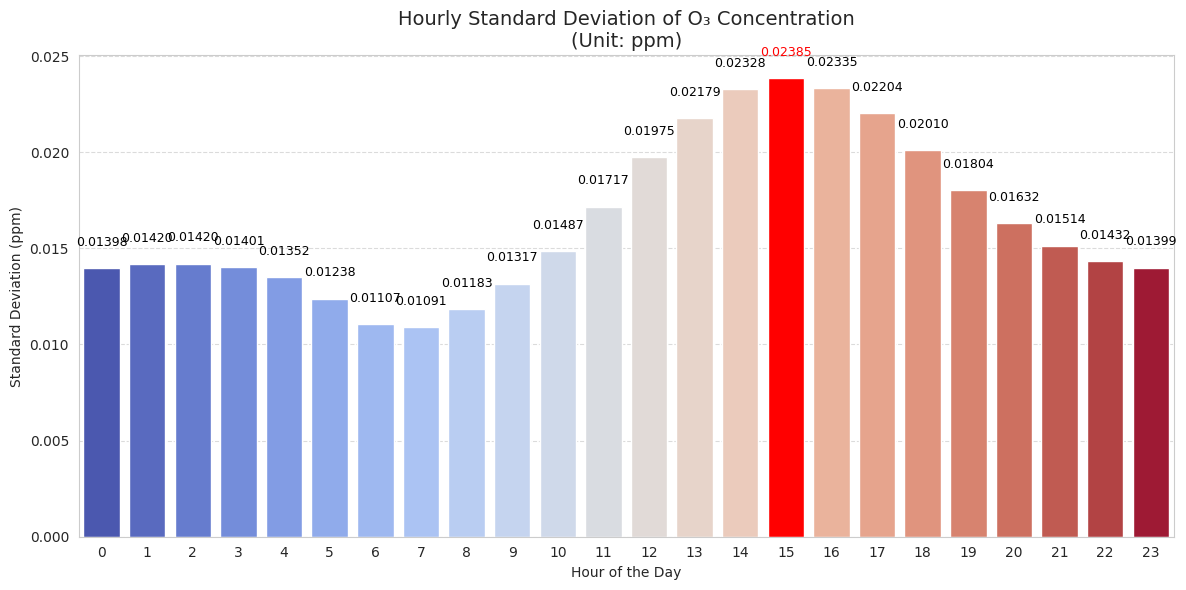

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot con hue explícito y sin leyenda (para evitar el warning)
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=std_by_hour, x='hour', y='std_dev', hue='hour', palette='coolwarm', legend=False)


# Add values to each bar
for index, row in std_by_hour.iterrows():
    color = 'red' if row['hour'] == max_std_row['hour'] else 'black'
    plt.text(row['hour'], row['std_dev'] + 0.001, f"{row['std_dev']:.5f}",
             ha='center', va='bottom', fontsize=9, color=color)

# Highlight the highest bar
barplot.patches[int(max_std_row['hour'])].set_facecolor('red')

# Titles and labels
plt.title(f'Hourly Standard Deviation of O₃ Concentration\n(Unit: {o3_unit})', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel(f'Standard Deviation ({o3_unit})')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


***
> ##### Q12: Which is the station code with more measurements labeled as "Abnormal data" (`Instrument_status`=9) ?

In [49]:
# Maping of Instrument Status:
status_mapping = {
    0: "Normal",
    1: "Need calibration",
    2: "Abnormal",
    4: "Power cut",
    8: "Under repair",
    9: "Abnormal data"
}

# Dictionary of pollutant DataFrames
pollutant_dfs = {
    "SO2": df_SO2,
    "CO": df_CO,
    "O3": df_O3,
    "PM10": df_PM10,
    "PM2.5": df_PM25,
    "NO2": df_NO2
}

In [50]:
# Step 1: Combine all filtered records where Instrument_status == 9 (Abnormal data)
abnormal_data = pd.concat([
    df[df["Instrument_status"] == 9][["Station_code"]] for df in pollutant_dfs.values()
])
abnormal_data

Station_code
231              204
1117             204
2320             204
5263             204
5312             204
...              ...
598280           228
598281           228
598303           228
598304           228
598305           228

[19668 rows x 1 columns]

In [51]:
# Step 2: Count occurrences by Station_code
abnormal_counts = abnormal_data["Station_code"].value_counts().reset_index()
abnormal_counts.columns = ["Station_code", "Abnormal_data_count"]
abnormal_counts

Station_code  Abnormal_data_count
0            211                 3197
1            214                 1386
2            210                 1349
3            216                 1288
4            222                 1232
5            220                 1223
6            207                 1112
7            225                 1103
8            228                 1038
9            224                  895
10           208                  880
11           209                  815
12           227                  808
13           213                  574
14           219                  443
15           226                  360
16           204                  320
17           212                  318
18           206                  317
19           215                  242
20           218                  230
21           221                  176
22           217                  128
23           205                  123
24           223                  111

In [52]:
# Step 3: Get station with the highest count
top_station = abnormal_counts.iloc[0]
print(f"Station with the most 'Abnormal data' measurements: {top_station['Station_code']} ({top_station['Abnormal_data_count']} records)")

Station with the most 'Abnormal data' measurements: 211 (3197 records)


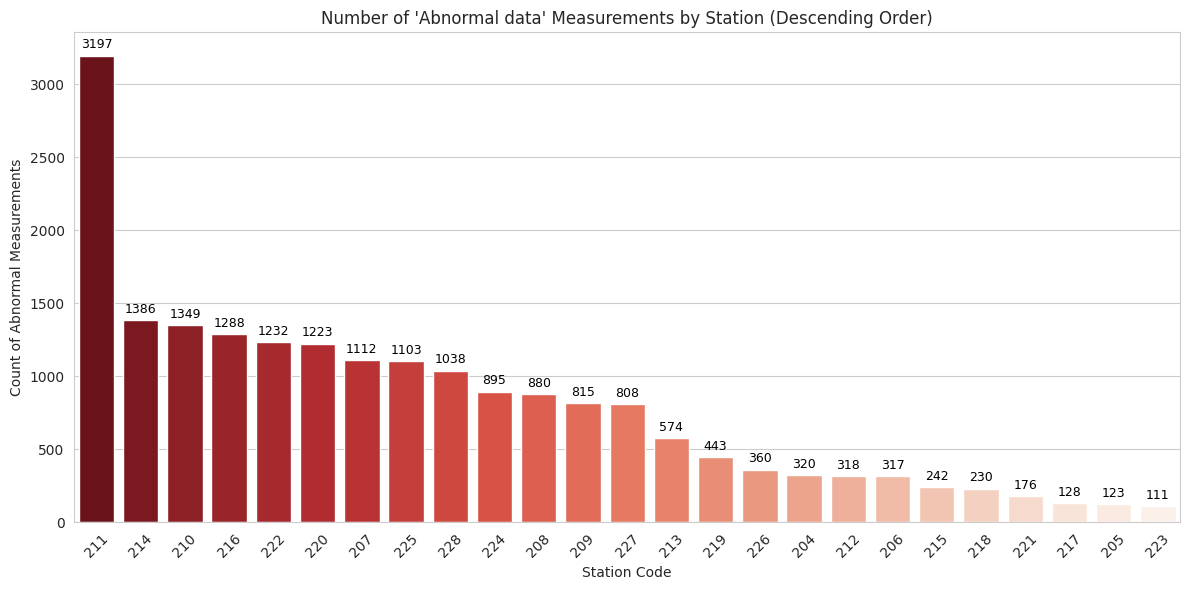

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# We would make sure that Station_code is str (to avoid unwanted reordering)
abnormal_counts['Station_code'] = abnormal_counts['Station_code'].astype(str)

# Data ordered from highest to lowest
abnormal_counts_sorted = abnormal_counts.sort_values(by="Abnormal_data_count", ascending=False)

# We force order on the x-axis with Categorical
abnormal_counts_sorted['Station_code'] = pd.Categorical(
    abnormal_counts_sorted['Station_code'],
    categories=abnormal_counts_sorted['Station_code'],
    ordered=True
)

# Barplot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=abnormal_counts_sorted,
    x="Station_code",
    y="Abnormal_data_count",
    hue="Station_code",
    palette="Reds_r",
    legend=False
)

# We add the values ​​above each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f'{int(height)}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        fontsize=9,
        color='black',
        xytext=(0, 3),
        textcoords='offset points'
    )

# Labels and title
plt.title("Number of 'Abnormal data' Measurements by Station (Descending Order)")
plt.xlabel("Station Code")
plt.ylabel("Count of Abnormal Measurements")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> ##### Q13: Which Station Code has more "not normal" measurements (!= 0)?

In [54]:
# Step 1: DataFrame to accumulate counts by station
not_normal_counts = pd.DataFrame()

for name, df in pollutant_dfs.items(): # (name, df) = iterable view of (key, value) pairs

    # We filter the records where Instrument_status != 0 (not normal)
    df_not_normal = df[df['Instrument_status'] != 0]

    # Count by Station_code
    '''
    - counts = Converts that Series into a normal DataFrame with two columns:
      the index column (which were the station codes) becomes a column and the values ​​column becomes another column.

    - counts.columns =  We rename the counts columns
    '''
    counts = df_not_normal['Station_code'].value_counts().reset_index()
    counts.columns = ['Station_code', f'{name}_not_normal_count']

    '''
    - If `not_normal_counts` is not empty (it already has data from previous pollutants),
    we do an outer merge between not_normal_counts and the new counts, joining by the 'Station_code' column.

    - If `not_normal_counts` is empty (first time we run it), we just assign the current counts, because there is no previous data to combine.
    '''
    if not not_normal_counts.empty:
        # Unir acumulado
        not_normal_counts = pd.merge(not_normal_counts, counts, on='Station_code', how='outer')
    else:
        not_normal_counts = counts

not_normal_counts

Station_code  SO2_not_normal_count  CO_not_normal_count  \
0            204                   415                  271   
1            205                   168                  164   
2            206                   641                  507   
3            207                   733                  815   
4            208                  1364                 1789   
5            209                   566                  427   
6            210                   257                  534   
7            211                  1427                 1492   
8            212                  1239                 1139   
9            213                  1234                 1412   
10           214                   185                  439   
11           215                   234                  286   
12           216                   772                 1499   
13           217                   200                  172   
14           218                   459                  230   
15           219                   628                  595   
16           220                   463                  439   
17           221                   226                  256   
18           222                   268                  374   
19           223                   245                  192   
20           224                   993                 1072   
21           225                   443                  491   
22           226                   287                  299   
23           227                   615                  660   
24           228                   793                  272   

    O3_not_normal_count  PM10_not_normal_count  PM2.5_not_normal_count  \
0                   211                    488                     441   
1                   229                    236                     172   
2                   534                    705                     601   
3                   708                    866                    1076   
4                  1355                   1580                    1764   
5                   579                    803                     768   
6                   411                   1152                     720   
7                  1066                    996                     835   
8                  1148                   1245                    1072   
9                  1357                   1274                    1270   
10                  337                   1165                     765   
11                  279                    277                     240   
12                  770                    683                     667   
13                  166                    201                     245   
14                  241                    356                     295   
15                  665                    952                     728   
16                  457                   1262                     889   
17                  228                    343                     316   
18                  682                    591                     853   
19                  202                    239                     226   
20                 1190                   1332                    1421   
21                  486                   1206                     786   
22                  279                    618                     635   
23                  620                   1169                     966   
24                  284                    810                     472   

    NO2_not_normal_count  
0                    214  
1                    163  
2                    509  
3                    648  
4                   1277  
5                    467  
6                    300  
7                    594  
8                   1225  
9                   1296  
10                   262  
11                   260  
12                   766  
13                   166  
14                   315  
15      

In [55]:
# Step 2: Replace NaN with 0 to be able to add
not_normal_counts.fillna(0, inplace=True)


In [56]:
# Step 3: Sum the counts of all columns except Station_code
not_normal_counts['total_not_normal'] = not_normal_counts.drop(columns='Station_code').sum(axis=1)
not_normal_counts

Station_code  SO2_not_normal_count  CO_not_normal_count  \
0            204                   415                  271   
1            205                   168                  164   
2            206                   641                  507   
3            207                   733                  815   
4            208                  1364                 1789   
5            209                   566                  427   
6            210                   257                  534   
7            211                  1427                 1492   
8            212                  1239                 1139   
9            213                  1234                 1412   
10           214                   185                  439   
11           215                   234                  286   
12           216                   772                 1499   
13           217                   200                  172   
14           218                   459                  230   
15           219                   628                  595   
16           220                   463                  439   
17           221                   226                  256   
18           222                   268                  374   
19           223                   245                  192   
20           224                   993                 1072   
21           225                   443                  491   
22           226                   287                  299   
23           227                   615                  660   
24           228                   793                  272   

    O3_not_normal_count  PM10_not_normal_count  PM2.5_not_normal_count  \
0                   211                    488                     441   
1                   229                    236                     172   
2                   534                    705                     601   
3                   708                    866                    1076   
4                  1355                   1580                    1764   
5                   579                    803                     768   
6                   411                   1152                     720   
7                  1066                    996                     835   
8                  1148                   1245                    1072   
9                  1357                   1274                    1270   
10                  337                   1165                     765   
11                  279                    277                     240   
12                  770                    683                     667   
13                  166                    201                     245   
14                  241                    356                     295   
15                  665                    952                     728   
16                  457                   1262                     889   
17                  228                    343                     316   
18                  682                    591                     853   
19                  202                    239                     226   
20                 1190                   1332                    1421   
21                  486                   1206                     786   
22                  279                    618                     635   
23                  620                   1169                     966   
24                  284                    810                     472   

    NO2_not_normal_count  total_not_normal  
0                    214              2040  
1                    163              1132  
2                    509              3497  
3                    648              4846  
4                   1277              9129  
5                    467              3610  
6                    300              3374  
7                    594              6410  
8                   1225           

In [57]:
# Step 4: Find the station with the most non-normal measurements
max_station = not_normal_counts.loc[not_normal_counts['total_not_normal'].idxmax()]
max_station

print(f"Station code with most 'not normal' measurements: {max_station['Station_code']}")
print(f"Number of 'not normal' measurements: {int(max_station['total_not_normal'])}")

Station code with most 'not normal' measurements: 208
Number of 'not normal' measurements: 9129


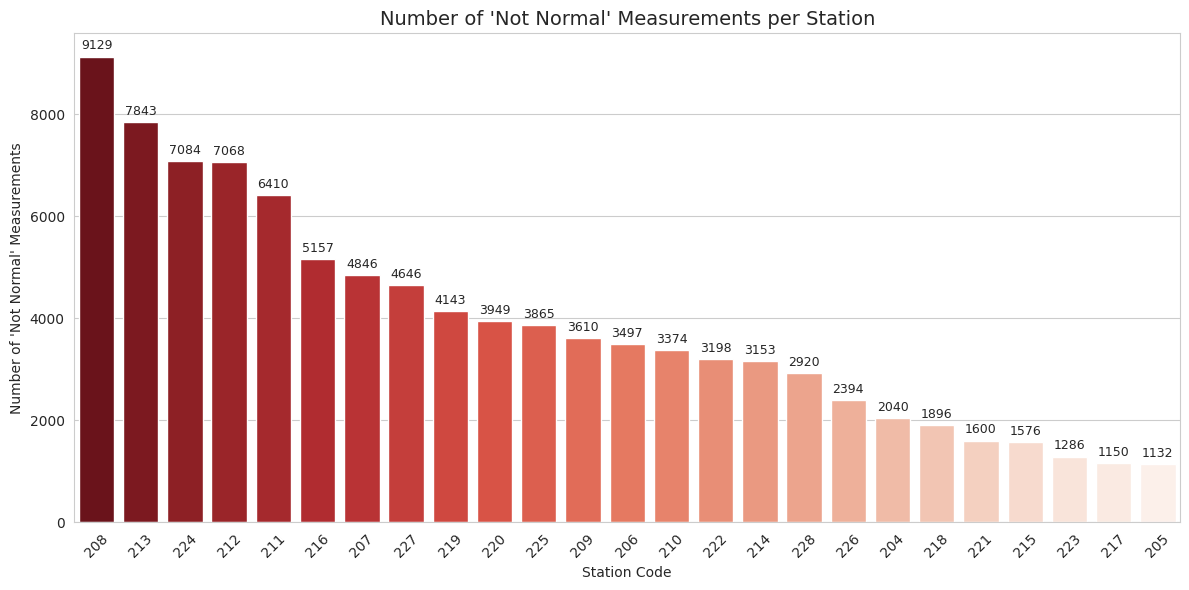

In [58]:
# Data ordered from highest to lowest
not_normal_counts_sorted = not_normal_counts.sort_values(by='total_not_normal', ascending=False)

# We create a back-up copy:
not_normal_counts_sorted_copy = not_normal_counts_sorted.copy()
# Convertir Station_code a string para evitar problemas con el orden en seaborn
not_normal_counts_sorted_copy['Station_code'] = not_normal_counts_sorted_copy['Station_code'].astype(str)

# Convertir a categoría ordenada para que seaborn respete el orden en el gráfico
not_normal_counts_sorted_copy['Station_code'] = pd.Categorical(
    not_normal_counts_sorted_copy['Station_code'],
    categories=not_normal_counts_sorted_copy['Station_code'],
    ordered=True
)

# Barplot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=not_normal_counts_sorted_copy,
    x='Station_code',
    y='total_not_normal',
    hue='Station_code',           # Necesario para usar palette sin warning
    palette='Reds_r',
    legend=False                  # Ocultamos leyenda redundante
)

# We add the values ​​above each bar
for bar in barplot.patches:
    height = bar.get_height()
    barplot.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # Desplazamiento hacia arriba
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Titles and labels
plt.title("Number of 'Not Normal' Measurements per Station", fontsize=14)
plt.xlabel("Station Code")
plt.ylabel("Number of 'Not Normal' Measurements")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> ##### Q14: From the Station that fails the most, we show a Time Series of the daily failures.

Note: *Six graphs will be obtained, corresponding to the six pollutants.*

In [59]:
worst_station = 208

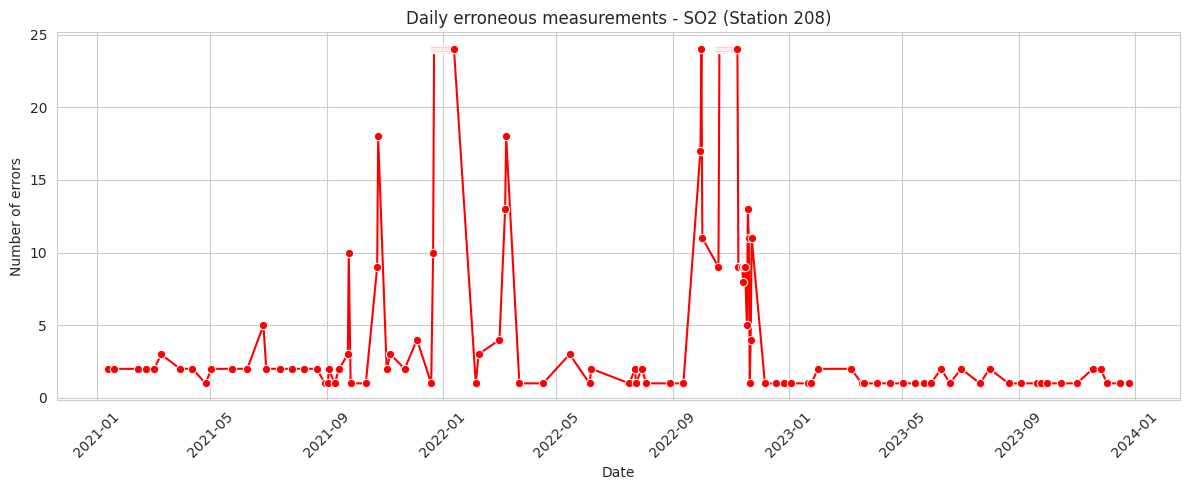

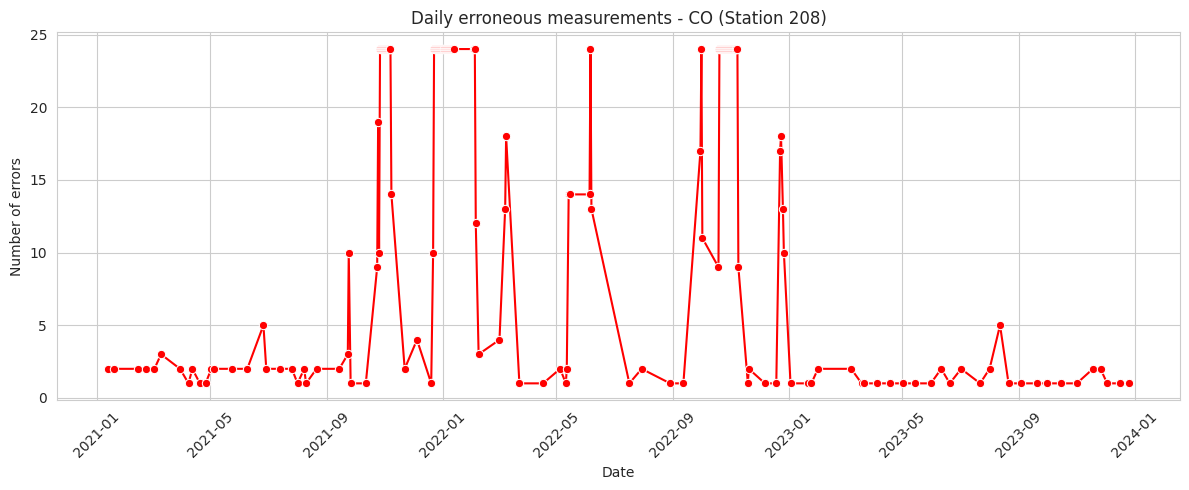

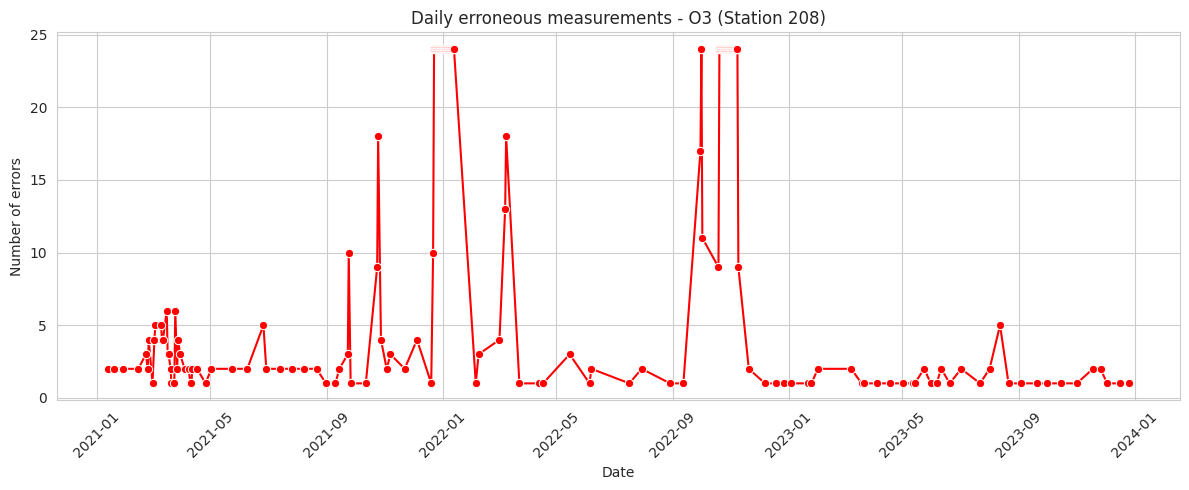

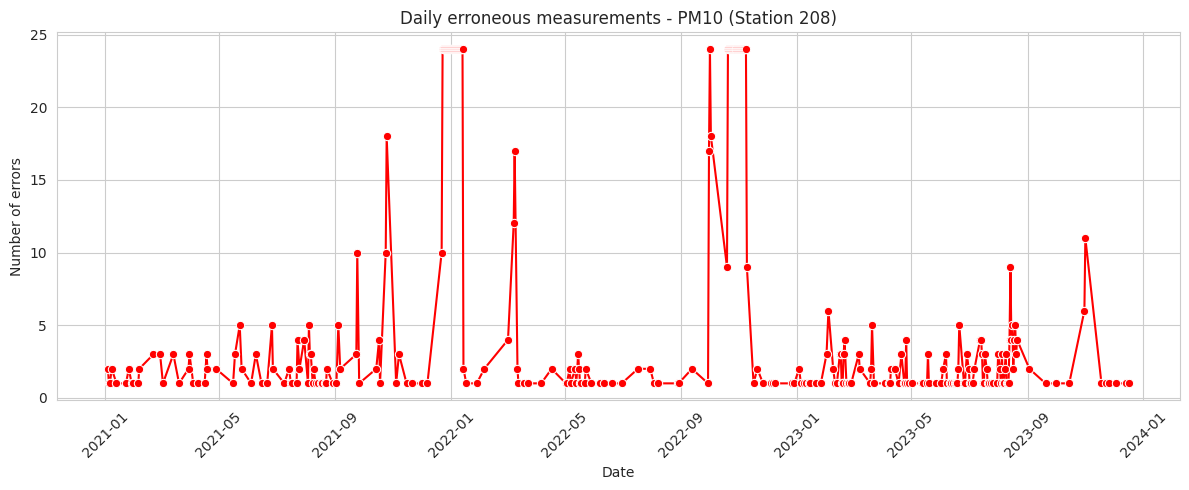

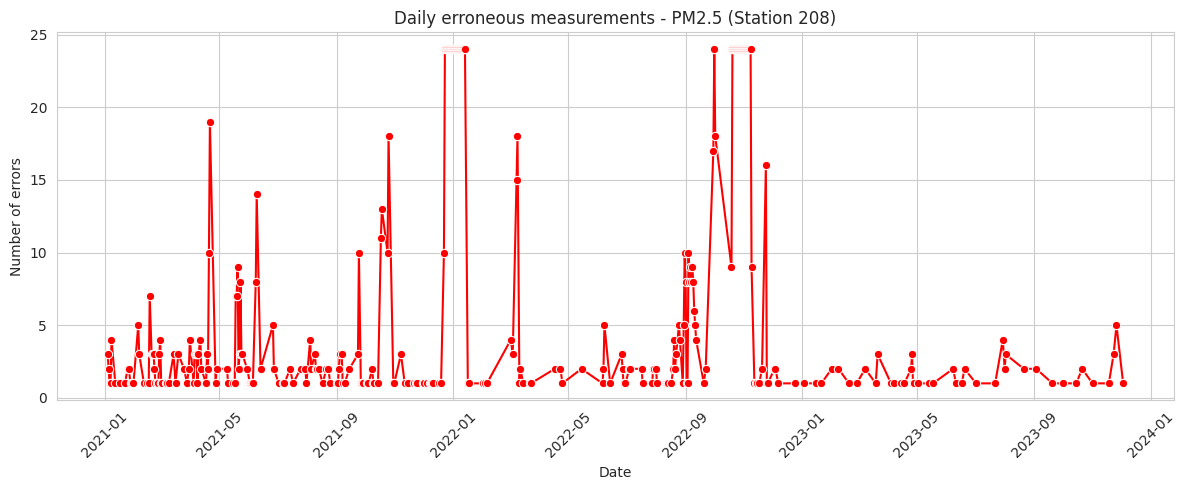

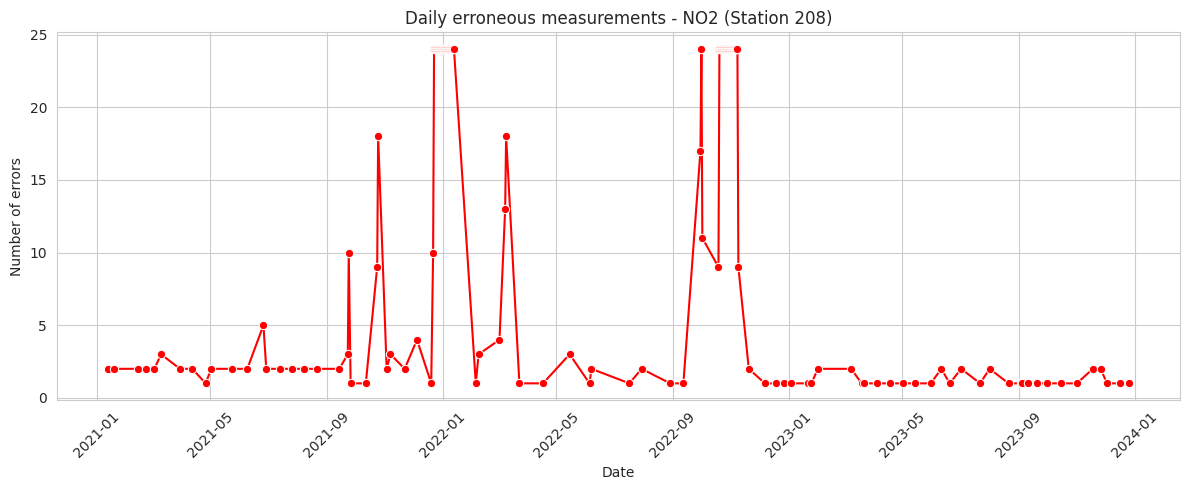

In [70]:
# Set the station code
station_code = 208

# Dictionary of DataFrames by pollutant
pollutant_dfs = {
    "SO2": df_SO2,
    "CO": df_CO,
    "O3": df_O3,
    "PM10": df_PM10,
    "PM2.5": df_PM25,
    "NO2": df_NO2
}

# Plotting erroneous measurements over time for each pollutant at station 208
for pollutant_name, df in pollutant_dfs.items():
    # Filter for station and erroneous measurements
    df_filtered = df[(df["Station_code"] == station_code) & (df["Instrument_status"] != 0)].copy()

    # Group by date and count number of errors per day
    df_filtered["date"] = df_filtered["Measurement_date"].dt.date
    error_counts = df_filtered.groupby("date").size().reset_index(name="Error Count")

    # Plot
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=error_counts, x="date", y="Error Count", marker="o", color="red")
    plt.title(f"Daily erroneous measurements - {pollutant_name} (Station {station_code})")
    plt.xlabel("Date")
    plt.ylabel("Number of errors")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


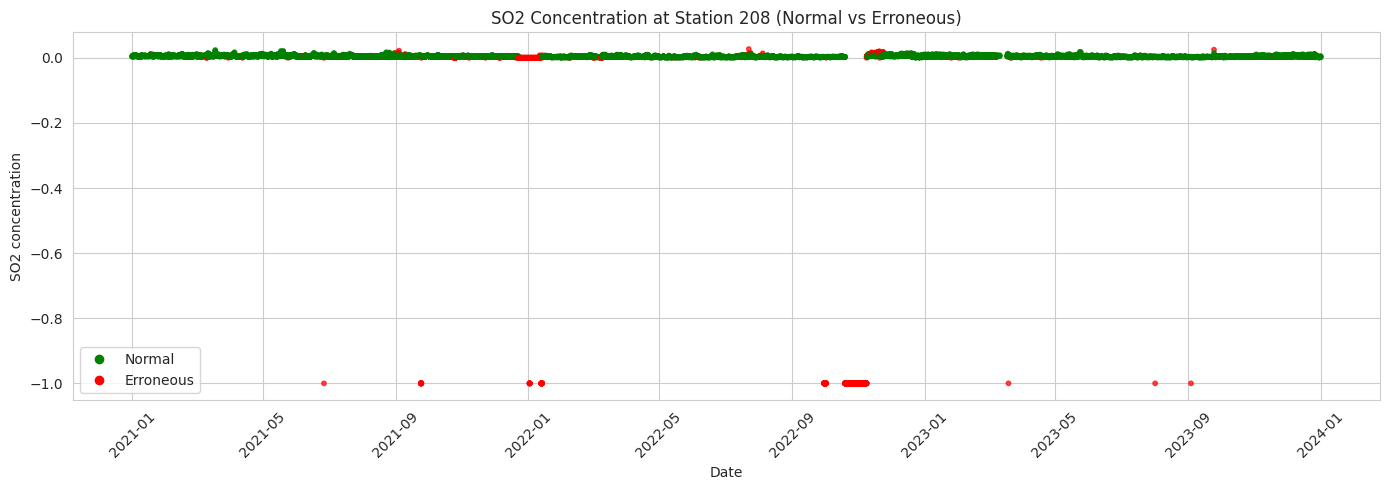

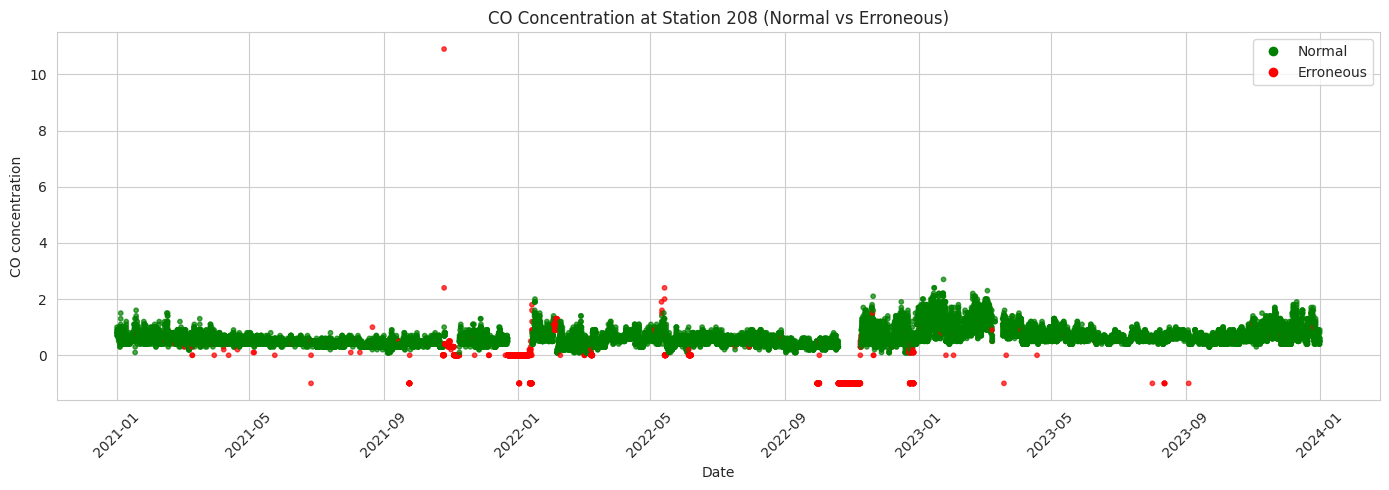

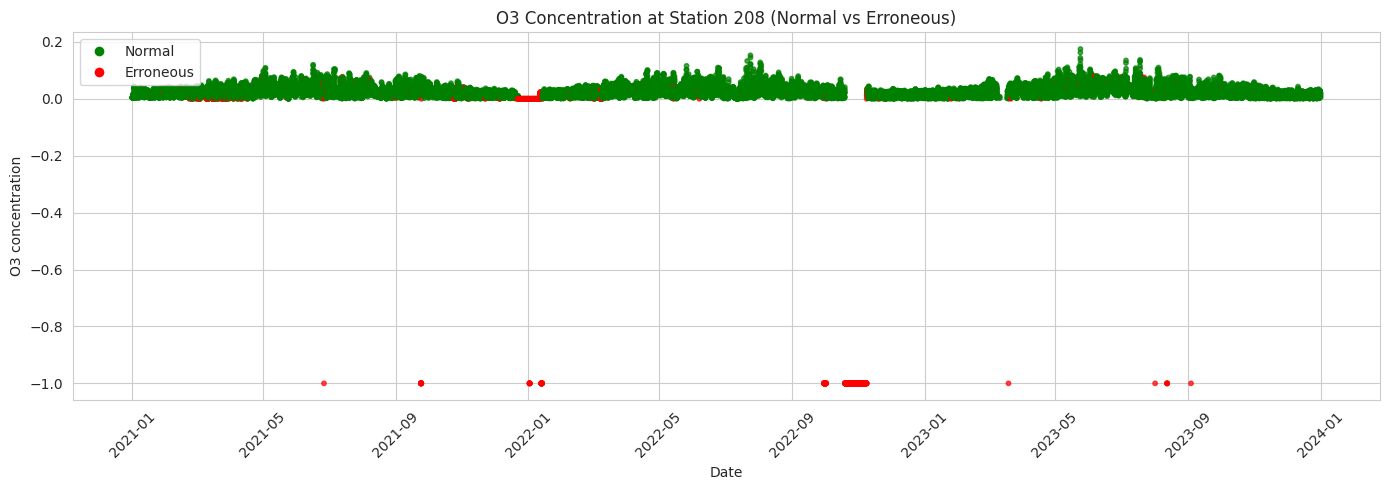

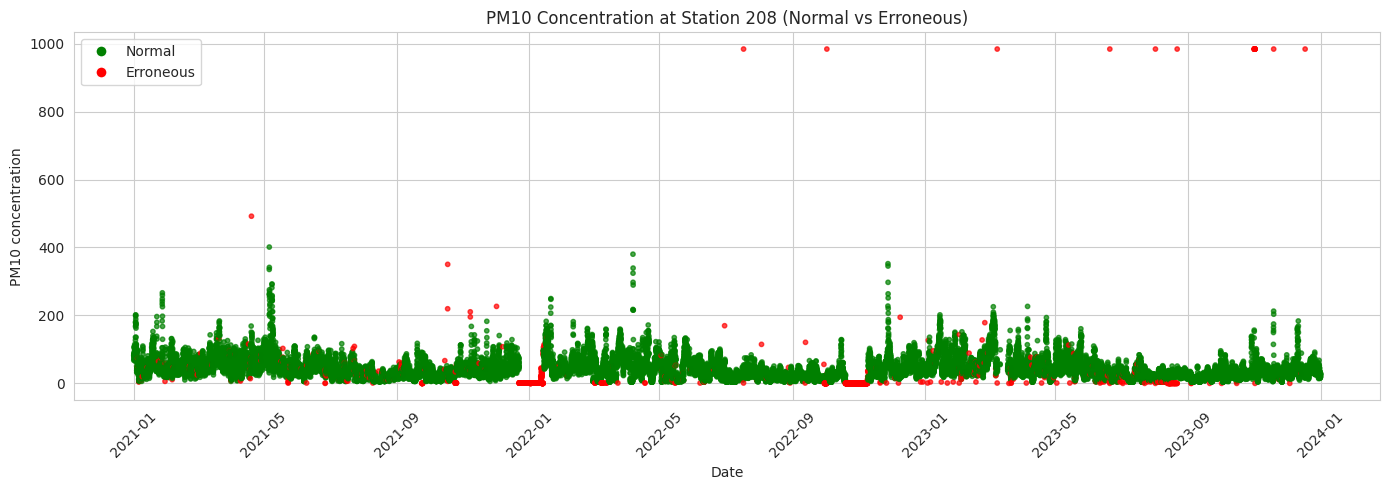

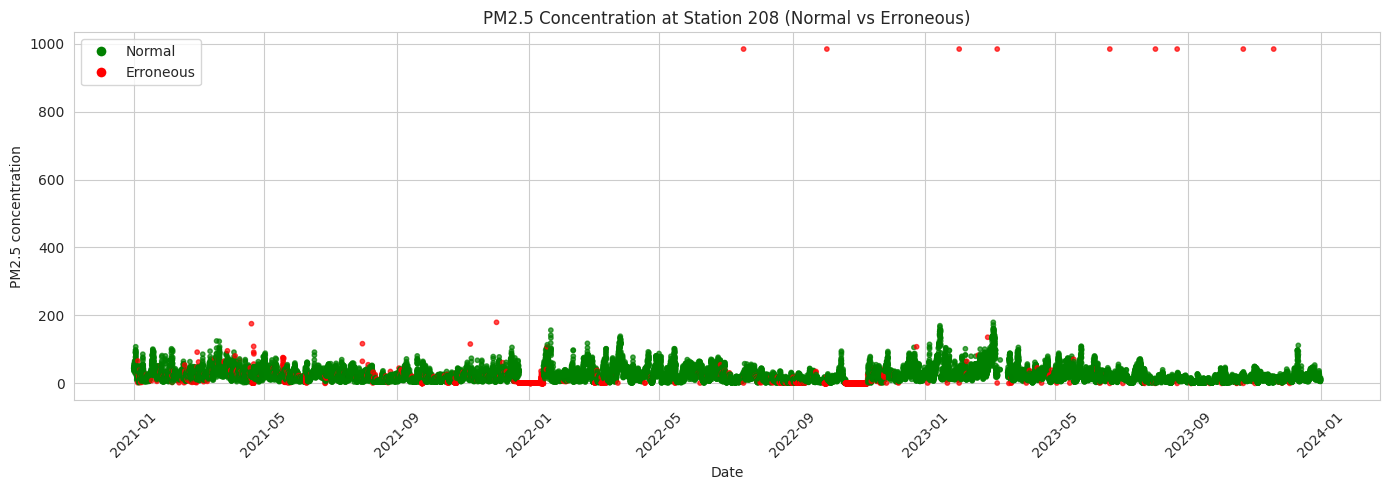

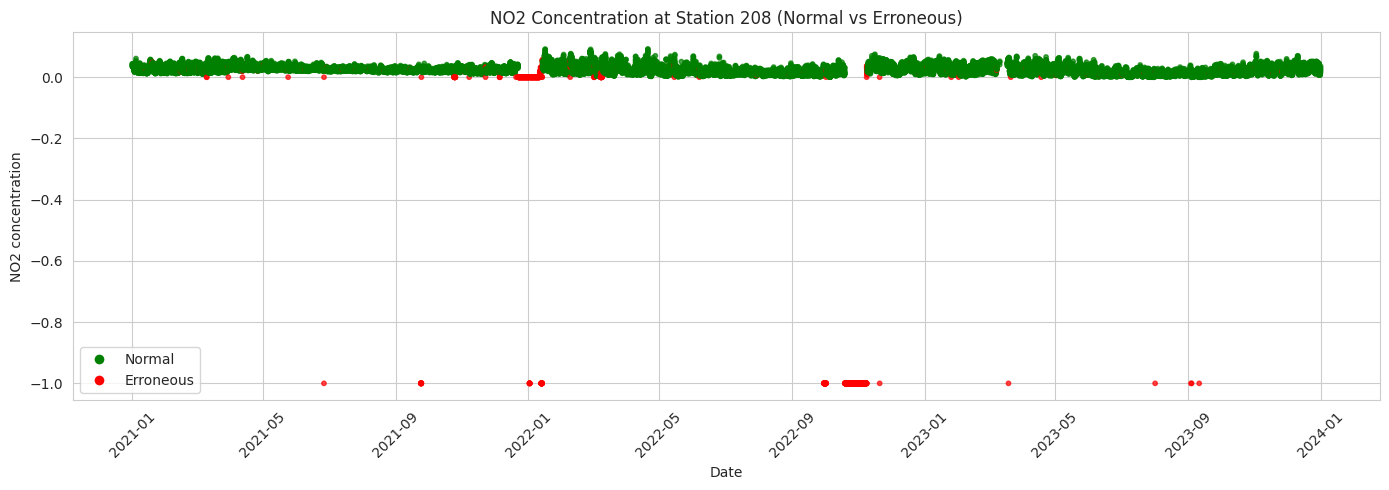

In [60]:
# Set the station code
station_code = 208

# Dictionary of DataFrames by pollutant
pollutant_dfs = {
    "SO2": df_SO2,
    "CO": df_CO,
    "O3": df_O3,
    "PM10": df_PM10,
    "PM2.5": df_PM25,
    "NO2": df_NO2
}

# Colors for instrument status
status_colors = {0: "green", "non_0": "red"}

# Plot for each pollutant
for pollutant_name, df in pollutant_dfs.items():
    # Filter by station
    df_filtered = df[df["Station_code"] == station_code].copy()

    # Create a color column based on Instrument_status
    df_filtered["status_color"] = df_filtered["Instrument_status"].apply(lambda x: status_colors[0] if x == 0 else status_colors["non_0"])

    # Plot
    plt.figure(figsize=(14, 5))
    plt.scatter(df_filtered["Measurement_date"], df_filtered[pollutant_name],
                c=df_filtered["status_color"], s=10, alpha=0.7)

    plt.title(f"{pollutant_name} Concentration at Station {station_code} (Normal vs Erroneous)")
    plt.xlabel("Date")
    plt.ylabel(f"{pollutant_name} concentration")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='green', markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', label='Erroneous', markerfacecolor='red', markersize=8)
    ])
    plt.show()


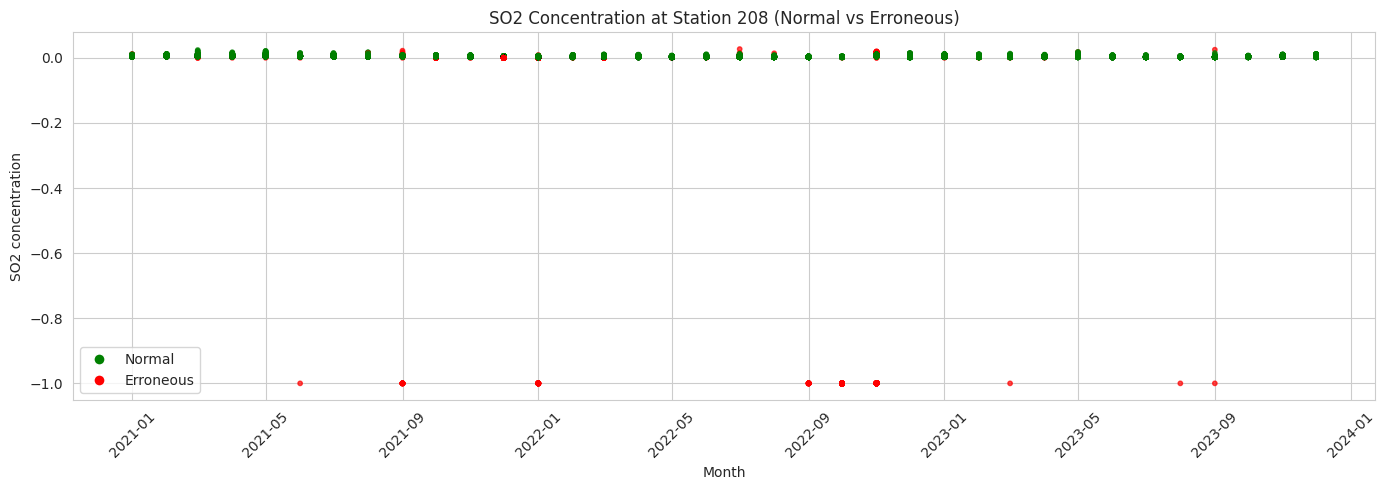

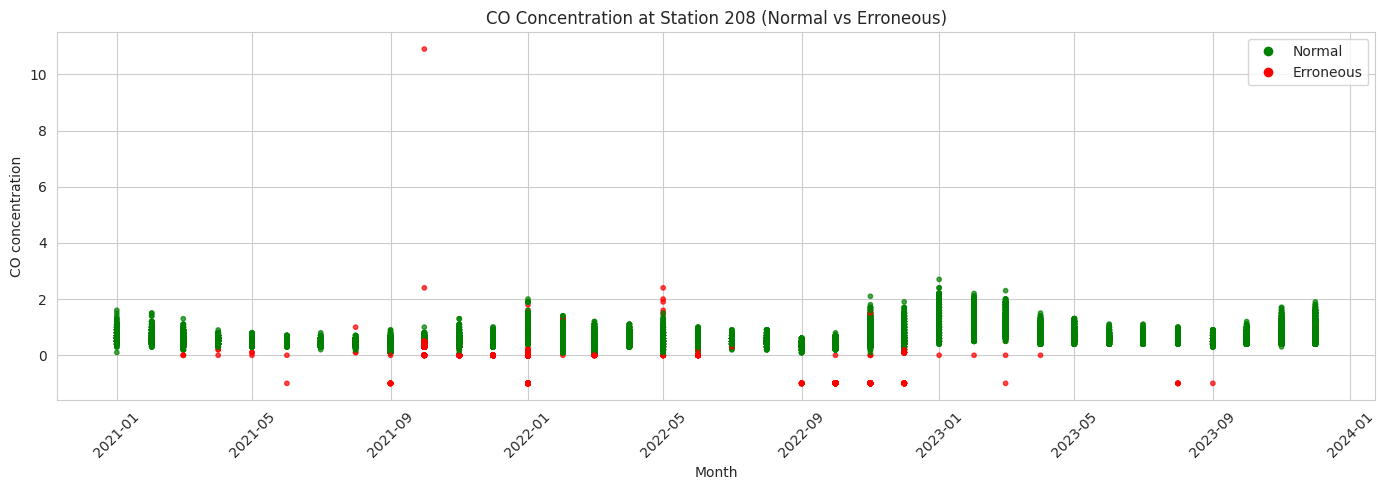

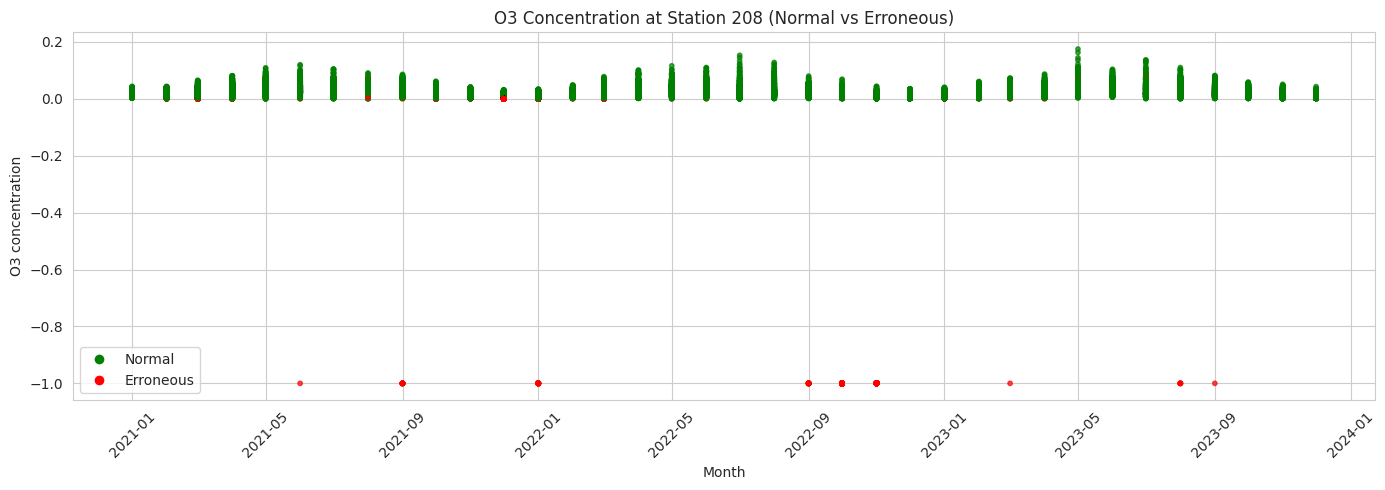

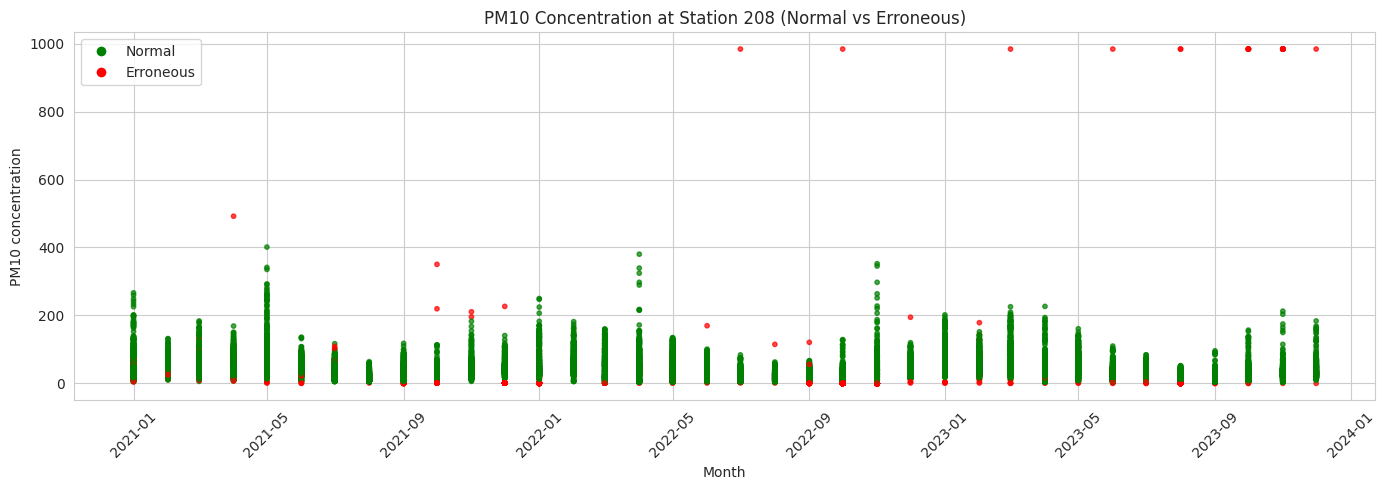

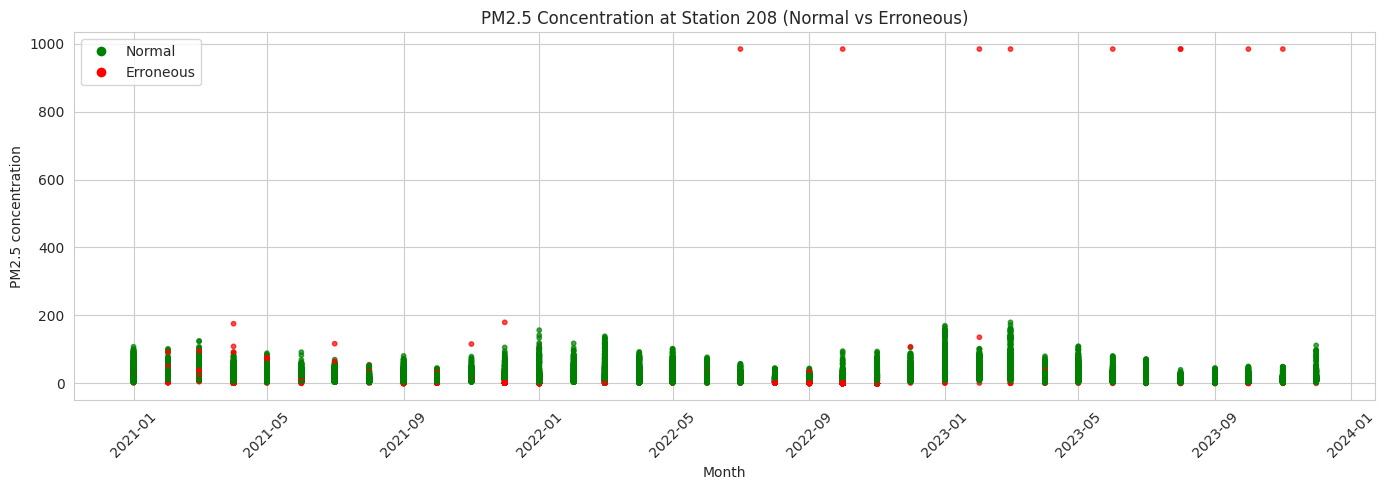

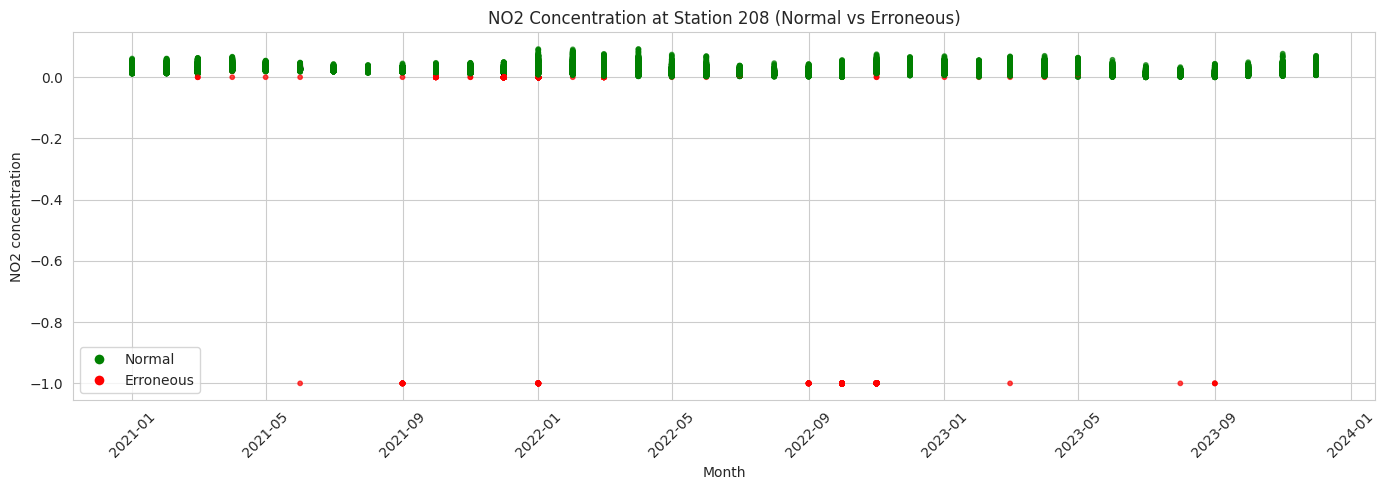

In [69]:
# Set the station code
station_code = 208

# Dictionary of DataFrames by pollutant
pollutant_dfs = {
    "SO2": df_SO2,
    "CO": df_CO,
    "O3": df_O3,
    "PM10": df_PM10,
    "PM2.5": df_PM25,
    "NO2": df_NO2
}

# Colors for instrument status
status_colors = {0: "green", "non_0": "red"}

# Plot for each pollutant
for pollutant_name, df in pollutant_dfs.items():
    # Filter by station
    df_filtered = df[df["Station_code"] == station_code].copy()

    # Convert date to datetime if not already
    df_filtered["Measurement_date"] = pd.to_datetime(df_filtered["Measurement_date"])

    # Extract year-month for x-axis
    df_filtered["month"] = df_filtered["Measurement_date"].dt.to_period("M").dt.to_timestamp()

    # Assign colors
    df_filtered["status_color"] = df_filtered["Instrument_status"].apply(
        lambda x: status_colors[0] if x == 0 else status_colors["non_0"]
    )

    # Plot
    plt.figure(figsize=(14, 5))
    plt.scatter(df_filtered["month"], df_filtered[pollutant_name],
                c=df_filtered["status_color"], s=10, alpha=0.7)

    plt.title(f"{pollutant_name} Concentration at Station {station_code} (Normal vs Erroneous)")
    plt.xlabel("Month")
    plt.ylabel(f"{pollutant_name} concentration")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='green', markersize=8),
        plt.Line2D([0], [0], marker='o', color='w', label='Erroneous', markerfacecolor='red', markersize=8)
    ])
    plt.show()


> ##### Q15: For each pollutant, which Station Code has the most records with non-normal data?

In [62]:
# Dictionary to store the result: pollutant -> (station_code, count)
most_non_normal_by_pollutant = {}

# Loop through each pollutant DataFrame
for pollutant, df in pollutant_dfs.items():
    # Filter for non-normal instrument status
    df_non_normal = df[df["Instrument_status"] != 0]

    # Count by station code
    station_counts = df_non_normal["Station_code"].value_counts()

    if not station_counts.empty:
        # Get the station with the highest count
        top_station = station_counts.idxmax()
        top_count = station_counts.max()
        most_non_normal_by_pollutant[pollutant] = (top_station, top_count)
    else:
        most_non_normal_by_pollutant[pollutant] = ("No non-normal data", 0)

# Display result
for pollutant, (station, count) in most_non_normal_by_pollutant.items():
    print(f"{pollutant}: Station {station} with {count} 'not normal' measurements.")


SO2: Station 211 with 1427 'not normal' measurements.
CO: Station 208 with 1789 'not normal' measurements.
O3: Station 213 with 1357 'not normal' measurements.
PM10: Station 208 with 1580 'not normal' measurements.
PM2.5: Station 208 with 1764 'not normal' measurements.
NO2: Station 213 with 1296 'not normal' measurements.


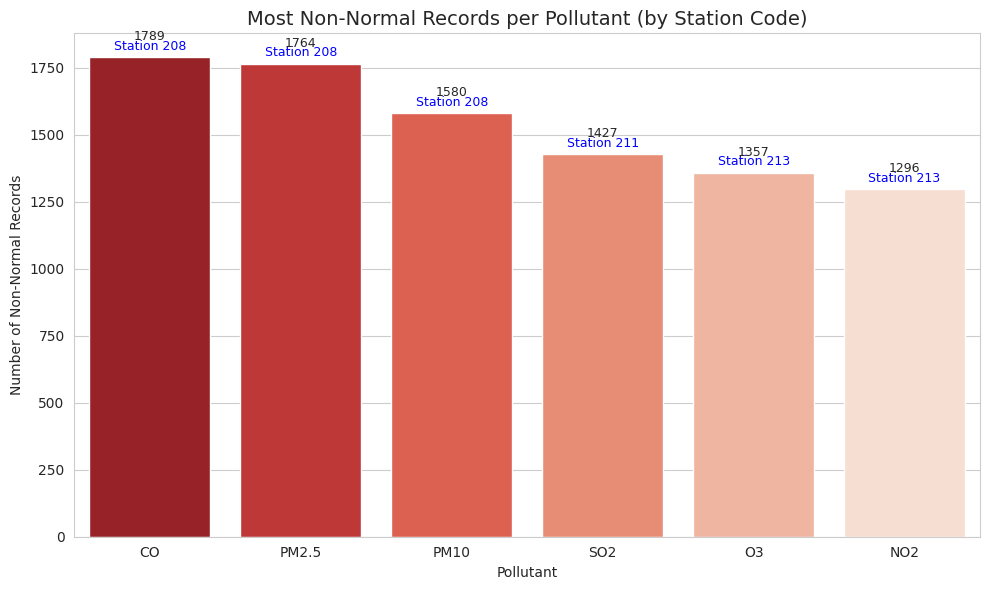

In [63]:
# Create the DataFrame from the dictionary
result_df = pd.DataFrame([
    {"Pollutant": pollutant, "Station": station, "Count": count}
    for pollutant, (station, count) in most_non_normal_by_pollutant.items()
])

# Ordenar de mayor a menor
result_df = result_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=result_df,
    x="Pollutant",
    y="Count",
    hue="Pollutant",
    palette="Reds_r",
    legend=False
)

# We add the values and station code ​​above each bar
for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    count = int(result_df.loc[i, "Count"])
    station_code = result_df.loc[i, "Station"]

    # Numeric value numérico
    ax.text(x, y + max(result_df["Count"]) * 0.03, f'{count}', ha='center', va='bottom', fontsize=9)

    # Station code
    ax.text(x, y + max(result_df["Count"]) * 0.01, f'Station {station_code}', ha='center', va='bottom', fontsize=9, color='blue')

#  Titles and labels
plt.title("Most Non-Normal Records per Pollutant (by Station Code)", fontsize=14)
plt.xlabel("Pollutant")
plt.ylabel("Number of Non-Normal Records")
plt.tight_layout()
plt.show()

> ##### Q16: For the station with the highest number of measurement failures:


In [64]:
most_error_station = result_df['Station'][0]
most_error_station

np.int64(208)

In [65]:
 # Obtener una lista de los valores (los DataFrames)
lista_valores = list(pollutant_dfs.values())
lista_valores[0]

Measurement_date  Station_code  Item_code  Average_value  \
0      2021-01-01 00:00:00           204          0          0.004   
1      2021-01-01 01:00:00           204          0          0.004   
2      2021-01-01 02:00:00           204          0          0.004   
3      2021-01-01 03:00:00           204          0          0.004   
4      2021-01-01 04:00:00           204          0          0.003   
...                    ...           ...        ...            ...   
617272 2023-11-30 19:00:00           228          0          0.005   
617273 2023-11-30 20:00:00           228          0          0.005   
617274 2023-11-30 21:00:00           228          0          0.005   
617275 2023-11-30 22:00:00           228          0          0.004   
617276 2023-11-30 23:00:00           228          0          0.004   

        Instrument_status   Latitude   Longitude    SO2 air_quality  Month  \
0                       0  37.572016  127.005008  0.004        Good      1   
1                       0  37.572016  127.005008  0.004        Good      1   
2                       0  37.572016  127.005008  0.004        Good      1   
3                       0  37.572016  127.005008  0.004        Good      1   
4                       0  37.572016  127.005008  0.003        Good      1   
...                   ...        ...         ...    ...         ...    ...   
617272                  0  37.544962  127.136792  0.005        Good     11   
617273                  0  37.544962  127.136792  0.005        Good     11   
617274                  0  37.544962  127.136792  0.005        Good     11   
617275                  0  37.544962  127.136792  0.004        Good     11   
617276                  0  37.544962  127.136792  0.004        Good     11   

        hour  month  season  
0          0      1  Winter  
1          1      1  Winter  
2          2      1  Winter  
3          3      1  Winter  
4          4      1  Winter  
...      ...    ...     ...  
617272    19     11  Autumn  
617273    20     11  Autumn  
617274    21     11  Autumn  
617275    22     11  Autumn  
617276    23     11  Autumn  

[617277 rows x 13 columns]

In [66]:
# We filter all the df's pollutants by Instrument_status !=0 and by the Station code with the most measurement failures:
df_CO_copy = df_CO[ (df_CO['Instrument_status']!=0) & (df_CO['Station_code']== most_error_station) ]


In [67]:
df_SO2[ (df_SO2['Instrument_status']!=0) & (df_SO2['Station_code']== most_error_station) ]

Measurement_date  Station_code  Item_code  Average_value  \
98147  2021-01-13 12:00:00           208          0          0.005   
98148  2021-01-13 13:00:00           208          0          0.006   
98293  2021-01-19 14:00:00           208          0          0.011   
98294  2021-01-19 15:00:00           208          0          0.009   
98917  2021-02-14 14:00:00           208          0          0.007   
...                    ...           ...        ...            ...   
122896 2023-11-26 11:00:00           208          0          0.004   
122897 2023-11-26 12:00:00           208          0          0.004   
123053 2023-12-03 12:00:00           208          0          0.005   
123392 2023-12-17 15:00:00           208          0          0.004   
123605 2023-12-26 12:00:00           208          0          0.005   

        Instrument_status   Latitude   Longitude    SO2 air_quality  Month  \
98147                   1  37.593742  126.949679  0.005        Good      1   
98148                   1  37.593742  126.949679  0.006        Good      1   
98293                   1  37.593742  126.949679  0.011        Good      1   
98294                   1  37.593742  126.949679  0.009        Good      1   
98917                   1  37.593742  126.949679  0.007        Good      2   
...                   ...        ...         ...    ...         ...    ...   
122896                  1  37.593742  126.949679  0.004        Good     11   
122897                  1  37.593742  126.949679  0.004        Good     11   
123053                  1  37.593742  126.949679  0.005        Good     12   
123392                  1  37.593742  126.949679  0.004        Good     12   
123605                  1  37.593742  126.949679  0.005        Good     12   

        hour  month  season  
98147     12      1  Winter  
98148     13      1  Winter  
98293     14      1  Winter  
98294     15      1  Winter  
98917     14      2  Winter  
...      ...    ...     ...  
122896    11     11  Autumn  
122897    12     11  Autumn  
123053    12     12  Winter  
123392    15     12  Winter  
123605    12     12  Winter  

[1364 rows x 13 columns]

## **6. Results & Conclusions**

#### 📊 **Executive Summary – Air Quality Insights**

🛠️ **Monitoring Reliability**<br>
Top 5 stations with highest failure rates:<br>
208, 213, 224, 211, 212 (5–6% failure rate)<br>

❗️ Indicates need for targeted maintenance and calibration.


🏭 **Pollution Highlights**<br>
Worst pollutant in terms of air quality:<br>
PM2.5 with 16.6% of readings marked as unhealthy.<br>

❗️ Requires further attention for public health and environmental impact.


📅 **Pollution Peaks by Month**<br>
For each pollutant, these are the months in which they emit the most pollution:
  
| Pollutant |  Peak Season |
|-----------|--------------|
| SO₂       |    January   |
| CO        |    January   |
| O₃        |     June     |
| PM₁₀      |     March    |
| PM₂.₅     |     March    |
| NO₂       |     January  |

🕒 **Daily Peak Hours**<br>
The hours of the day with the highest emission levels are:

| Pollutant |  Hour |
|-----------|-------|
| SO₂       | 10:00 |
| CO        | 8:00  |
| O₃        | 15:00 |
| PM₁₀      | 22:00 |
| PM₂.₅     | 21:00 |
| NO₂       | 8:00  |
  

🍂 **Seasonal Trends**<br>
Times/seasons of the year with the highest emission/concentration levels of each pollutant:

| Pollutant | Peak Season    | Time Range     |
|-----------|----------------|----------------|
| SO₂       | Spring & Summer| 10:00 & 17:00  |
| CO        | Winter & Spring| 08:00 & 07:00  |
| O₃        | Spring & Summer| 15:00          |
| PM₁₀      | Spring & Winter| 22:00          |
| PM₂.₅     | Winter & Spring| 21:00          |
| NO₂       | Winter & Spring| 08:00 & 09:00  |


#### 🔍 **Conclusions**
The air quality data analysis has revealed important insights regarding the performance of monitoring stations, as well as seasonal and hourly trends for different pollutants:

* ***Stations with the highest percentage of failures***: Stations 208, 213, 224, 211, and 212 showed the highest levels of instrument failures, with percentages ranging between 5% and 6%. These failure rates may compromise data quality and should be addressed through targeted maintenance and improved monitoring.

* ***Most critical pollutant***: The pollutant with the highest share of poor air quality readings is PM2.5, with 16.6% of its measurements classified as unhealthy. This underscores the serious impact of fine particulate matter on both air quality and public health.

* ***Months with highest concentrations per pollutant***: Most pollutants peak during colder months:

  * SO2, CO, and NO2 in January.

  * PM10 and PM2.5 in March, possibly due to seasonal transitions or specific atmospheric conditions.

  * In contrast, O3 reaches its peak in June, likely due to photochemical formation driven by solar radiation.

* ***Peak pollution hours***: The highest concentration levels are associated with specific times of the day, often linked to human activity or atmospheric behavior:

  * CO and NO2 peak around 8 a.m., potentially due to traffic emissions.

  * O3 peaks at 3 p.m., reflecting its secondary nature and dependence on sunlight.

  * PM10 and PM2.5 reach their maximum levels between 9 p.m. and 10 p.m., possibly linked to heating processes or nocturnal atmospheric stability.

* ***Seasonality of pollutants***: A clear seasonal influence is observed:

  * Winter and spring are the seasons with the highest levels for CO, NO2, PM10, and PM2.5.

  * SO2 peaks in spring and summer, especially at 10 a.m. and 5 p.m.

  * O3 increases in spring and summer, with the highest levels typically observed in the afternoon due to increased sunlight.



#### 🧭 **Recommendations**
* ***Monitor instrument status at critical stations*** (e.g., station 208), as high failure rates may bias analytical results.

* ***Investigate PM2.5 in greater depth***, given its significant proportion of unhealthy air quality readings.

* ***Implement seasonal and time-based preventative measures***, based on identified pollution peaks.